In [1]:
import numpy as np
np.__version__

'1.22.3'

In [2]:
import pandas as pd
pd.__version__

'1.4.1'

In [3]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [4]:
import matplotlib.pyplot as plt

In [5]:
from matplotlib.colors import LogNorm

In [6]:
import scipy
scipy.__version__

'1.8.0'

In [7]:
from scipy import stats


In [8]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [9]:
import seaborn as sns
sns.__version__

'0.11.2'

In [10]:
from datetime import datetime


In [11]:
import sklearn
sklearn.__version__


'0.24.2'

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
default_max_columns=pd.get_option('display.max_columns')
default_max_rows=pd.get_option('display.max_rows')
default_precision=pd.get_option('display.precision')
pd.set_option('display.precision', 2)

In [14]:
read_counts = pd.read_csv('barcode_read_counts.csv',sep=",",header=None,index_col=0,names=['barcode','count'])
read_counts.head()

count
barcode                       
B10_c1_AAACCTGAGAAACGCC  25135
B10_c1_AAACCTGAGAATGTTG  22360
B10_c1_AAACCTGAGCGTCTAT  22939
B10_c1_AAACCTGAGGAATGGA  27913
B10_c1_AAACCTGAGGATTCGG  23979

In [15]:
read_counts.shape

(66151, 1)

In [16]:
metadata = pd.read_csv('mergedAllCells_withCellTypeIdents_CLEAN.csv',sep=",",index_col=0)
metadata.head()

orig.ident  nCount_RNA  nFeature_RNA batchID  \
B1_c1_AAACCTGAGATCGGGT      B1_c1        1695           714   B1_c1   
B1_c1_AAACCTGCAGACGCAA      B1_c1        2116           822   B1_c1   
B1_c1_AAACCTGGTAGAGCTG      B1_c1        1979           597   B1_c1   
B1_c1_AAACCTGGTCGTCTTC      B1_c1        1805           680   B1_c1   
B1_c1_AAACCTGGTGATGCCC      B1_c1        1966           799   B1_c1   

                        percent.mt SOC_status SOC_indiv_ID  \
B1_c1_AAACCTGAGATCGGGT        1.83    singlet     HMN83551   
B1_c1_AAACCTGCAGACGCAA        3.92    singlet     HMN83551   
B1_c1_AAACCTGGTAGAGCTG        1.47    singlet     HMN83558   
B1_c1_AAACCTGGTCGTCTTC        3.38    singlet     HMN83551   
B1_c1_AAACCTGGTGATGCCC        2.03    singlet     HMN83552   

                       SOC_infection_status SOC_genetic_ancestry   CEU  \
B1_c1_AAACCTGAGATCGGGT                   NI                  EUR  1.00   
B1_c1_AAACCTGCAGACGCAA                   NI                  EUR  1.00   
B1_c1_AAACCTGGTAGAGCTG                   NI                  AFR  0.13   
B1_c1_AAACCTGGTCGTCTTC                   NI                  EUR  1.00   
B1_c1_AAACCTGGTGATGCCC                   NI                  EUR  1.00   

                             YRI  nCount_SCT  nFeature_SCT  \
B1_c1_AAACCTGAGATCGGGT  1.00e-05        1641           714   
B1_c1_AAACCTGCAGACGCAA  1.00e-05        1826           822   
B1_c1_AAACCTGGTAGAGCTG  8.71e-01        1729           597   
B1_c1_AAACCTGGTCGTCTTC  1.00e-05        1680           680   
B1_c1_AAACCTGGTGATGCCC  1.00e-05        1763           799   

                        integrated_snn_res.0.5  cluster_IDs celltype  \
B1_c1_AAACCTGAGATCGGGT                       1            1    CD4_T   
B1_c1_AAACCTGCAGACGCAA                       1            1    CD4_T   
B1_c1_AAACCTGGTAGAGCTG                       0            0    CD4_T   
B1_c1_AAACCTGGTCGTCTTC                       0            0    CD4_T   
B1_c1_AAACCTGGTGATGCCC                       0            0    CD4_T   

                       sample_condition  
B1_c1_AAACCTGAGATCGGGT      HMN83551_NI  
B1_c1_AAACCTGCAGACGCAA      HMN83551_NI  
B1_c1_AAACCTGGTAGAGCTG      HMN83558_NI  
B1_c1_AAACCTGGTCGTCTTC      HMN83551_NI  
B1_c1_AAACCTGGTGATGCCC      HMN83552_NI

In [17]:
metadata.shape

(236993, 17)

In [18]:
metadata=metadata[['SOC_indiv_ID','SOC_infection_status','SOC_genetic_ancestry','celltype']]
metadata.head()

SOC_indiv_ID SOC_infection_status SOC_genetic_ancestry  \
B1_c1_AAACCTGAGATCGGGT     HMN83551                   NI                  EUR   
B1_c1_AAACCTGCAGACGCAA     HMN83551                   NI                  EUR   
B1_c1_AAACCTGGTAGAGCTG     HMN83558                   NI                  AFR   
B1_c1_AAACCTGGTCGTCTTC     HMN83551                   NI                  EUR   
B1_c1_AAACCTGGTGATGCCC     HMN83552                   NI                  EUR   

                       celltype  
B1_c1_AAACCTGAGATCGGGT    CD4_T  
B1_c1_AAACCTGCAGACGCAA    CD4_T  
B1_c1_AAACCTGGTAGAGCTG    CD4_T  
B1_c1_AAACCTGGTCGTCTTC    CD4_T  
B1_c1_AAACCTGGTGATGCCC    CD4_T

In [19]:
metadata.shape

(236993, 4)

In [20]:
#feature_counts = pd.read_csv('featureCounts.B1.19.transcript.gene_name.csv.gz',sep="\t",
#feature_counts = pd.read_csv('featureCounts.B1.LTR.feature.feature_name.csv.gz',sep="\t",
feature_counts = pd.read_csv('featureCounts.B1.Other.feature.feature_name.csv.gz',sep="\t",
                    dtype = {'Chr': str, 'Start': str, 'End': str}, index_col=0,header=1)
feature_counts.head()

Chr    Start      End Strand  Length  B1_c1_AAACCTGAGATCGGGT.bam  \
Geneid                                                                     
SVA_D.1   1  6364454  6366296      -    1843                           0   
SVA_D.2   1  6774579  6776390      -    1812                           0   
SVA_D.3   1  7660546  7662062      -    1517                           0   
SVA_D.4   1  8012158  8012992      +     835                           0   
SVA_E.1   1  8013016  8013618      +     603                           0   

         B1_c1_AAACCTGAGCCAGAAC.bam  B1_c1_AAACCTGAGCGTGAAC.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c1_AAACCTGCAAGCCGCT.bam  B1_c1_AAACCTGCACTTGGAT.bam  ...  \
Geneid                                                           ...   
SVA_D.1                           0                           0  ...   
SVA_D.2                           0                           0  ...   
SVA_D.3                           0                           0  ...   
SVA_D.4                           0                           0  ...   
SVA_E.1                           0                           0  ...   

         B1_c2_TTTGTCACAGATTGCT.bam  B1_c2_TTTGTCAGTAACGTTC.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c2_TTTGTCAGTAGCAAAT.bam  B1_c2_TTTGTCAGTGTATGGG.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c2_TTTGTCAGTTAAAGTG.bam  B1_c2_TTTGTCAGTTGTCTTT.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c2_TTTGTCAGTTTGTGTG.bam  B1_c2_TTTGTCATCACATGCA.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c2_TTTGTCATCCGAACGC.bam  B1_c2_TTTGTCATCTTCGGTC.bam  
Geneid                                                           
SVA_D.1                           0                           0  
SVA_D.2                           0                           0  
SVA_D.3                           0                           0  
SVA_D.4                           0                           0  
SVA_E.1                           0                           0  

[5 rows x 15717 columns]

In [21]:
feature_counts.dtypes

Chr                           object
Start                         object
End                           object
Strand                        object
Length                         int64
                               ...  
B1_c2_TTTGTCAGTTGTCTTT.bam     int64
B1_c2_TTTGTCAGTTTGTGTG.bam     int64
B1_c2_TTTGTCATCACATGCA.bam     int64
B1_c2_TTTGTCATCCGAACGC.bam     int64
B1_c2_TTTGTCATCTTCGGTC.bam     int64
Length: 15717, dtype: object

In [22]:
feature_counts.shape

(3733, 15717)

In [23]:
feature_counts.drop(['Chr','Start','End','Length','Strand'],axis='columns',inplace=True)
feature_counts.head()

B1_c1_AAACCTGAGATCGGGT.bam  B1_c1_AAACCTGAGCCAGAAC.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c1_AAACCTGAGCGTGAAC.bam  B1_c1_AAACCTGCAAGCCGCT.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c1_AAACCTGCACTTGGAT.bam  B1_c1_AAACCTGCAGACGCAA.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c1_AAACCTGGTAGAGCTG.bam  B1_c1_AAACCTGGTATAATGG.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c1_AAACCTGGTCGTCTTC.bam  B1_c1_AAACCTGGTGATGCCC.bam  ...  \
Geneid                                                           ...   
SVA_D.1                           0                           0  ...   
SVA_D.2                           0                           0  ...   
SVA_D.3                           0                           0  ...   
SVA_D.4                           0                           0  ...   
SVA_E.1                           0                           0  ...   

         B1_c2_TTTGTCACAGATTGCT.bam  B1_c2_TTTGTCAGTAACGTTC.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c2_TTTGTCAGTAGCAAAT.bam  B1_c2_TTTGTCAGTGTATGGG.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c2_TTTGTCAGTTAAAGTG.bam  B1_c2_TTTGTCAGTTGTCTTT.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2                           0                           0   
SVA_D.3                           0                           0   
SVA_D.4                           0                           0   
SVA_E.1                           0                           0   

         B1_c2_TTTGTCAGTTTGTGTG.bam  B1_c2_TTTGTCATCACATGCA.bam  \
Geneid                                                            
SVA_D.1                           0                           0   
SVA_D.2      

In [24]:
feature_counts.sum(axis='columns')

Geneid
SVA_D.1       103
SVA_D.2         2
SVA_D.3         2
SVA_D.4         0
SVA_E.1        21
             ... 
SVA_B.476      63
SVA_A.268       1
SVA_F.1025      0
SVA_A.269     178
SVA_D.1427      0
Length: 3733, dtype: int64

In [25]:
feature_counts.columns=feature_counts.columns.str.rstrip('.bam')
feature_counts

B1_c1_AAACCTGAGATCGGGT  B1_c1_AAACCTGAGCCAGAAC  \
Geneid                                                       
SVA_D.1                          0                       0   
SVA_D.2                          0                       0   
SVA_D.3                          0                       0   
SVA_D.4                          0                       0   
SVA_E.1                          0                       0   
...                            ...                     ...   
SVA_B.476                        0                       0   
SVA_A.268                        0                       0   
SVA_F.1025                       0                       0   
SVA_A.269                        0                       0   
SVA_D.1427                       0                       0   

            B1_c1_AAACCTGAGCGTGAAC  B1_c1_AAACCTGCAAGCCGCT  \
Geneid                                                       
SVA_D.1                          0                       0   
SVA_D.2                          0                       0   
SVA_D.3                          0                       0   
SVA_D.4                          0                       0   
SVA_E.1                          0                       0   
...                            ...                     ...   
SVA_B.476                        0                       0   
SVA_A.268                        0                       0   
SVA_F.1025                       0                       0   
SVA_A.269                        0                       0   
SVA_D.1427                       0                       0   

            B1_c1_AAACCTGCACTTGGAT  B1_c1_AAACCTGCAGACGCAA  \
Geneid                                                       
SVA_D.1                          0                       0   
SVA_D.2                          0                       0   
SVA_D.3                          0                       0   
SVA_D.4                          0                       0   
SVA_E.1                          0                       0   
...                            ...                     ...   
SVA_B.476                        0                       0   
SVA_A.268                        0                       0   
SVA_F.1025                       0                       0   
SVA_A.269                        0                       0   
SVA_D.1427                       0                       0   

            B1_c1_AAACCTGGTAGAGCTG  B1_c1_AAACCTGGTATAATGG  \
Geneid                                                       
SVA_D.1                          0                       0   
SVA_D.2                          0                       0   
SVA_D.3                          0                       0   
SVA_D.4                          0                       0   
SVA_E.1                          0                       0   
...                            ...                     ...   
SVA_B.476                        0                       0   
SVA_A.268                        0                       0   
SVA_F.1025                       0                       0   
SVA_A.269                        0                       0   
SVA_D.1427                       0                       0   

            B1_c1_AAACCTGGTCGTCTTC  B1_c1_AAACCTGGTGATGCCC  ...  \
Geneid                                                      ...   
SVA_D.1                          0                       0  ...   
SVA_D.2                          0                       0  ...   
SVA_D.3                          0                       0  ...   
SVA_D.4                          0                       0  ...   
SVA_E.1                          0                       0  ...   
...                            ...                     ...  ...   
SVA_B.476                        0                       0  ...   
SVA_A.268                        0                       0  ...   
SVA_F.1025                       0                       0  ...   
SVA_A.269                        0             

# Normalize

In [26]:
#feature_counts.drop(feature_counts[feature_counts.sum(axis='columns')<=1000].index,inplace=True)
feature_counts=feature_counts[feature_counts.sum(axis='columns')>100]
feature_counts

B1_c1_AAACCTGAGATCGGGT  B1_c1_AAACCTGAGCCAGAAC  \
Geneid                                                       
SVA_D.1                          0                       0   
SVA_D.6                          0                       0   
SVA_D.16                         0                       0   
SVA_F.3                          0                       0   
SVA_F.21                         0                       0   
...                            ...                     ...   
SVA_B.466                        0                       0   
SVA_D.1418                       0                       0   
SVA_F.1022                       0                       0   
SVA_B.472                        0                       0   
SVA_A.269                        0                       0   

            B1_c1_AAACCTGAGCGTGAAC  B1_c1_AAACCTGCAAGCCGCT  \
Geneid                                                       
SVA_D.1                          0                       0   
SVA_D.6                          0                       0   
SVA_D.16                         1                       0   
SVA_F.3                          0                       0   
SVA_F.21                         0                       0   
...                            ...                     ...   
SVA_B.466                        0                       0   
SVA_D.1418                       0                       0   
SVA_F.1022                       0                       0   
SVA_B.472                        0                       0   
SVA_A.269                        0                       0   

            B1_c1_AAACCTGCACTTGGAT  B1_c1_AAACCTGCAGACGCAA  \
Geneid                                                       
SVA_D.1                          0                       0   
SVA_D.6                          0                       0   
SVA_D.16                         0                       0   
SVA_F.3                          0                       0   
SVA_F.21                         0                       0   
...                            ...                     ...   
SVA_B.466                        0                       0   
SVA_D.1418                       0                       0   
SVA_F.1022                       0                       0   
SVA_B.472                        0                       0   
SVA_A.269                        0                       0   

            B1_c1_AAACCTGGTAGAGCTG  B1_c1_AAACCTGGTATAATGG  \
Geneid                                                       
SVA_D.1                          0                       0   
SVA_D.6                          0                       0   
SVA_D.16                         0                       0   
SVA_F.3                          0                       0   
SVA_F.21                         0                       0   
...                            ...                     ...   
SVA_B.466                        0                       0   
SVA_D.1418                       0                       0   
SVA_F.1022                       0                       0   
SVA_B.472                        0                       0   
SVA_A.269                        0                       0   

            B1_c1_AAACCTGGTCGTCTTC  B1_c1_AAACCTGGTGATGCCC  ...  \
Geneid                                                      ...   
SVA_D.1                          0                       0  ...   
SVA_D.6                          0                       0  ...   
SVA_D.16                         0                       0  ...   
SVA_F.3                          0                       0  ...   
SVA_F.21                         0                       0  ...   
...                            ...                     ...  ...   
SVA_B.466                        0                       0  ...   
SVA_D.1418                       0                       0  ...   
SVA_F.1022                       0                       0  ...   
SVA_B.472                        0             

In [27]:
feature_counts=feature_counts.T.merge(metadata,left_index=True,right_index=True)
feature_counts

SVA_D.1  SVA_D.6  SVA_D.16  SVA_F.3  SVA_F.21  \
B1_c1_AAACCTGAGATCGGGT        0        0         0        0         0   
B1_c1_AAACCTGAGCCAGAAC        0        0         0        0         0   
B1_c1_AAACCTGAGCGTGAAC        0        0         1        0         0   
B1_c1_AAACCTGCAGACGCAA        0        0         0        0         0   
B1_c1_AAACCTGGTAGAGCTG        0        0         0        0         0   
...                         ...      ...       ...      ...       ...   
B1_c2_TTTGTCAGTAACGTTC        0        0         0        0         0   
B1_c2_TTTGTCAGTGTATGGG        0        0         0        0         0   
B1_c2_TTTGTCAGTTGTCTTT        0        0         0        0         0   
B1_c2_TTTGTCAGTTTGTGTG        0        0         0        0         0   
B1_c2_TTTGTCATCACATGCA        0        0         0        0         0   

                        SVA_B.2  SVA_D.31  SVA_D.33  SVA_F.26  SVA_B.8  ...  \
B1_c1_AAACCTGAGATCGGGT        0         0         0         0        0  ...   
B1_c1_AAACCTGAGCCAGAAC        0         0         1         0        0  ...   
B1_c1_AAACCTGAGCGTGAAC        0         0         0         0        0  ...   
B1_c1_AAACCTGCAGACGCAA        0         0         0         0        0  ...   
B1_c1_AAACCTGGTAGAGCTG        0         0         0         0        0  ...   
...                         ...       ...       ...       ...      ...  ...   
B1_c2_TTTGTCAGTAACGTTC        0         0         0         0        0  ...   
B1_c2_TTTGTCAGTGTATGGG        0         0         0         0        0  ...   
B1_c2_TTTGTCAGTTGTCTTT        5         0         0         0        0  ...   
B1_c2_TTTGTCAGTTTGTGTG        0         0         0         0        0  ...   
B1_c2_TTTGTCATCACATGCA        0         0         0         2        0  ...   

                        SVA_D.1400  SVA_B.466  SVA_D.1418  SVA_F.1022  \
B1_c1_AAACCTGAGATCGGGT           0          0           0           0   
B1_c1_AAACCTGAGCCAGAAC           0          0           0           0   
B1_c1_AAACCTGAGCGTGAAC           0          0           0           0   
B1_c1_AAACCTGCAGACGCAA           0          0           0           0   
B1_c1_AAACCTGGTAGAGCTG           0          0           0           0   
...                            ...        ...         ...         ...   
B1_c2_TTTGTCAGTAACGTTC           0          0           0           0   
B1_c2_TTTGTCAGTGTATGGG           0          0           0           0   
B1_c2_TTTGTCAGTTGTCTTT           0          0           0           0   
B1_c2_TTTGTCAGTTTGTGTG           0          0           0           0   
B1_c2_TTTGTCATCACATGCA           0          0           0           0   

                        SVA_B.472  SVA_A.269  SOC_indiv_ID  \
B1_c1_AAACCTGAGATCGGGT          0          0      HMN83551   
B1_c1_AAACCTGAGCCAGAAC          0          0      HMN83554   
B1_c1_AAACCTGAGCGTGAAC          0          0      HMN83553   
B1_c1_AAACCTGCAGACGCAA          0          0      HMN83551   
B1_c1_AAACCTGGTAGAGCTG          0          0      HMN83558   
...                           ...        ...           ...   
B1_c2_TTTGTCAGTAACGTTC          0          0      HMN83554   
B1_c2_TTTGTCAGTGTATGGG          0          0      HMN83558   
B1_c2_TTTGTCAGTTGTCTTT          0          0      HMN83554   
B1_c2_TTTGTCAGTTTGTGTG          0          0      HMN83558   
B1_c2_TTTGTCATCACATGCA          0          0      HMN83553   

                        SOC_infection_status  SOC_genetic_ancestry   celltype  
B1_c1_AAACCTGAGATCGGGT                    NI                   EUR      CD4_T  
B1_c1_AAACCTGAGCCAGAAC                   flu                   EUR      CD8_T  
B1_c1_AAACCTGAGCGTGAAC                   flu                   EUR          B  
B1_c1_AAACCTGCAGACGCAA                    NI                   EUR      CD4_T  
B1_c1_AAACCTGGTAGAGCTG                    NI                   AFR      CD4_T  
...                                      ...                   ...        ...  
B1_c2_TTTGTCAGTA

In [28]:
feature_counts=feature_counts.reset_index()
feature_counts=feature_counts.rename(columns={"index": "barcode"})
feature_counts=feature_counts.set_index(
    ['barcode','SOC_indiv_ID','SOC_infection_status','SOC_genetic_ancestry','celltype'])
feature_counts

SVA_D.1  \
barcode                SOC_indiv_ID SOC_infection_status SOC_genetic_ancestry celltype             
B1_c1_AAACCTGAGATCGGGT HMN83551     NI                   EUR                  CD4_T            0   
B1_c1_AAACCTGAGCCAGAAC HMN83554     flu                  EUR                  CD8_T            0   
B1_c1_AAACCTGAGCGTGAAC HMN83553     flu                  EUR                  B                0   
B1_c1_AAACCTGCAGACGCAA HMN83551     NI                   EUR                  CD4_T            0   
B1_c1_AAACCTGGTAGAGCTG HMN83558     NI                   AFR                  CD4_T            0   
...                                                                                          ...   
B1_c2_TTTGTCAGTAACGTTC HMN83554     NI                   EUR                  monocytes        0   
B1_c2_TTTGTCAGTGTATGGG HMN83558     flu                  AFR                  CD4_T            0   
B1_c2_TTTGTCAGTTGTCTTT HMN83554     NI                   EUR                  B                0   
B1_c2_TTTGTCAGTTTGTGTG HMN83558     flu                  AFR                  CD4_T            0   
B1_c2_TTTGTCATCACATGCA HMN83553     NI                   EUR                  CD4_T            0   

                                                                                         SVA_D.6  \
barcode                SOC_indiv_ID SOC_infection_status SOC_genetic_ancestry celltype             
B1_c1_AAACCTGAGATCGGGT HMN83551     NI                   EUR                  CD4_T            0   
B1_c1_AAACCTGAGCCAGAAC HMN83554     flu                  EUR                  CD8_T            0   
B1_c1_AAACCTGAGCGTGAAC HMN83553     flu                  EUR                  B                0   
B1_c1_AAACCTGCAGACGCAA HMN83551     NI                   EUR                  CD4_T            0   
B1_c1_AAACCTGGTAGAGCTG HMN83558     NI                   AFR                  CD4_T            0   
...                                                                                          ...   
B1_c2_TTTGTCAGTAACGTTC HMN83554     NI                   EUR                  monocytes        0   
B1_c2_TTTGTCAGTGTATGGG HMN83558     flu                  AFR                  CD4_T            0   
B1_c2_TTTGTCAGTTGTCTTT HMN83554     NI                   EUR                  B                0   
B1_c2_TTTGTCAGTTTGTGTG HMN83558     flu                  AFR                  CD4_T            0   
B1_c2_TTTGTCATCACATGCA HMN83553     NI                   EUR                  CD4_T            0   

                                                                                         SVA_D.16  \
barcode                SOC_indiv_ID SOC_infection_status SOC_genetic_ancestry celltype              
B1_c1_AAACCTGAGATCGGGT HMN83551     NI                   EUR                  CD4_T             0   
B1_c1_AAACCTGAGCCAGAAC HMN83554     flu                  EUR                  CD8_T             0   
B1_c1_AAACCTGAGCGTGAAC HMN83553     flu                  EUR                  B                 1   
B1_c1_AAACCTGCAGACGCAA HMN83551     NI                   EUR                  CD4_T             0   
B1_c1_AAACCTGGTAGAGCTG HMN83558     NI                   AFR                  CD4_T             0   
...                                                                                           ...   
B1_c2_TTTGTCAGTAACGTTC HMN83554     NI                   EUR                  monocytes         0   
B1_c2_TTTGTCAGTGTATGGG HMN83558     flu                  AFR                  CD4_T             0   
B1_c2_TTTGTCAGTTGTCTTT HMN83554     NI                   EUR                  B                 0   
B1_c2_TTTGTCAGTTTGTGTG HMN83558     flu                  AFR                  CD4_T             0   
B1_c2_TTTGTCATCACATGCA HMN83553     NI                   EUR                  CD4_T             0   

                                                                                         SVA_F.3  \
barcode                SOC_indiv_ID SOC_infection_status SOC_genetic_ance

In [29]:
feature_counts.shape

(14442, 511)

In [30]:
data_columns=feature_counts.columns

In [33]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
#    localdf.reset_index(inplace=True)
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    print(groups)
    for col in columns:
        if ( col not in localdf.columns ):
            continue
#        print(col)
        for group in groups:
            others = groups.copy()
            others.remove(group)
            #print(localdf[localdf[group_column]==group][col])
            #print(localdf[localdf[group_column]==group][col])

            for other in others:
                t,p = stats.ttest_ind(
#                t,p = stats.ttest_rel(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])
#                    print([abs(t),p,col])
                    
    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            


    print("Clustermapping")

    selected=['barcode',group_column]
#    selected=['subject',group_column]
#    selected=['sample',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
        tmp.set_index(['barcode',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        #tmp.reset_index(inplace=True)
        tmp=tmp.reset_index()

        tmp=tmp.sort_values([group_column])
        tmp.set_index(['barcode'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        network_pal
        network_lut = dict(zip(diagnoses.unique(), network_pal))

        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                


        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True,norm=LogNorm())
        g.fig.suptitle("Clustermap 1 : " + group_column + " : select p < " + str(heat_p) )
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True,norm=LogNorm())
        g.fig.suptitle("Clustermap 2 : " + group_column + " : select p < " + str(heat_p) )
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        pcadf.set_index(['barcode',group_column],inplace=True)
        
        elements=pcadf.columns
        
        #pcadf.reset_index(inplace=True)
        pcadf=pcadf.reset_index()
        
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column + " : select p < " + str(heat_p) , fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        plt.show()

    else:
        print("Not enough data to produce cluster maps")    
    
                

T-Testing
['CD4_T', 'CD8_T', 'B', 'monocytes', 'NK', 'highly_infected', 'infected_monocytes', 'neutrophils', 'NKT', 'NK_high_response', 'DC']


/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
 p : 4.262105060425798e-131  ( t : 31.546347773729693 ) :  SVA_F.411


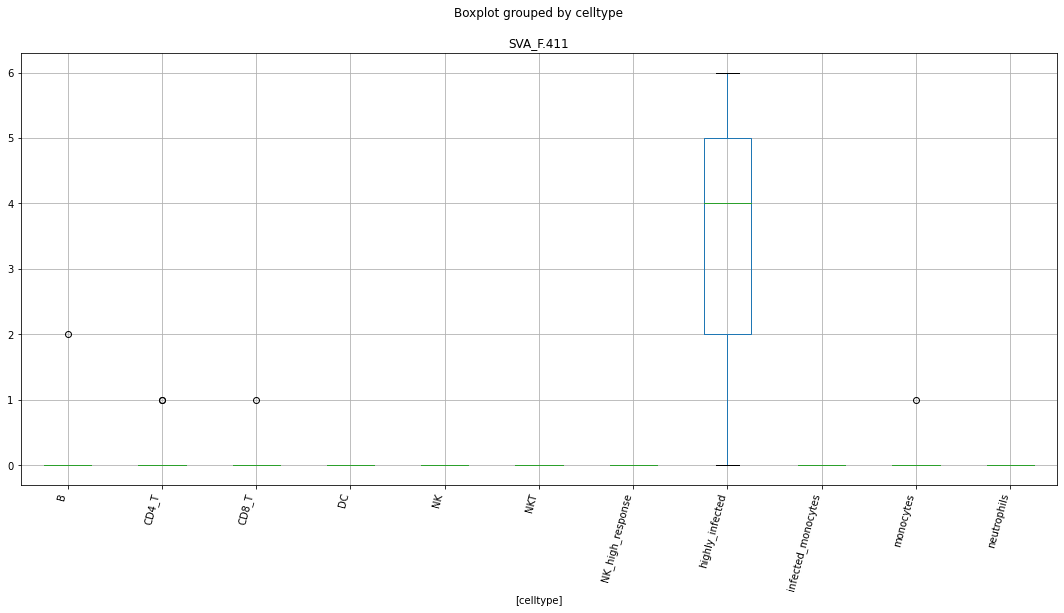

 p : 3.19869155350126e-66  ( t : 19.465270197682052 ) :  SVA_C.148


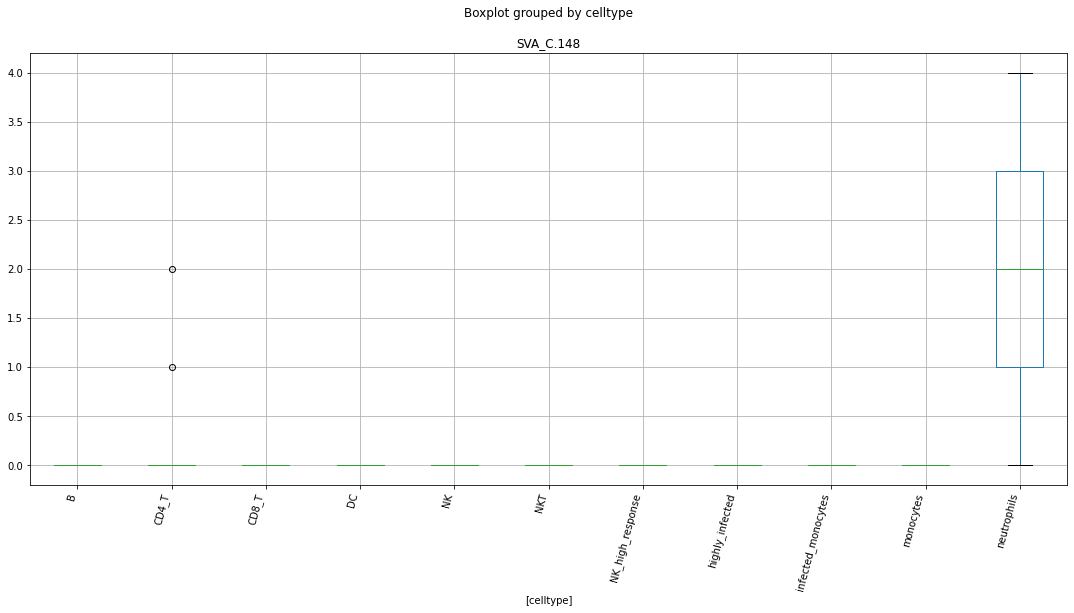

 p : 1.8398490610534955e-44  ( t : 15.172895279219869 ) :  SVA_A.114


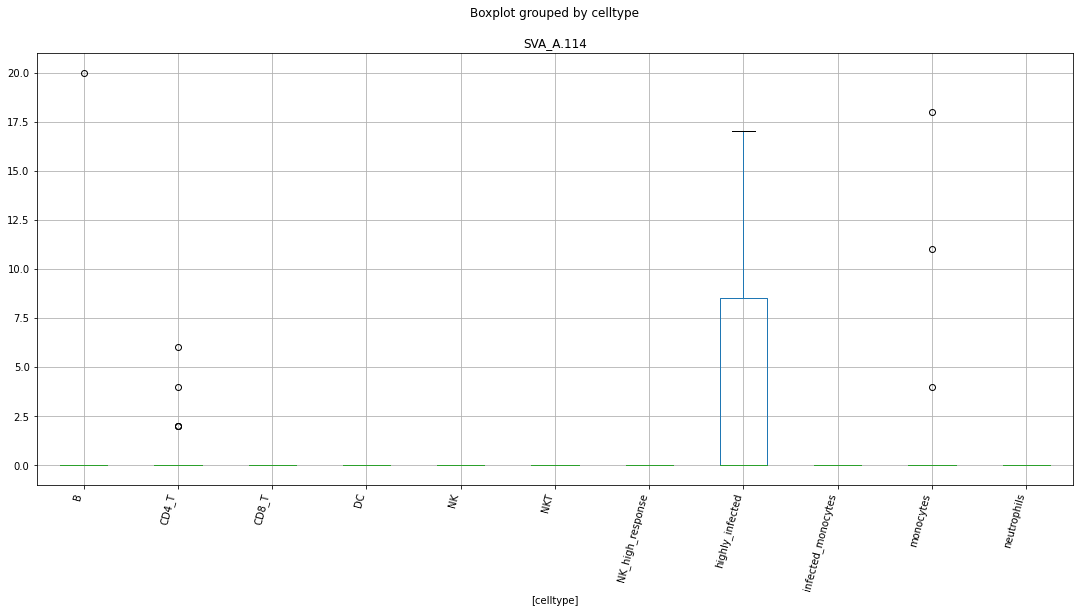

 p : 1.7147424270610324e-35  ( t : 13.256529281043838 ) :  SVA_C.147


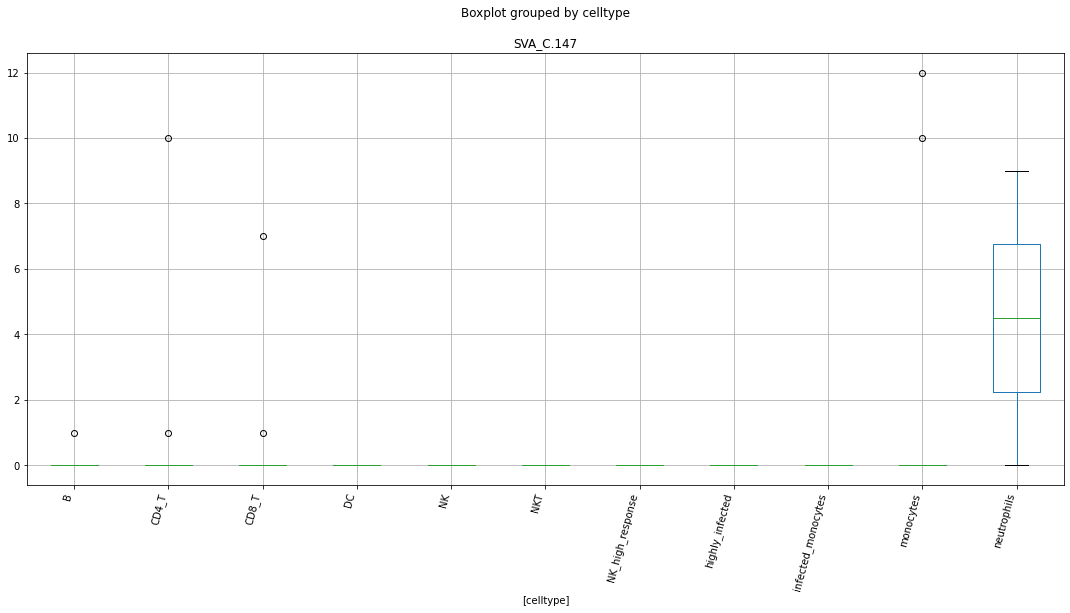

 p : 3.4310895645429965e-35  ( t : 13.188281810330894 ) :  SVA_D.561


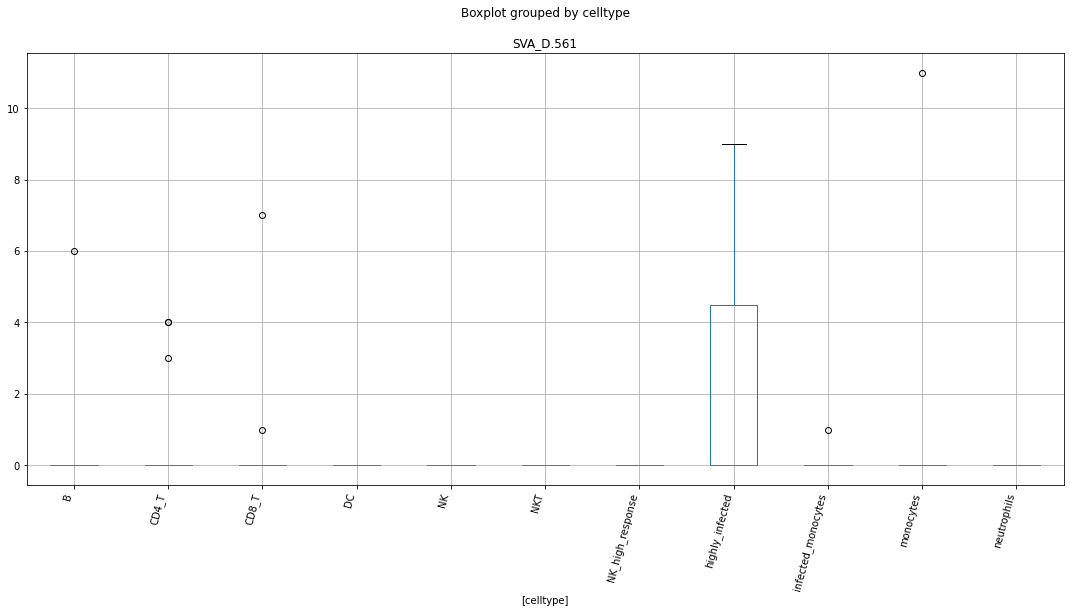

 p : 5.683848525778173e-35  ( t : 13.13951595947305 ) :  SVA_D.43


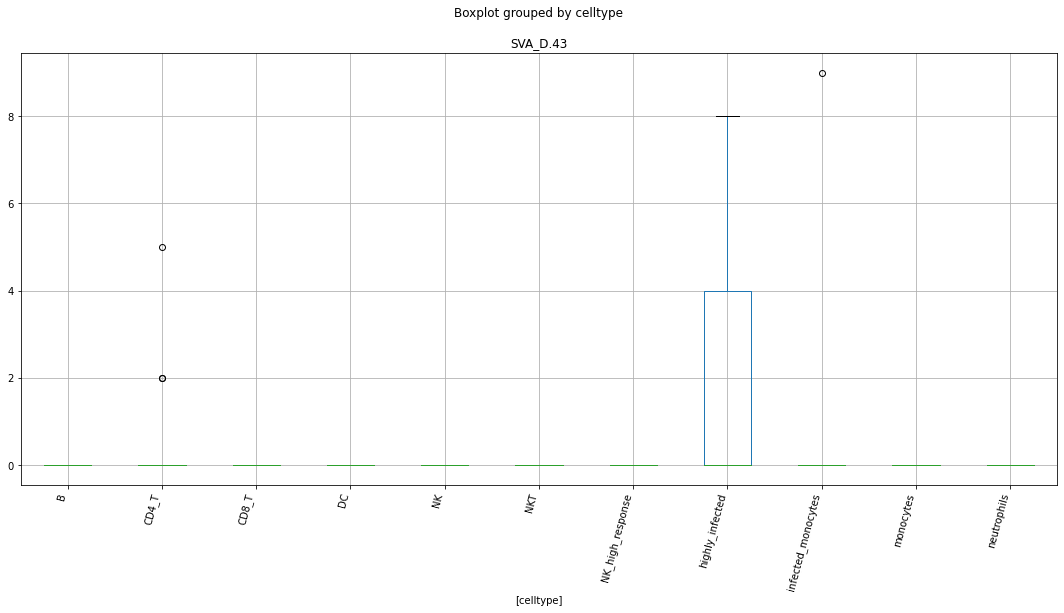

 p : 1.2704356269326554e-30  ( t : 12.149461418796857 ) :  SVA_D.851


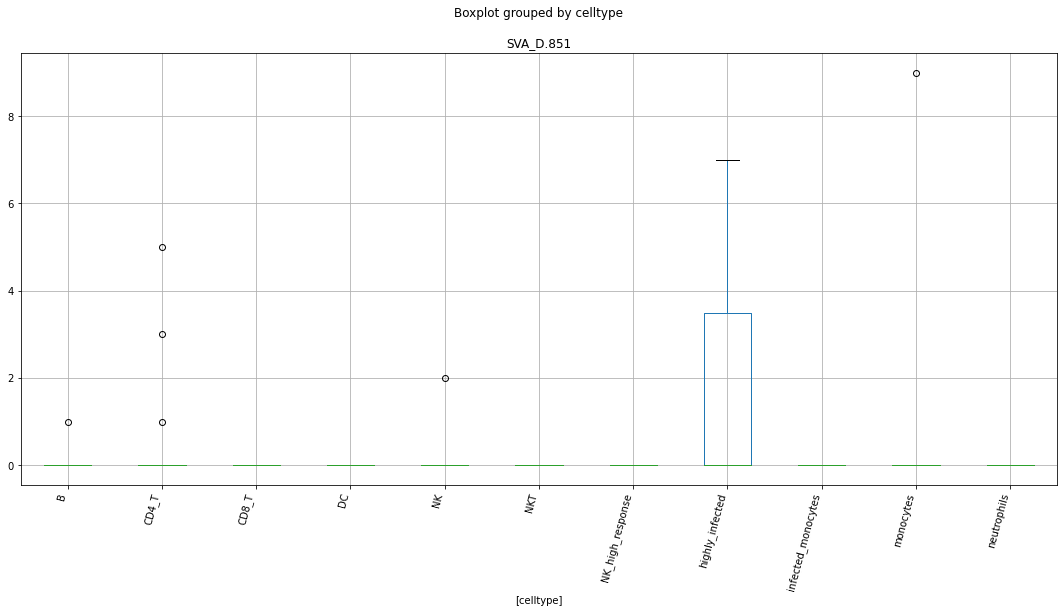

 p : 4.549283036622557e-29  ( t : 14.584965021176313 ) :  SVA_F.411


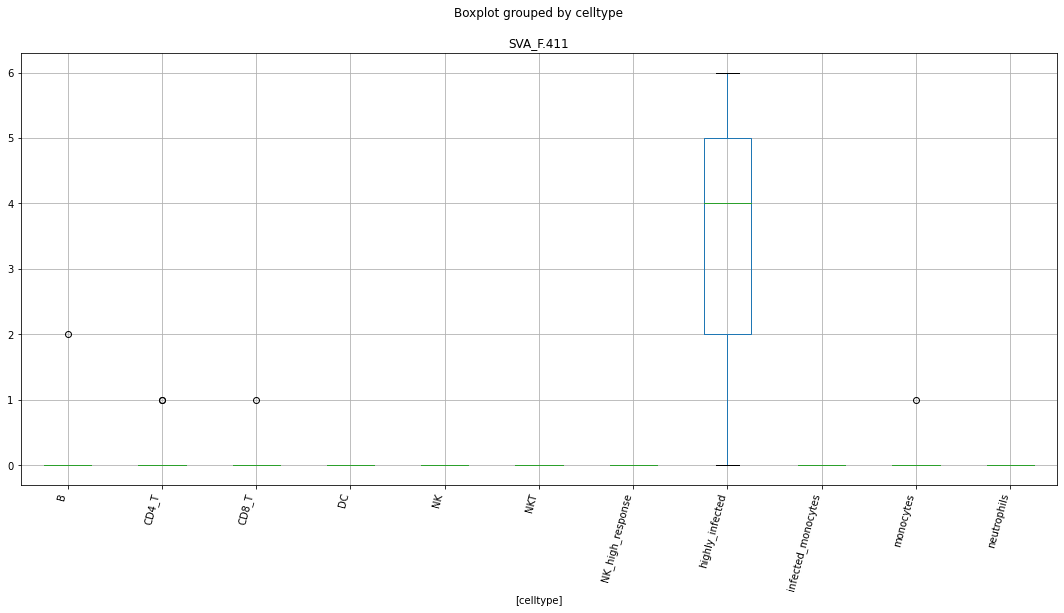

 p : 4.0789218138953674e-26  ( t : 11.069202643015425 ) :  SVA_F.191


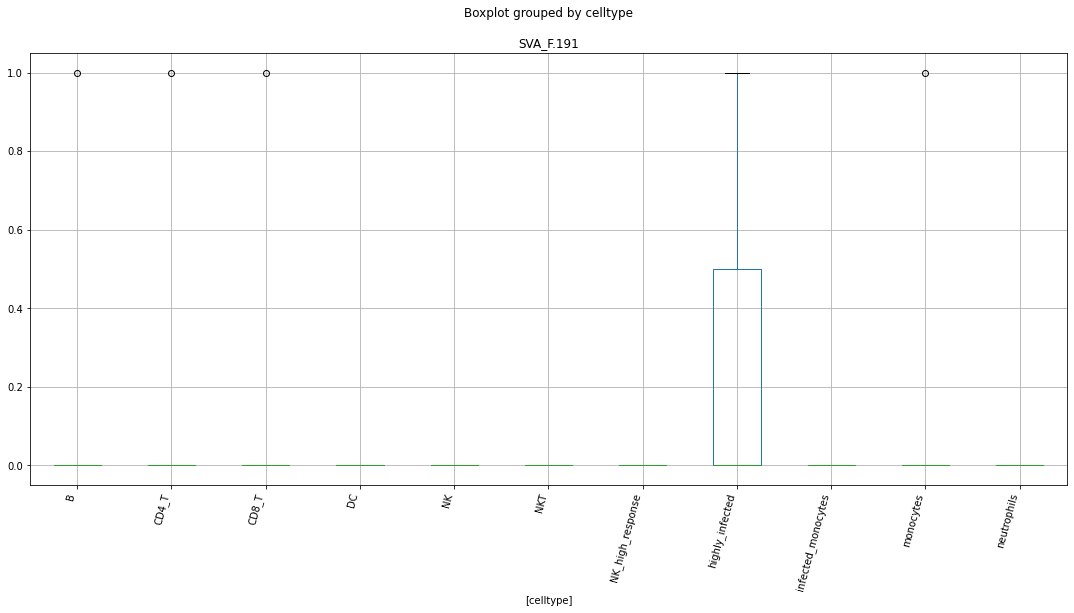

 p : 3.001260200558333e-21  ( t : 12.318253464718635 ) :  SVA_F.411


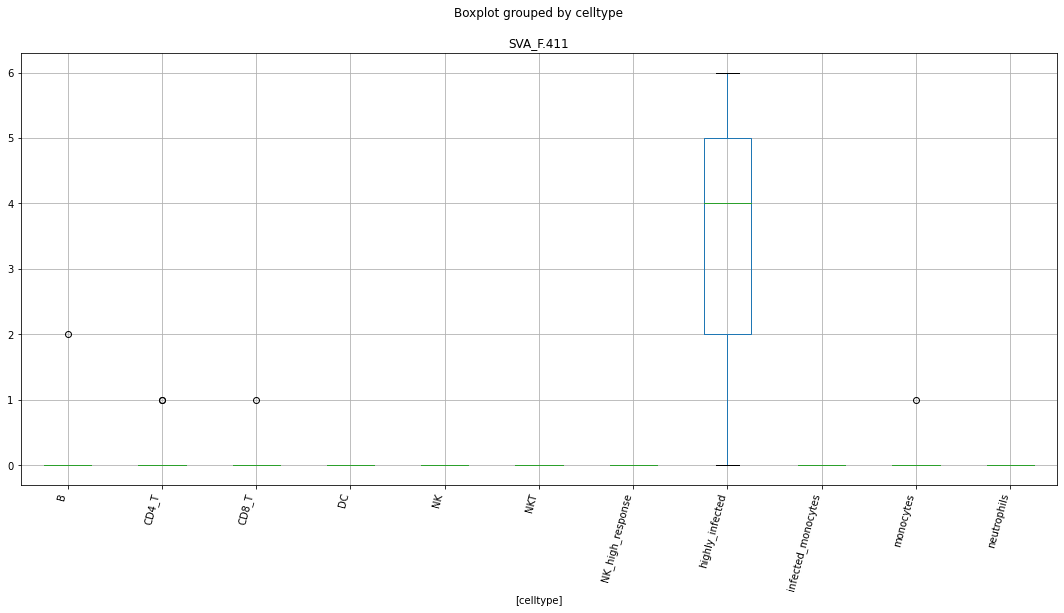

 p : 8.812008788791299e-21  ( t : 11.226342647129975 ) :  SVA_C.148


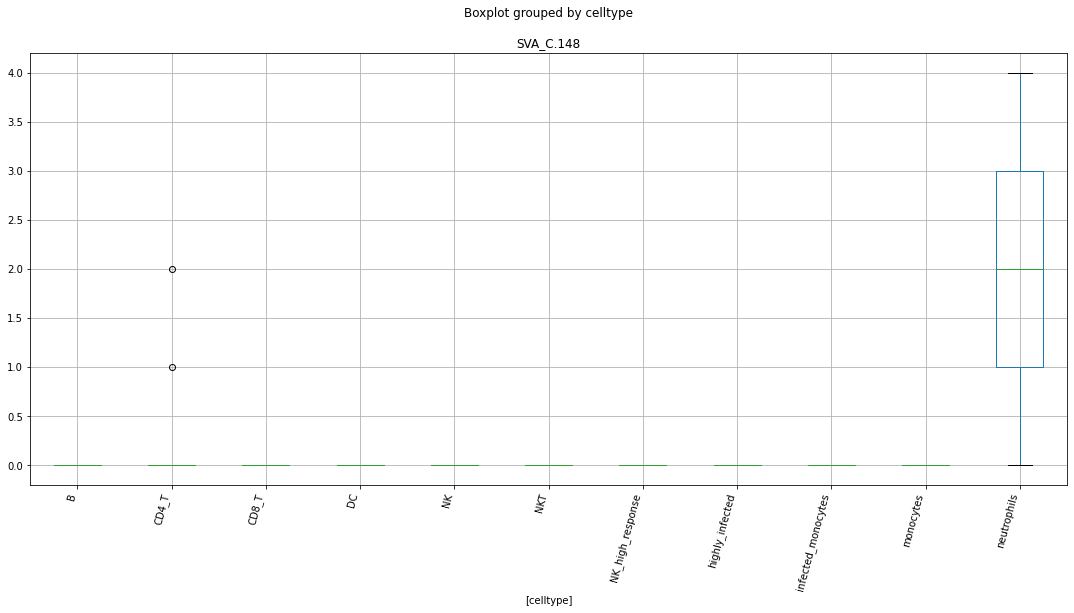

 p : 8.812008788791299e-21  ( t : 11.226342647129975 ) :  SVA_F.325


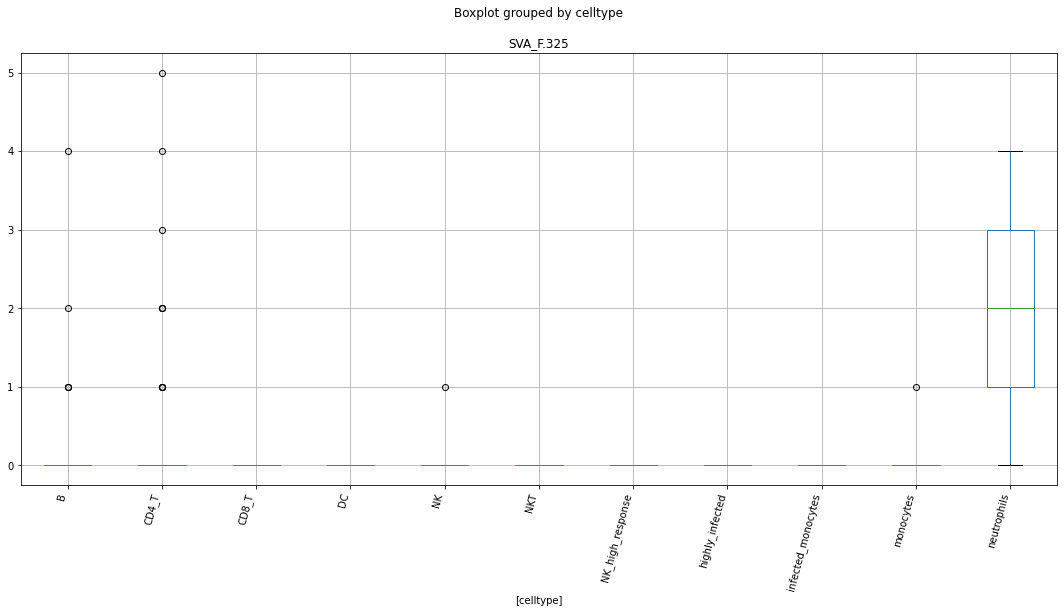

 p : 3.0109718716523544e-19  ( t : 11.380065813361407 ) :  SVA_F.411


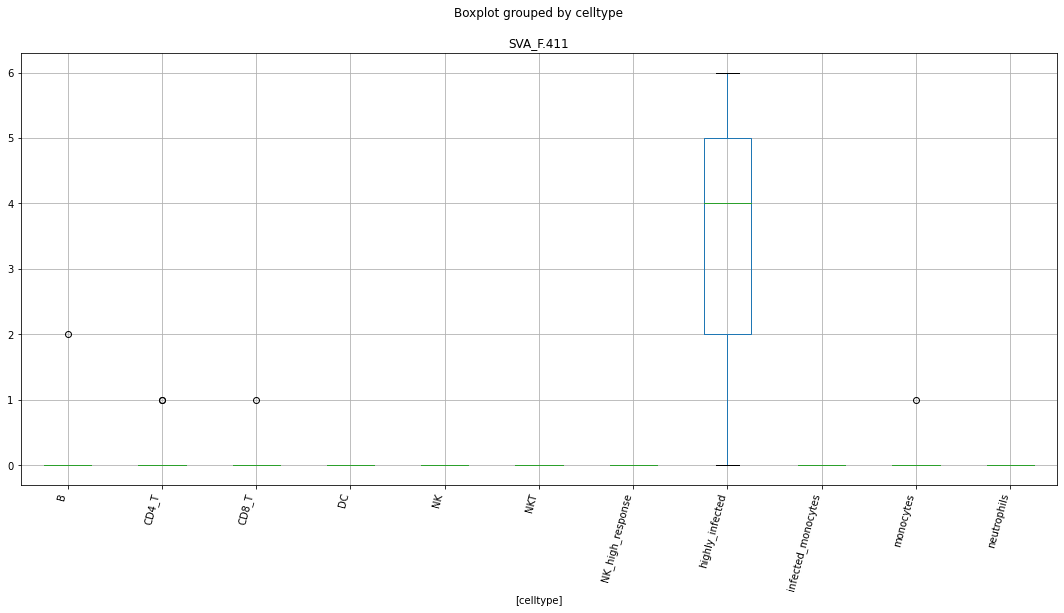

 p : 2.712769623816689e-15  ( t : 9.4890754655809 ) :  SVA_C.148


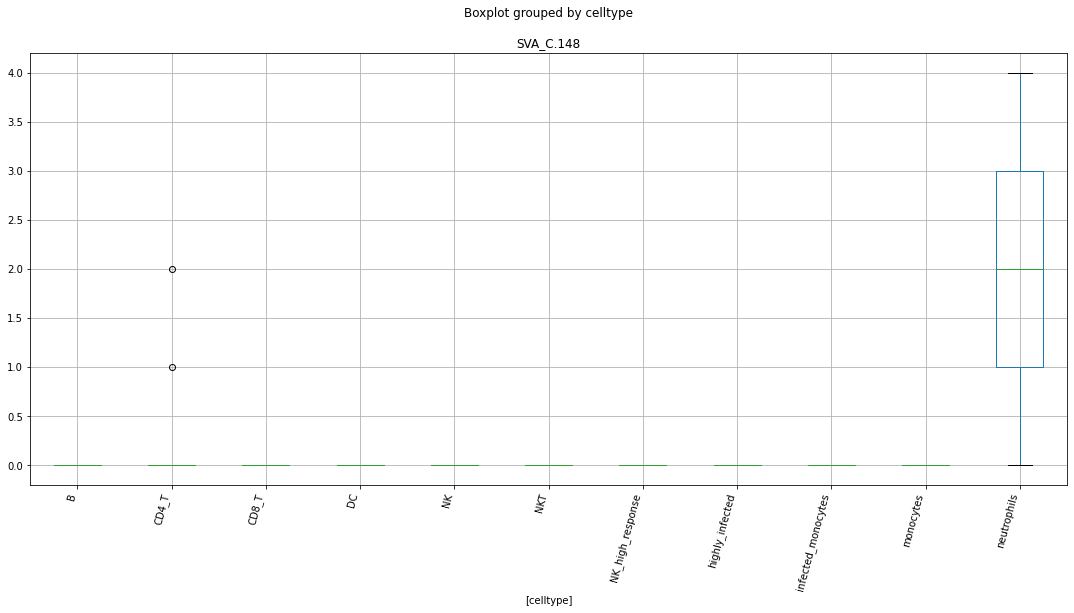

 p : 2.712769623816689e-15  ( t : 9.4890754655809 ) :  SVA_D.588


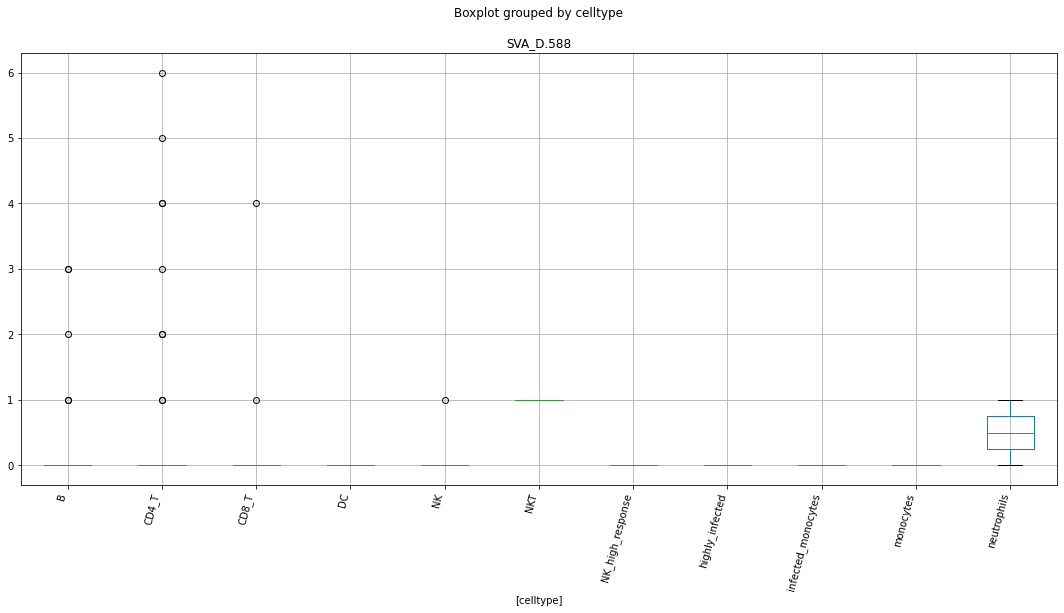

 p : 2.712769623816689e-15  ( t : 9.4890754655809 ) :  SVA_B.8


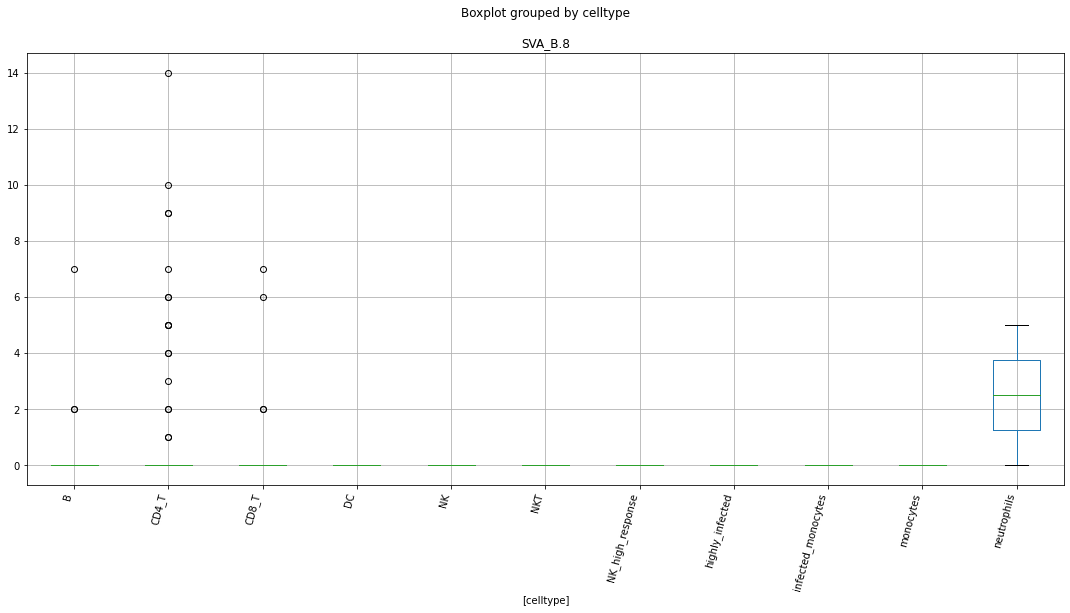

 p : 3.615330391452948e-15  ( t : 8.071498025500127 ) :  SVA_F.325


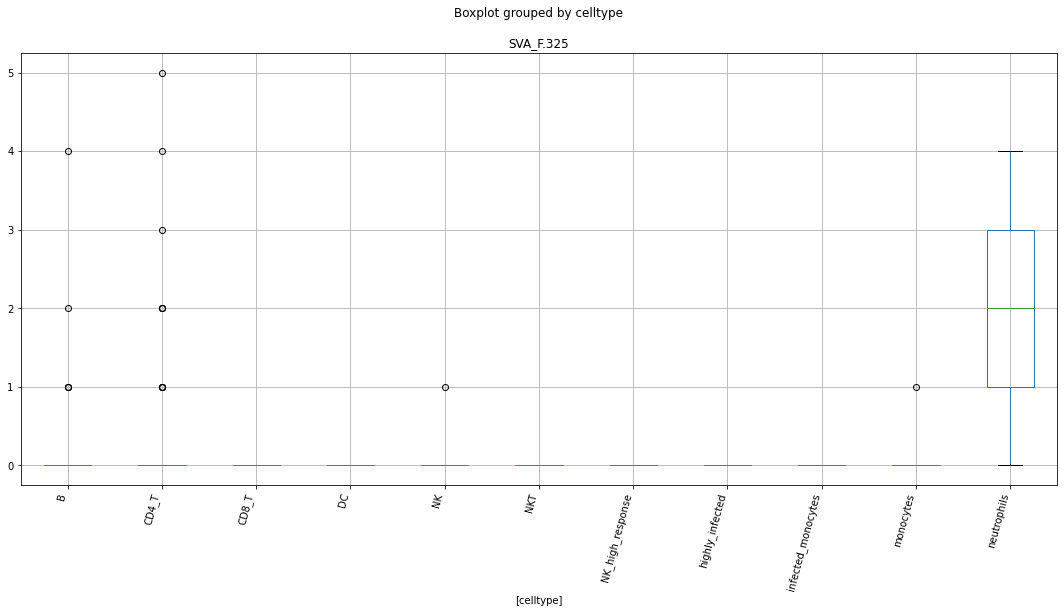

 p : 3.856797752679911e-15  ( t : 9.436260422046871 ) :  SVA_C.148


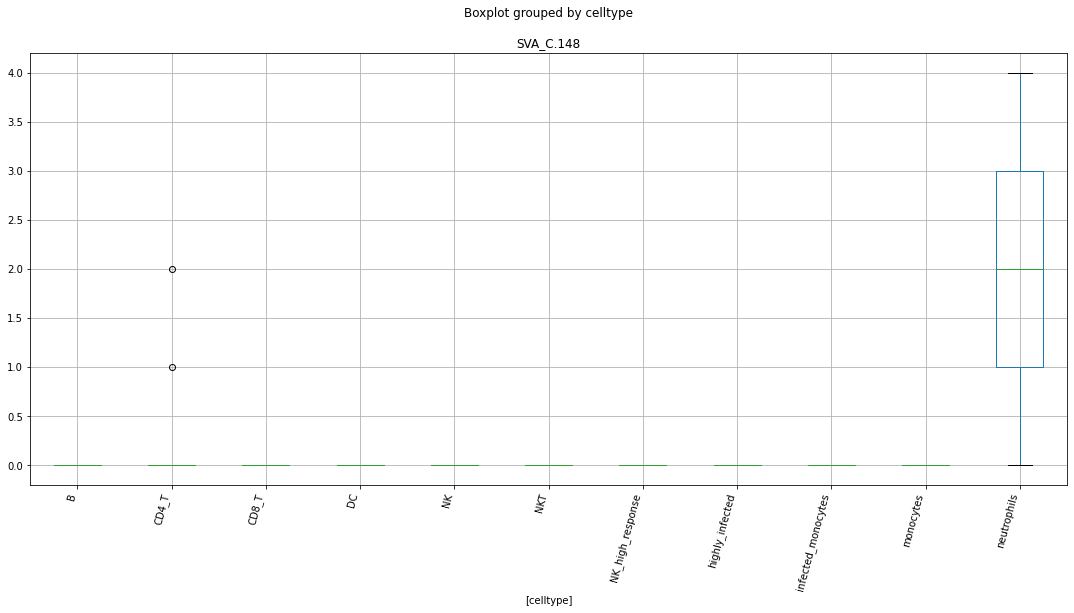

 p : 6.512600385754244e-15  ( t : 7.966448383533359 ) :  SVA_A.144


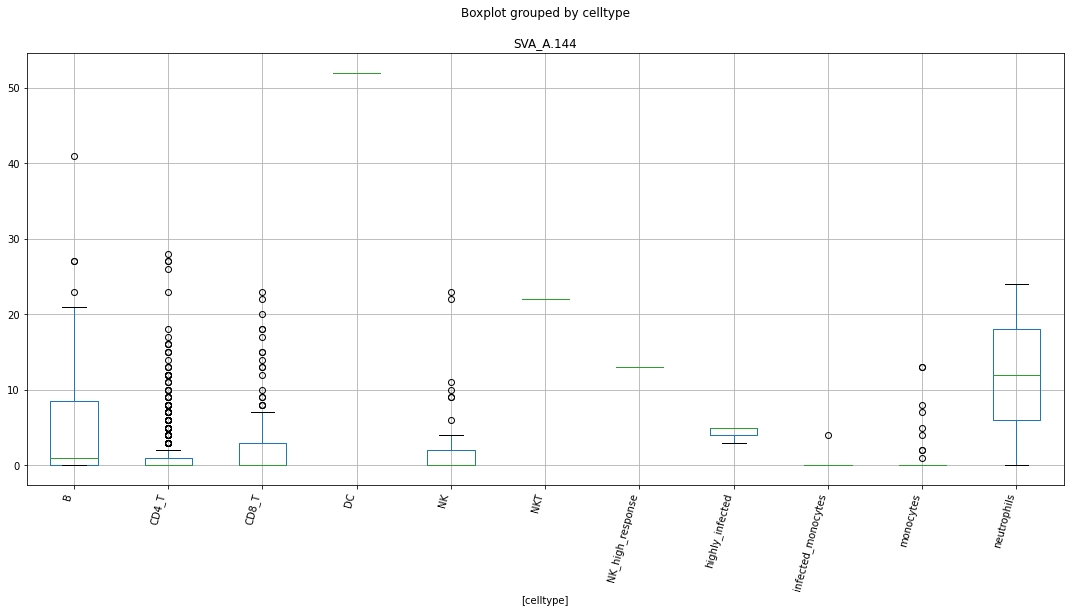

 p : 7.426692249706702e-15  ( t : 9.300344659558569 ) :  SVA_C.147


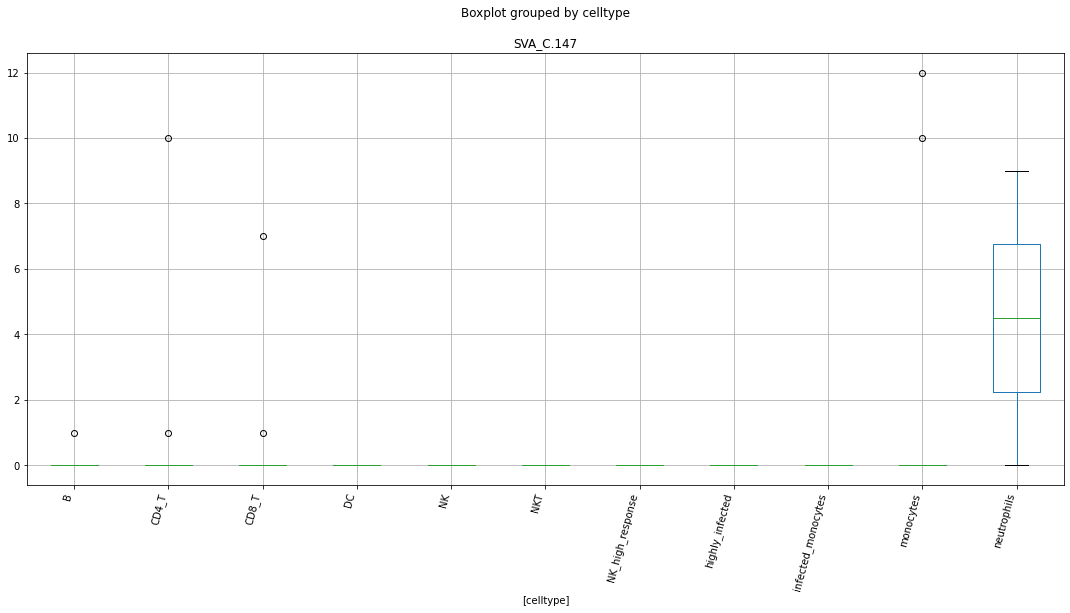

 p : 1.653867497816294e-14  ( t : 7.861519352473703 ) :  SVA_A.217


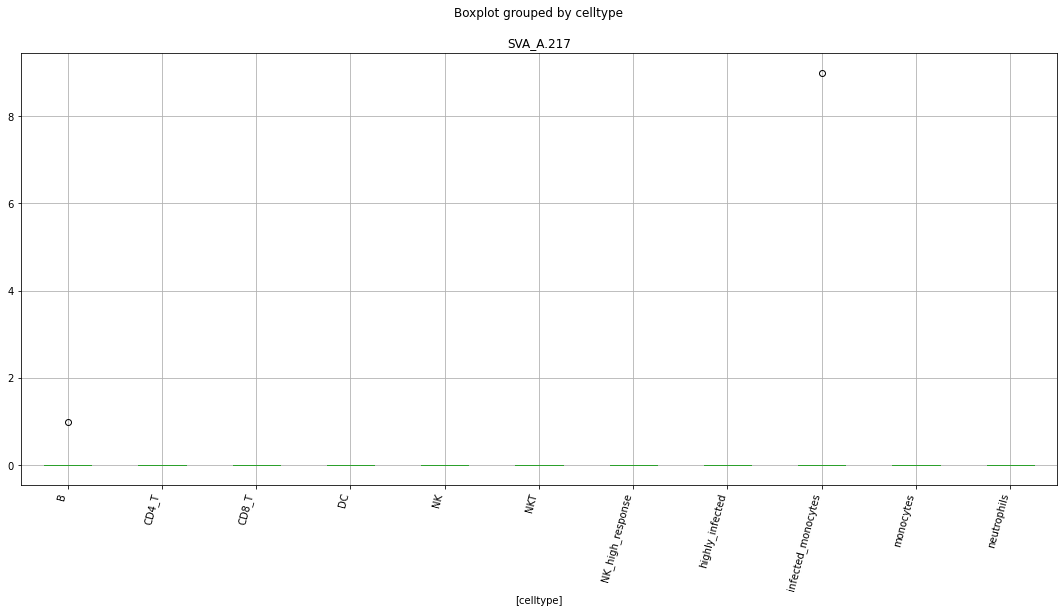

 p : 1.653867497816294e-14  ( t : 7.861519352473703 ) :  SVA_B.100


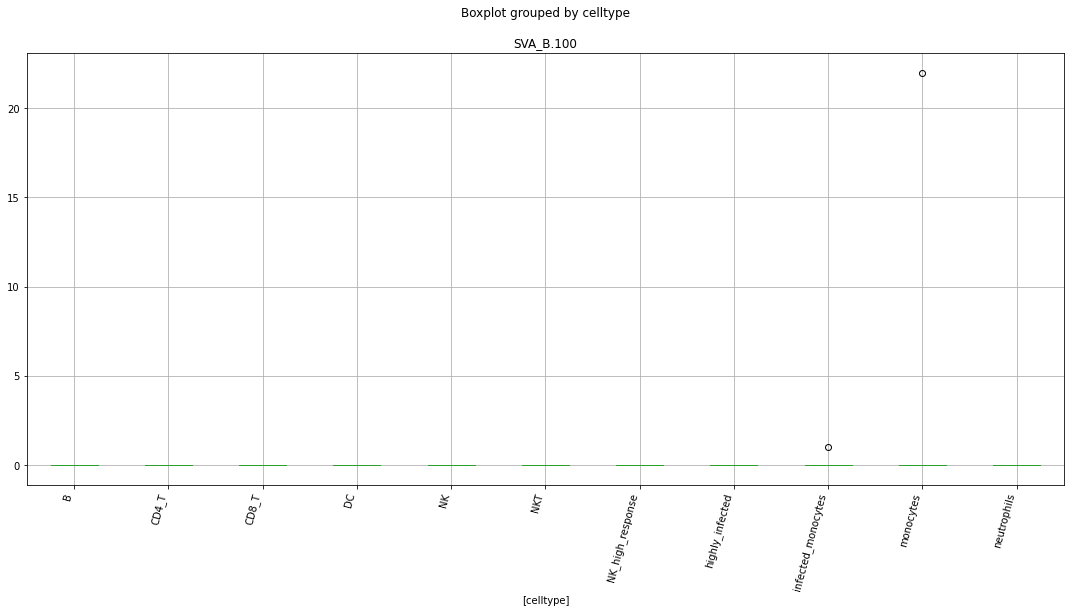

 p : 1.653867497816294e-14  ( t : 7.861519352473703 ) :  SVA_B.397


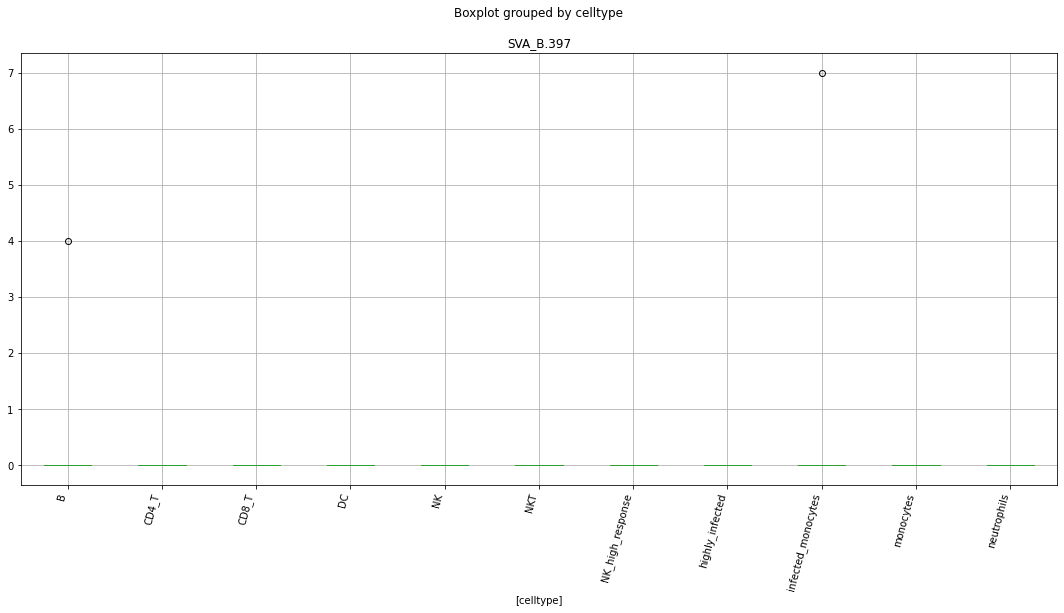

 p : 1.653867497816294e-14  ( t : 7.861519352473703 ) :  SVA_E.90


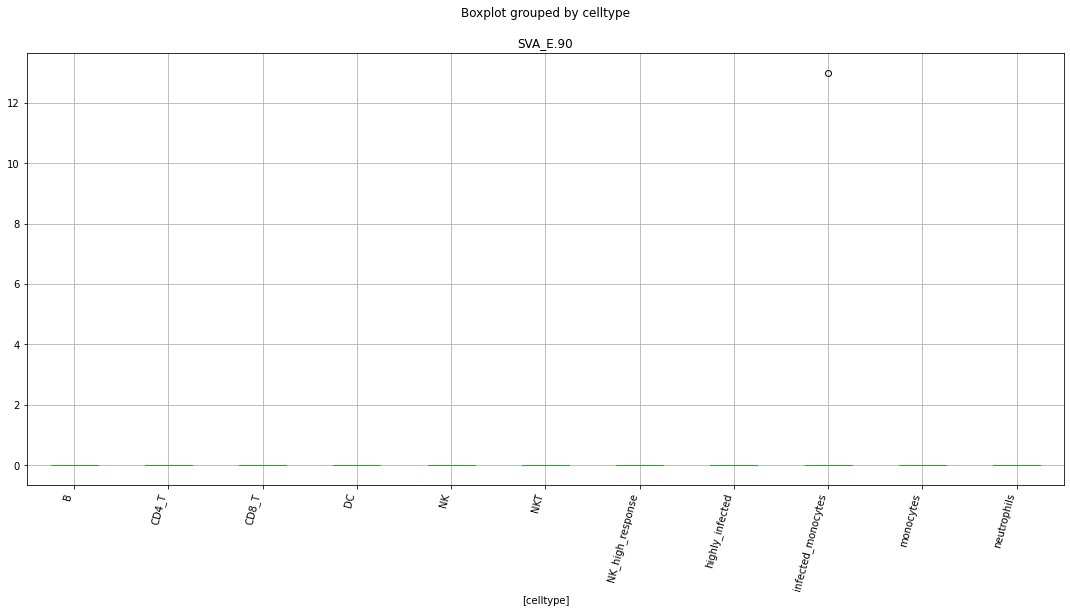

 p : 1.8330929004821015e-14  ( t : 9.094829803686425 ) :  SVA_C.259


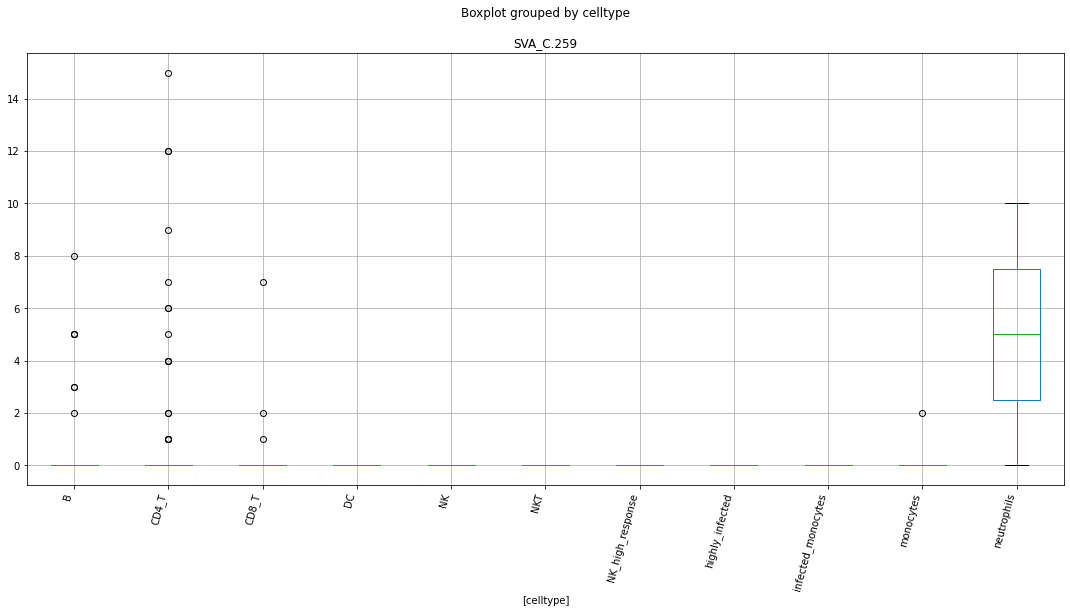

 p : 4.6379059958038784e-14  ( t : 8.90314239934905 ) :  SVA_F.325


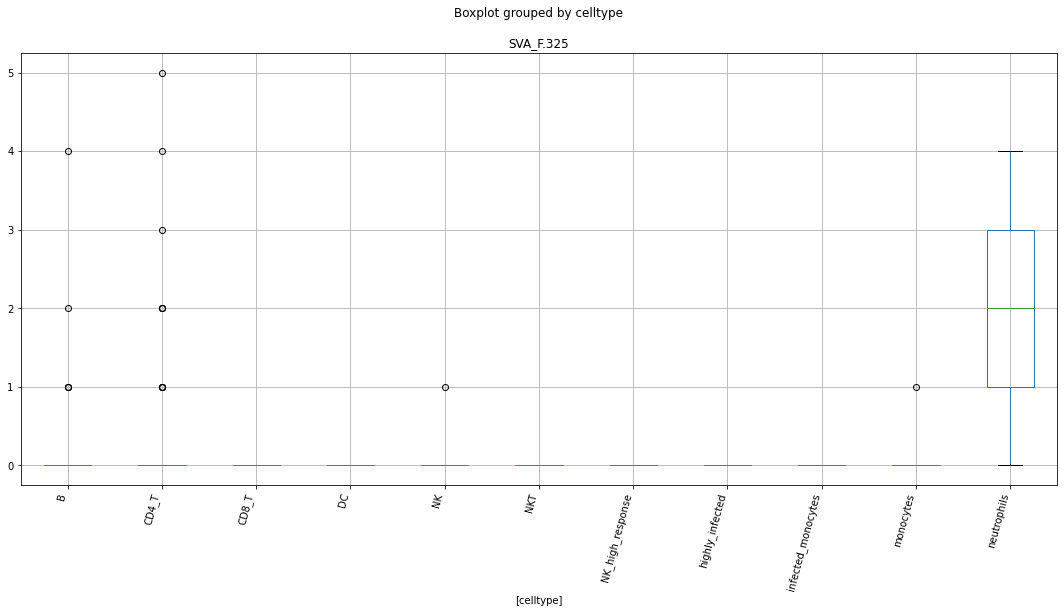

 p : 5.932722644897262e-14  ( t : 8.43748290016635 ) :  SVA_B.163


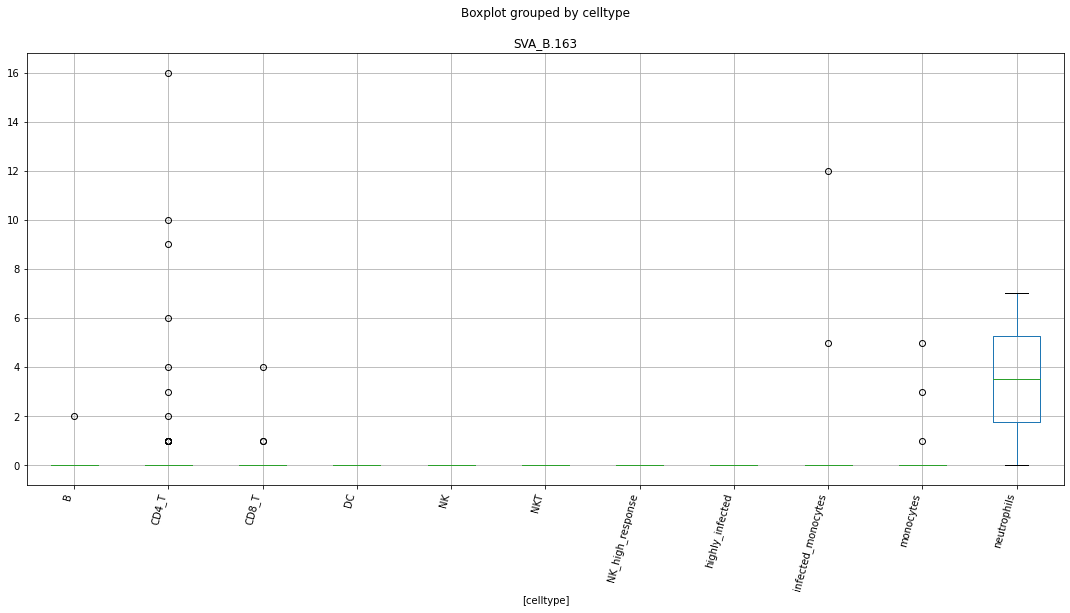

 p : 6.510542091323301e-14  ( t : 7.671206092726921 ) :  SVA_B.357


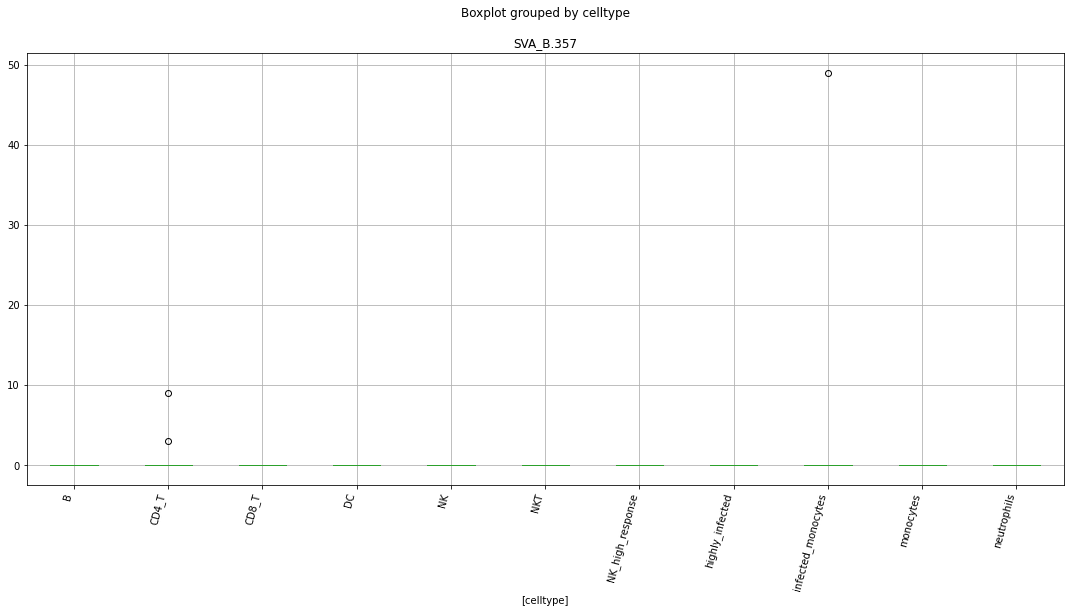

 p : 1.0718026100607039e-13  ( t : 7.6010335771958 ) :  SVA_B.264


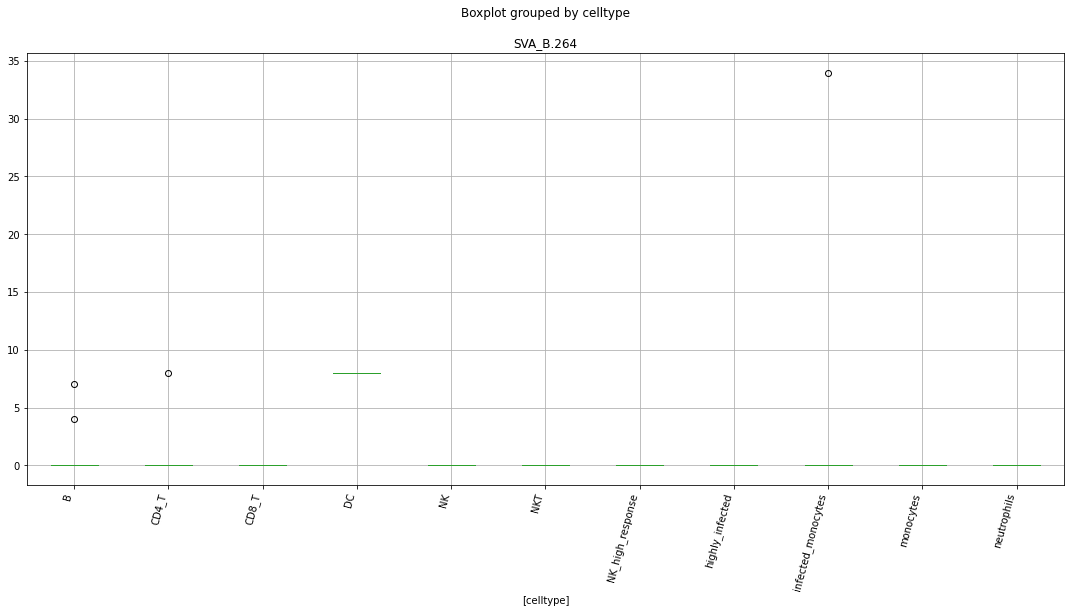

 p : 1.333549790464747e-13  ( t : 8.700815836845253 ) :  SVA_B.163


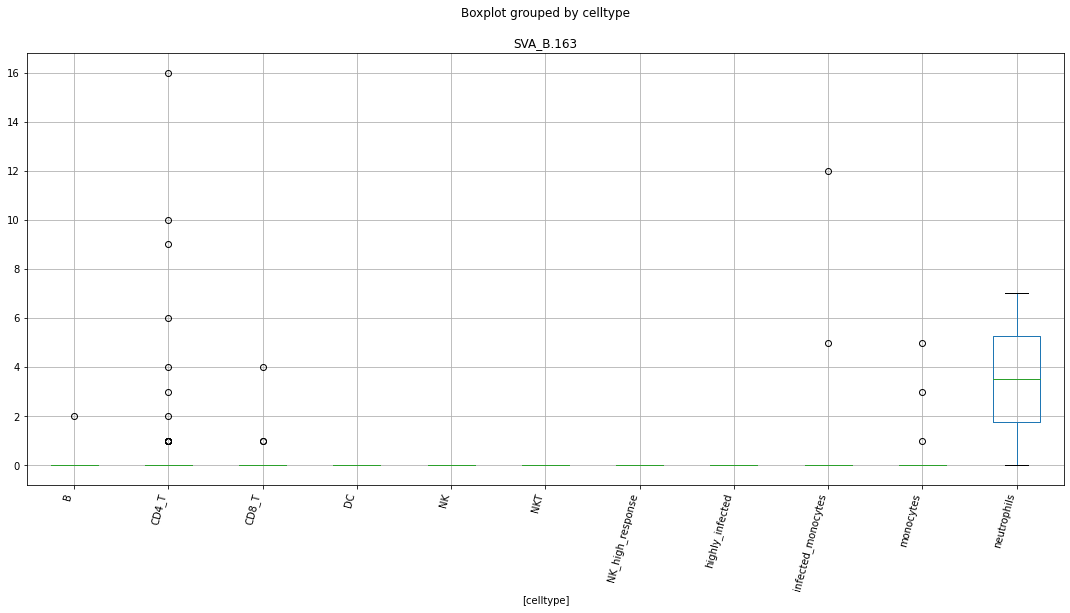

 p : 4.4011286564185413e-13  ( t : 7.40137109495204 ) :  SVA_D.1231


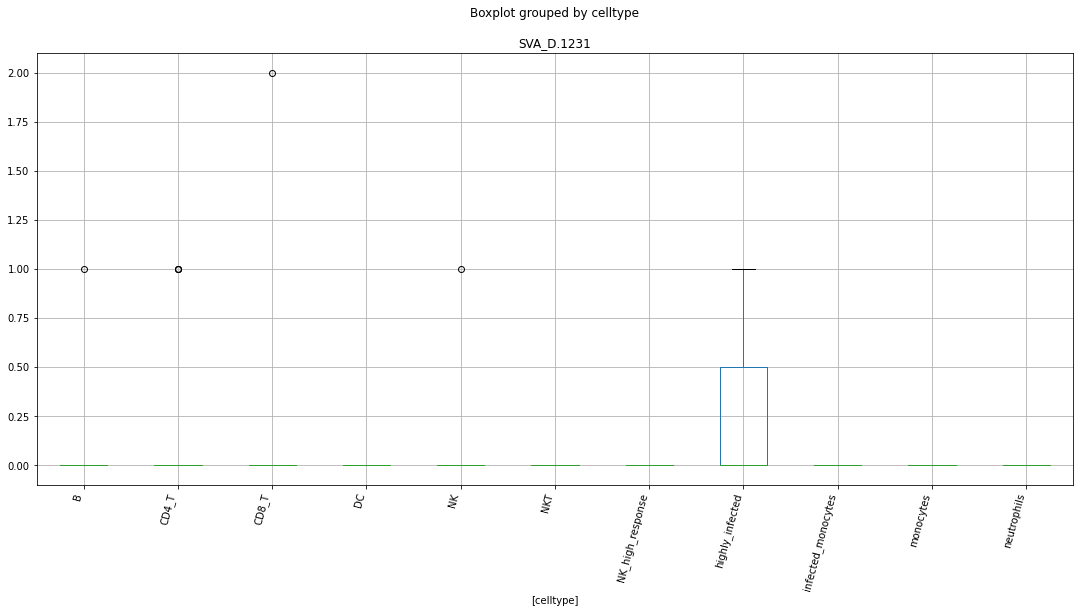

 p : 8.668697954370325e-13  ( t : 7.938696414611079 ) :  SVA_A.114


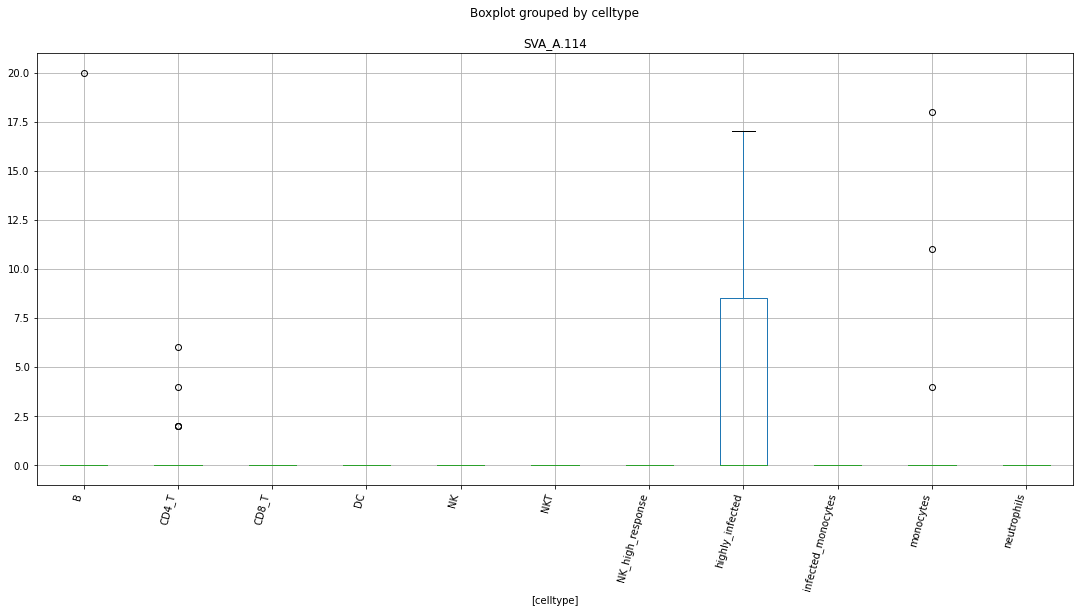

 p : 8.668697954370325e-13  ( t : 7.938696414611078 ) :  SVA_D.851


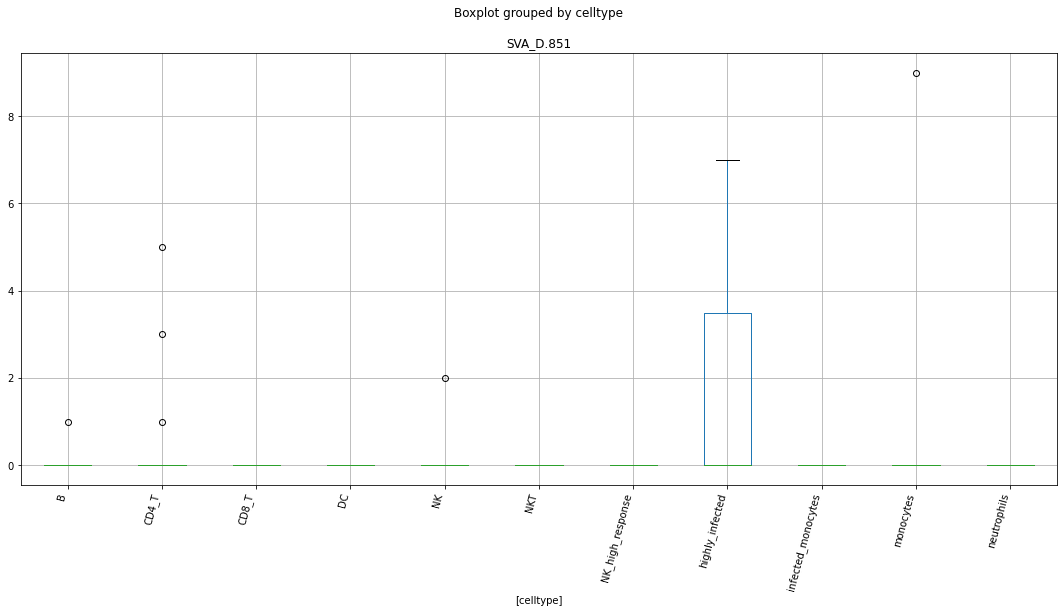

 p : 8.668697954370419e-13  ( t : 7.938696414611077 ) :  SVA_E.108


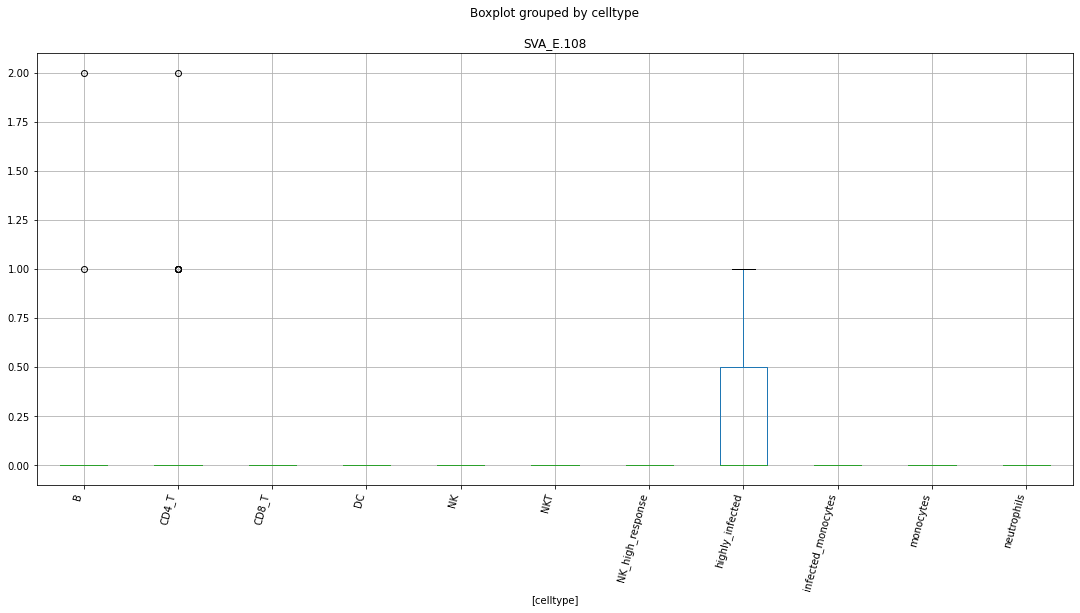

 p : 8.668697954370419e-13  ( t : 7.938696414611077 ) :  SVA_D.43


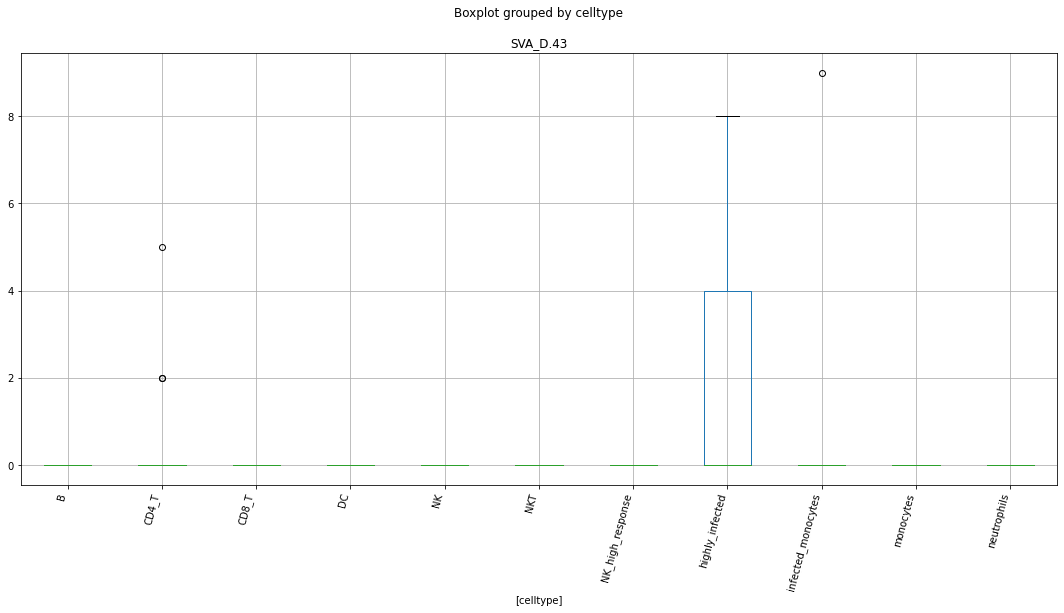

 p : 1.6065616333174898e-12  ( t : 9.269112257844196 ) :  SVA_F.411


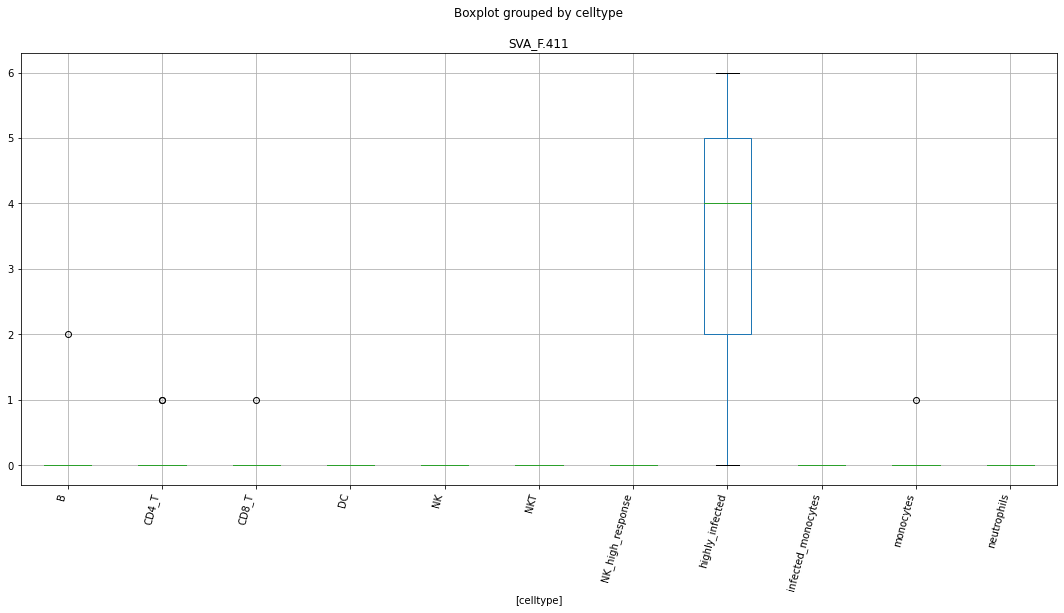

 p : 2.487870165669188e-12  ( t : 7.147578019527851 ) :  SVA_F.766


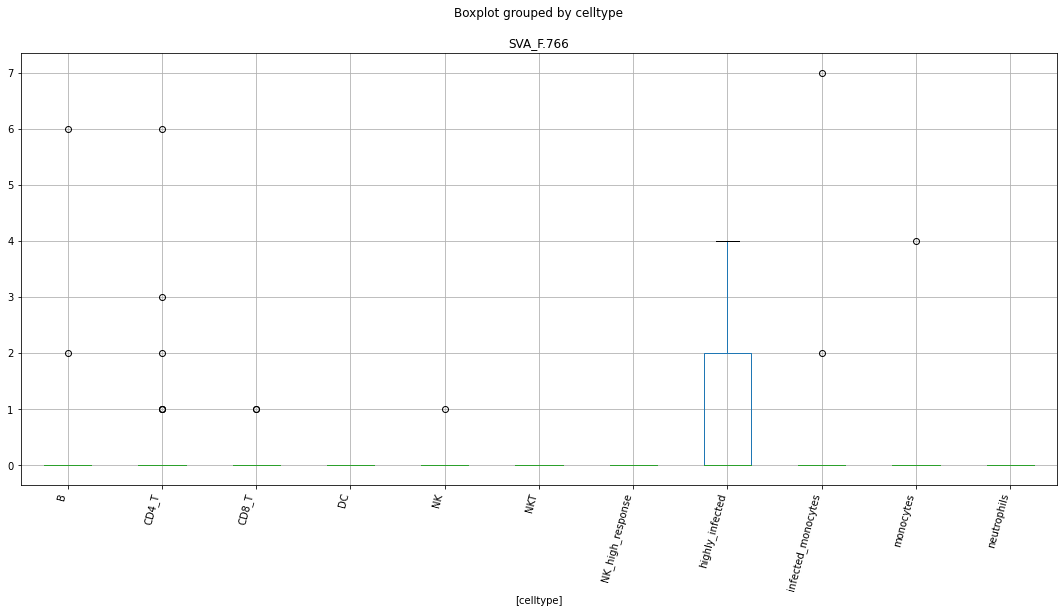

 p : 3.3948457392072824e-12  ( t : 7.691385398492592 ) :  SVA_C.259


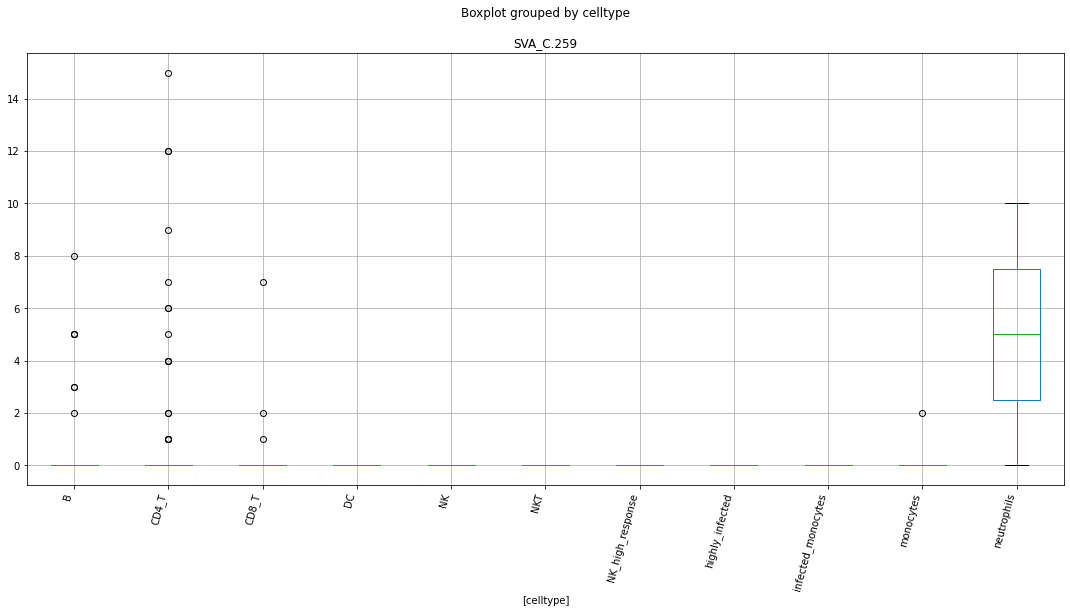

 p : 1.388561669054343e-11  ( t : 7.426264317232569 ) :  SVA_C.147


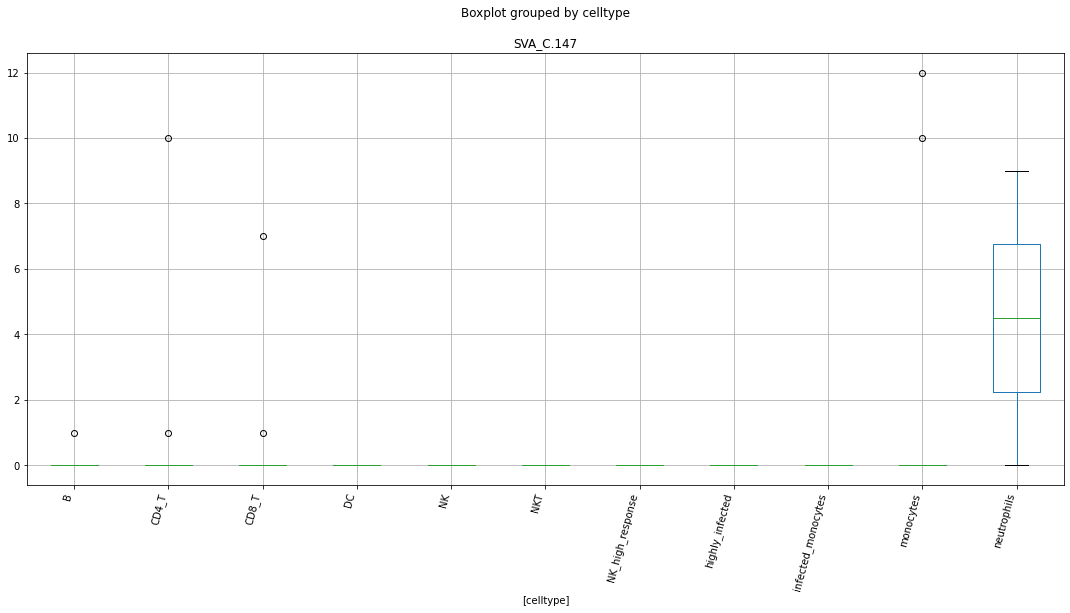

 p : 1.4156281087224596e-11  ( t : 8.6972656541753 ) :  SVA_D.986


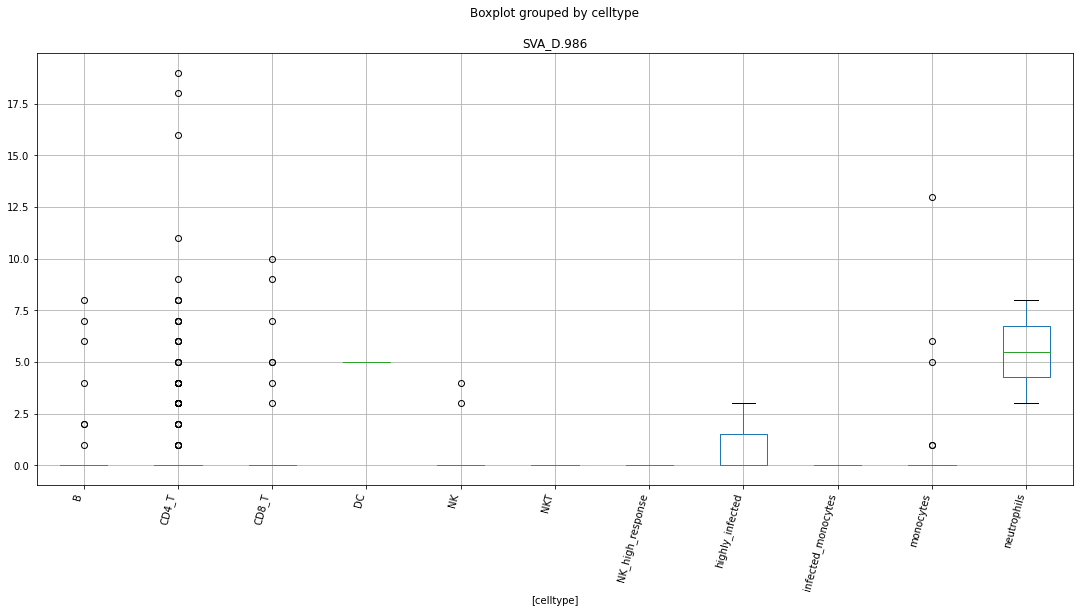

 p : 3.7055707593685545e-11  ( t : 7.239475759185924 ) :  SVA_F.942


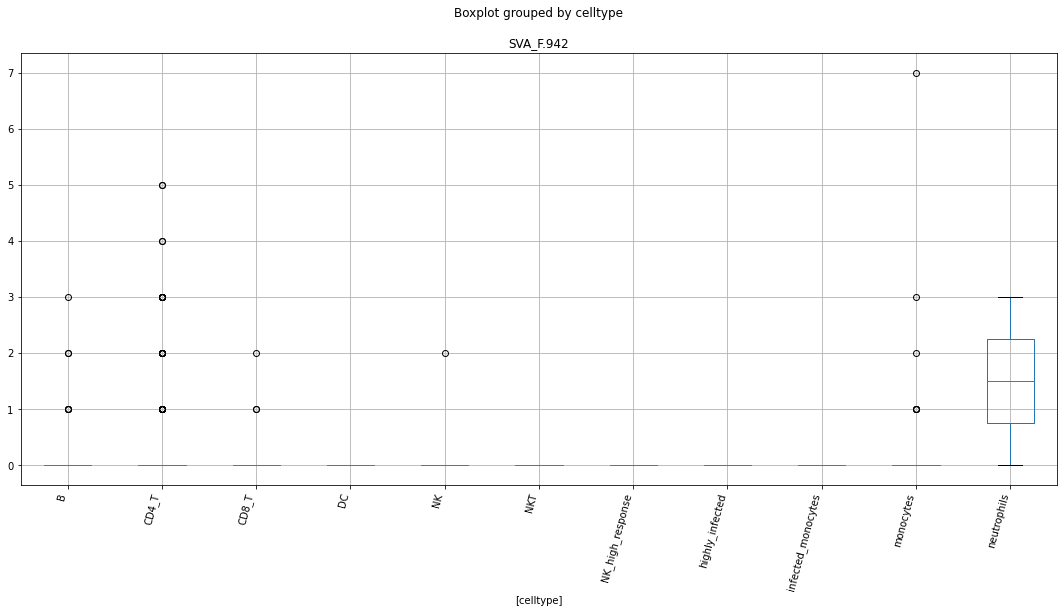

 p : 4.2392066812790053e-11  ( t : 7.208573451860256 ) :  SVA_F.766


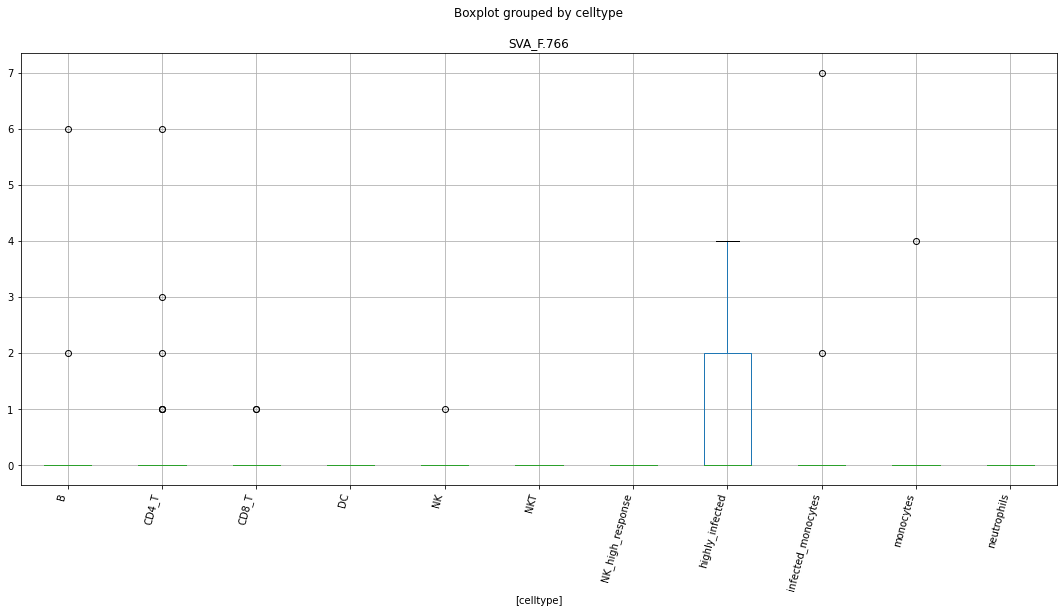

 p : 6.385613596550423e-11  ( t : 6.6496176089462615 ) :  SVA_F.766


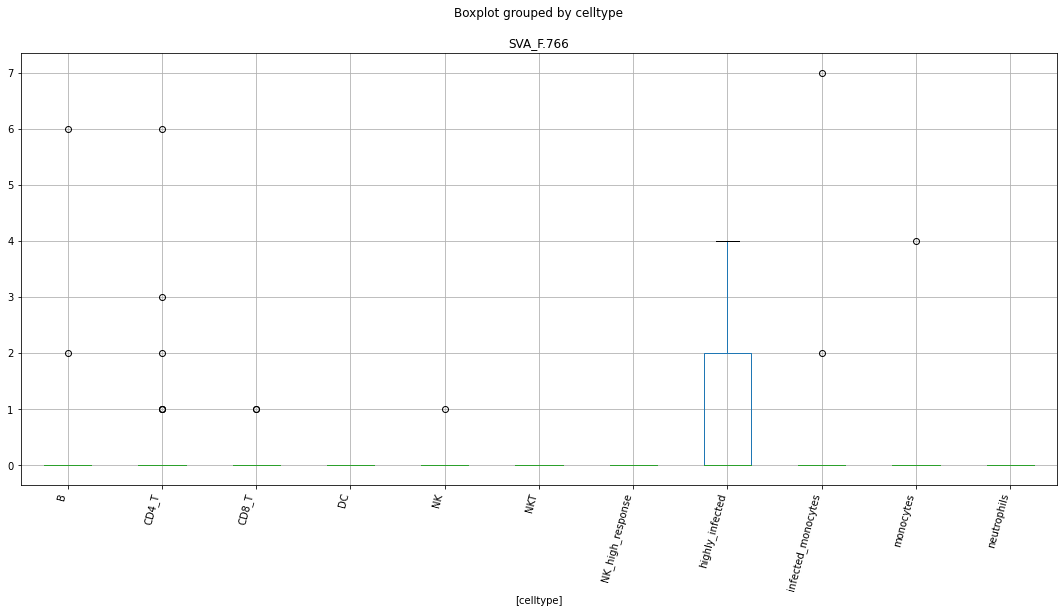

 p : 2.6719420040113093e-10  ( t : 6.420839212084405 ) :  SVA_D.43


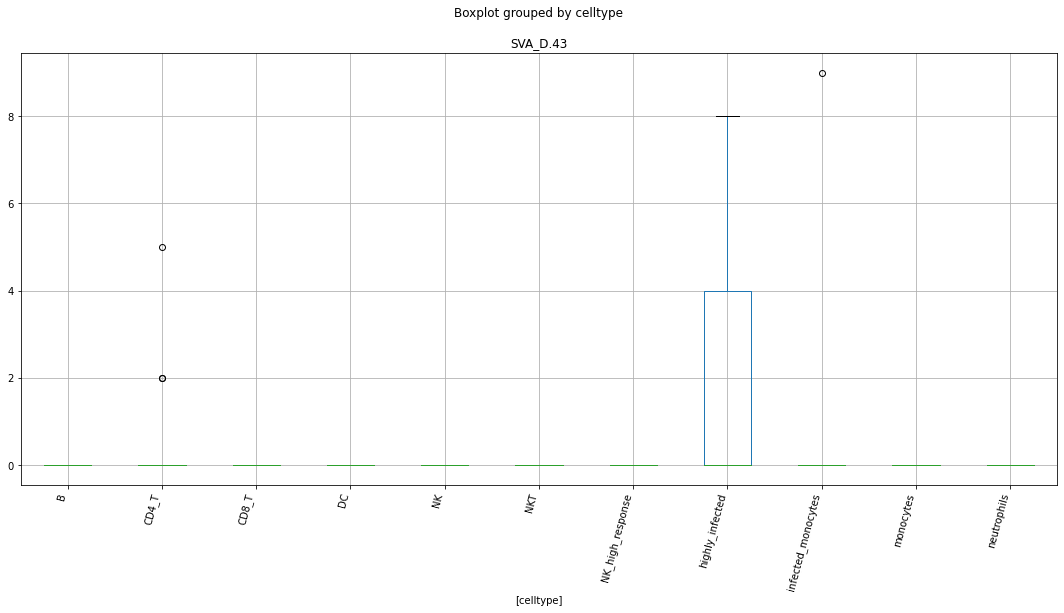

 p : 2.9307158654650083e-10  ( t : 6.40583076831823 ) :  SVA_B.57


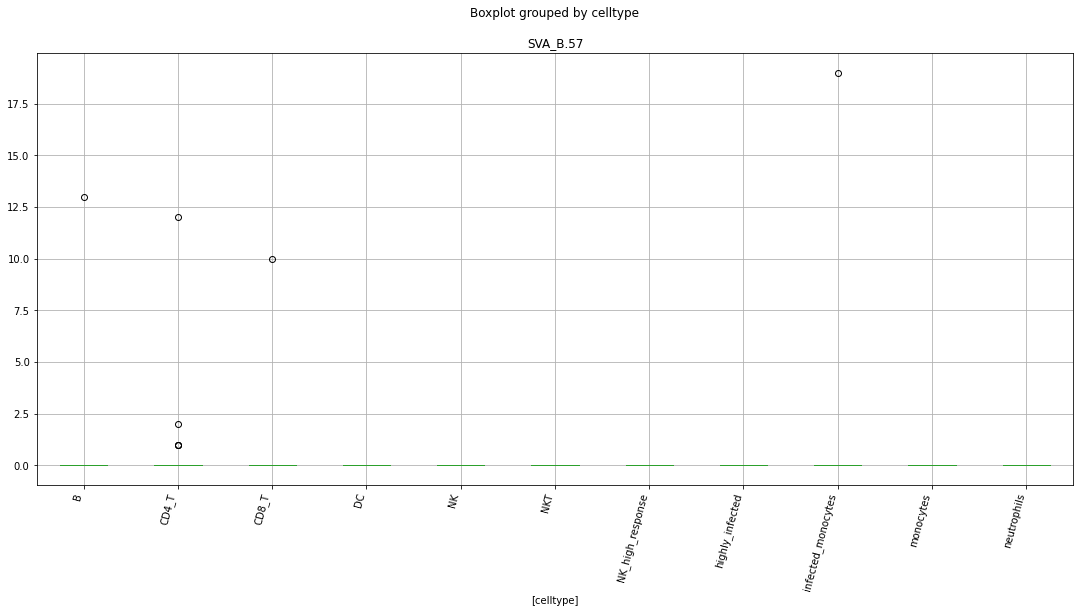

 p : 1.2660506145317717e-09  ( t : 6.1655768115784895 ) :  SVA_E.59


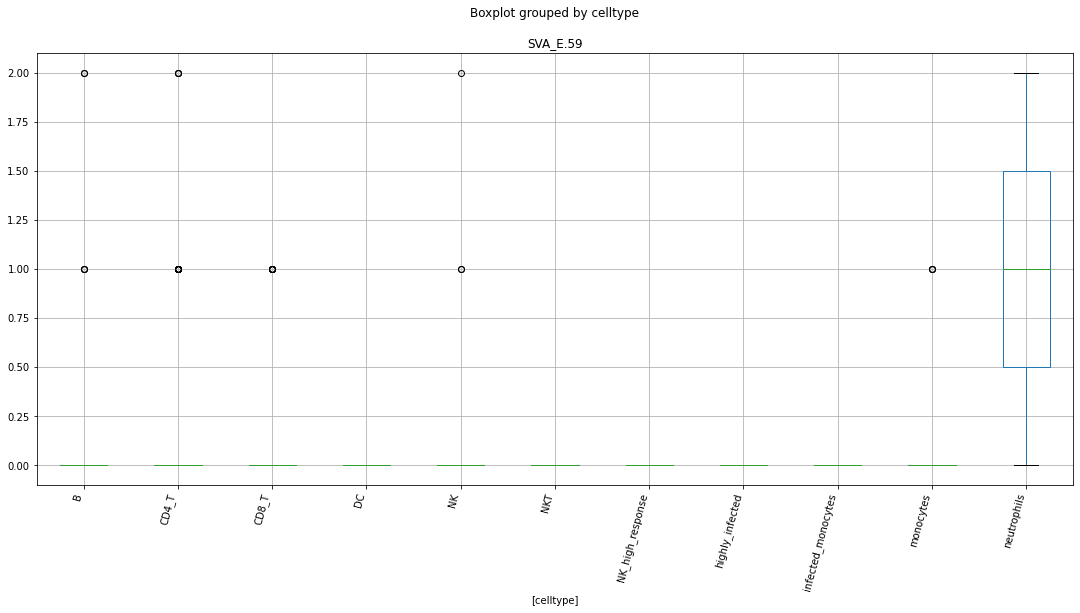

 p : 1.500496511016153e-09  ( t : 6.710557275470378 ) :  SVA_B.331


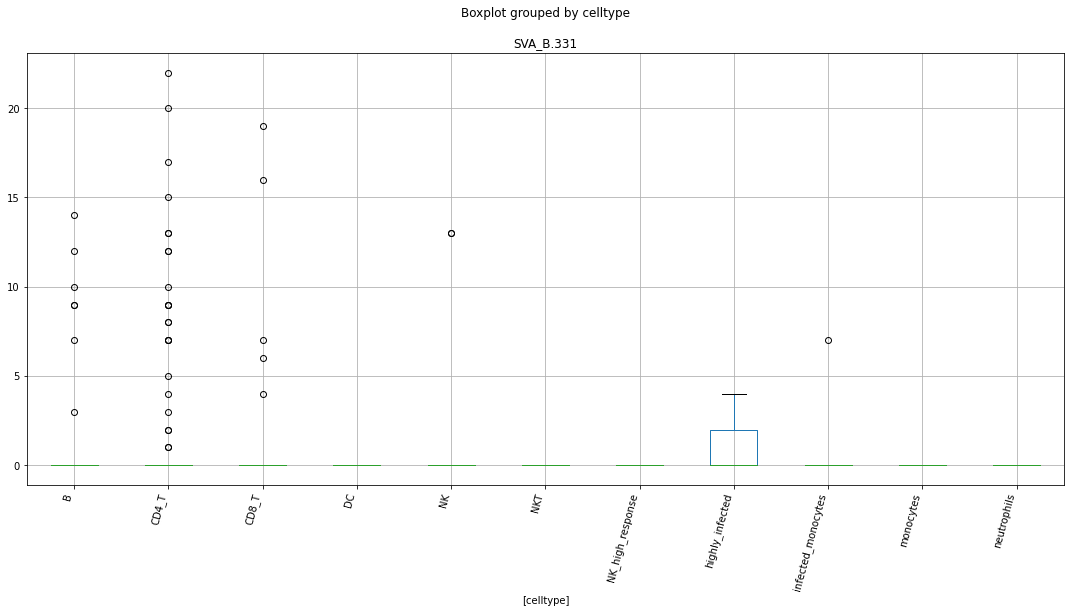

 p : 1.500496511016153e-09  ( t : 6.710557275470378 ) :  SVA_D.43


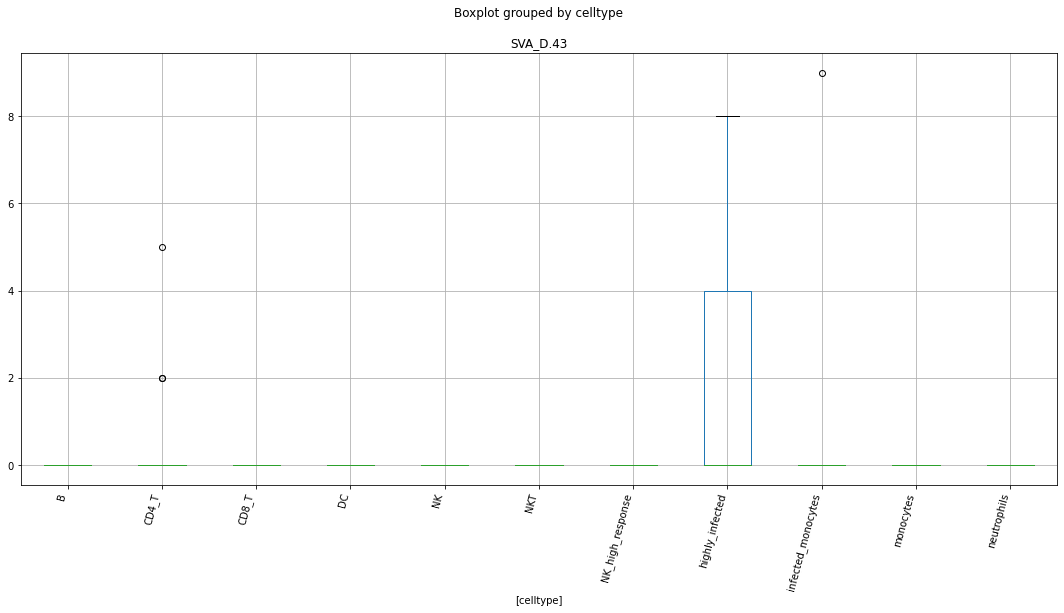

 p : 1.500496511016153e-09  ( t : 6.710557275470378 ) :  SVA_D.1231


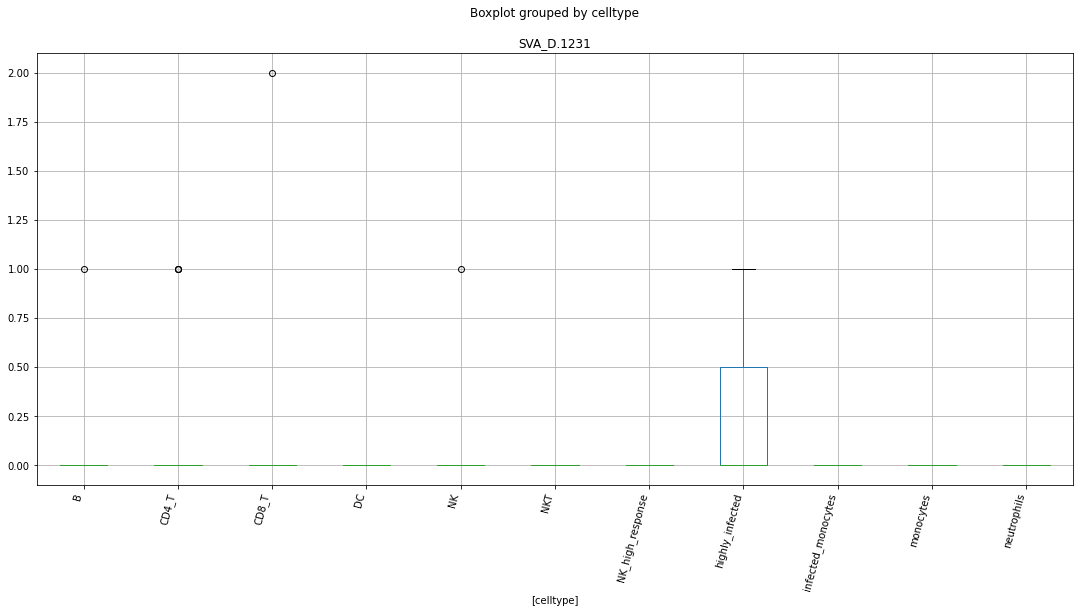

 p : 1.500496511016153e-09  ( t : 6.710557275470378 ) :  SVA_F.474


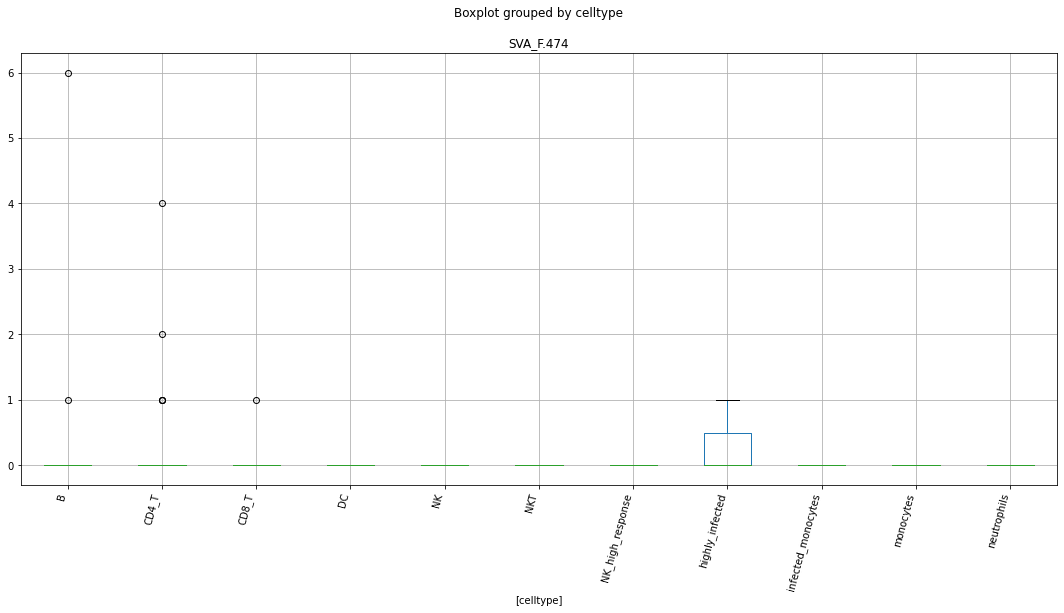

 p : 1.500496511016153e-09  ( t : 6.710557275470378 ) :  SVA_E.108


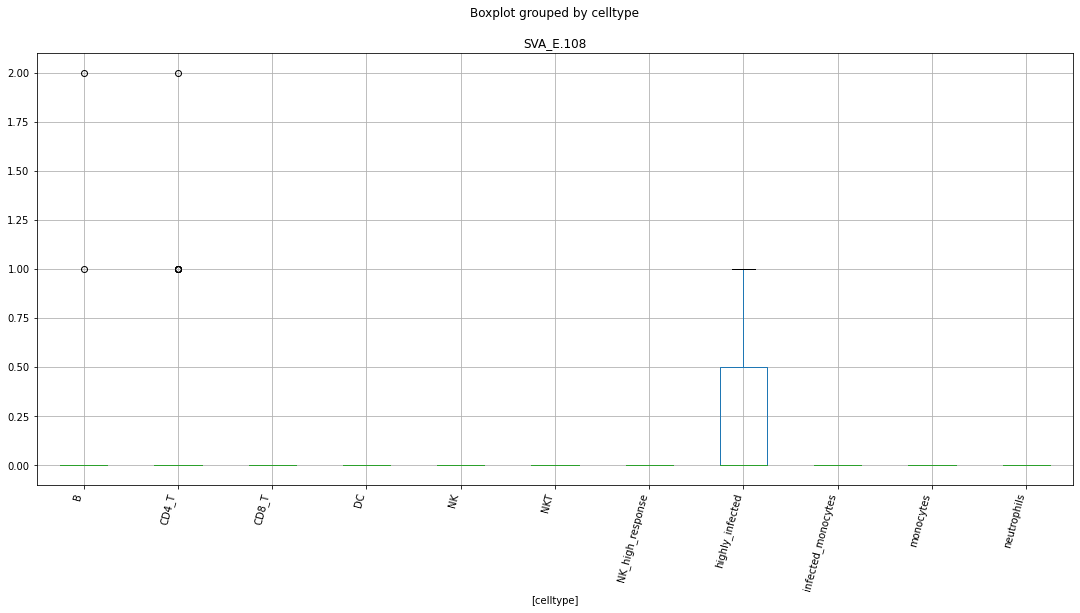

 p : 1.500496511016153e-09  ( t : 6.710557275470378 ) :  SVA_D.627


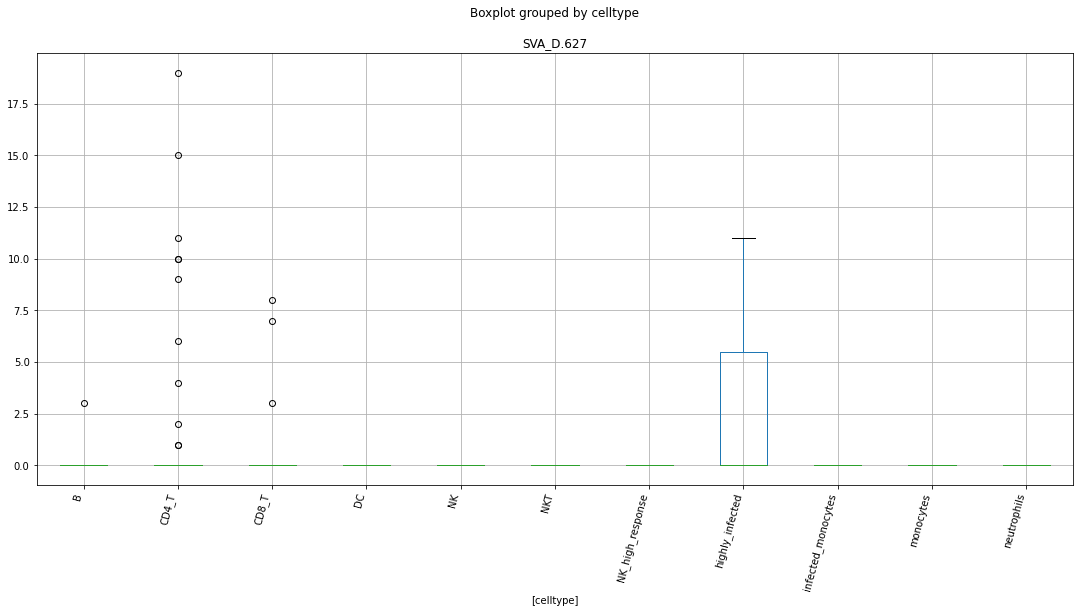

 p : 1.500496511016153e-09  ( t : 6.710557275470378 ) :  SVA_F.705


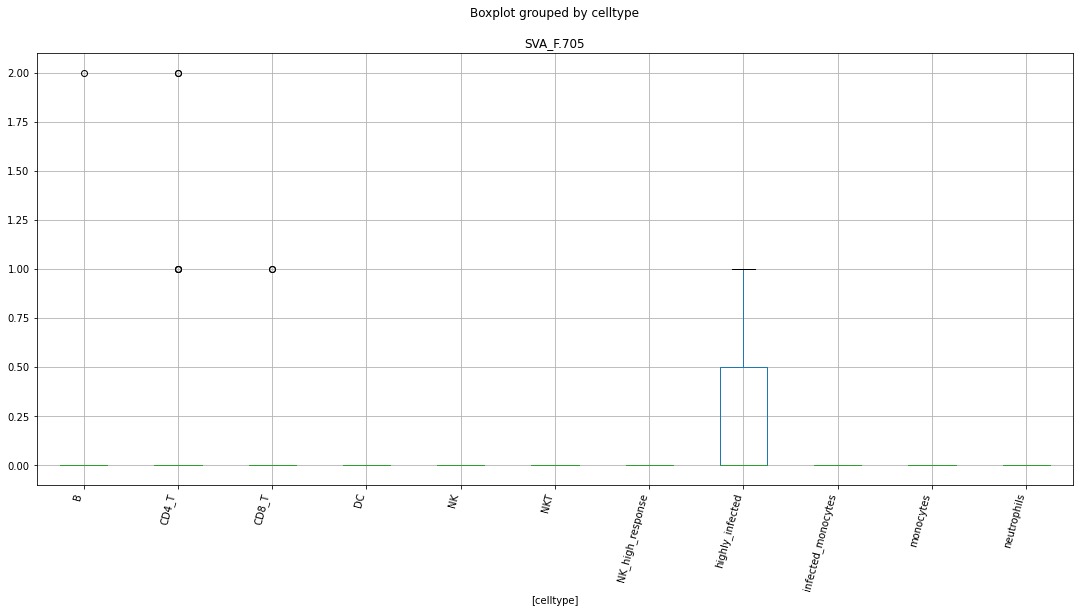

 p : 1.8472905253481786e-09  ( t : 6.673223725727845 ) :  SVA_D.1285


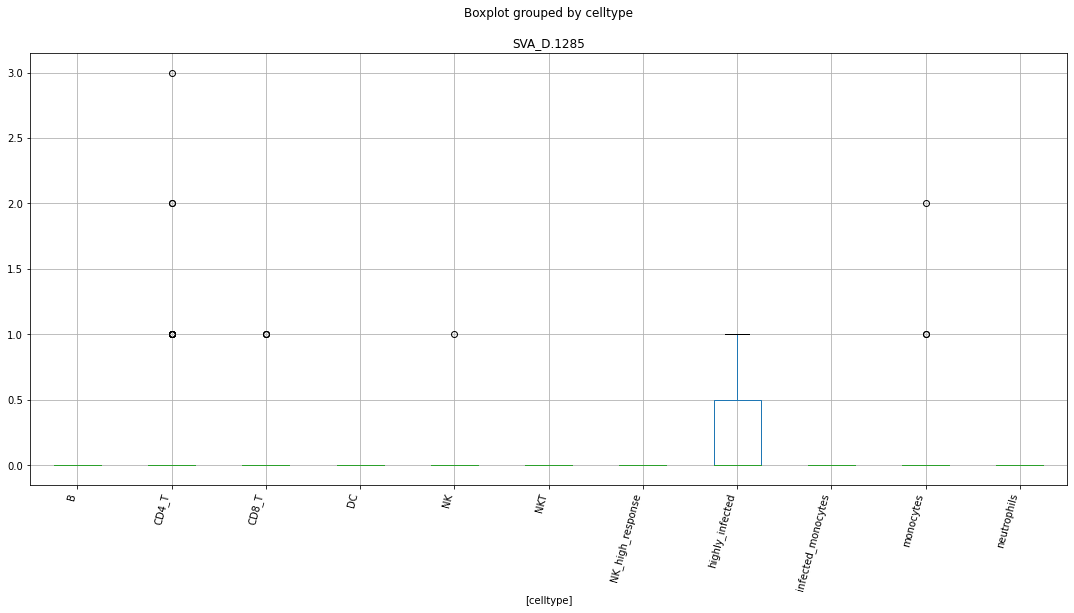

 p : 1.8472905253481786e-09  ( t : 6.673223725727845 ) :  SVA_D.43


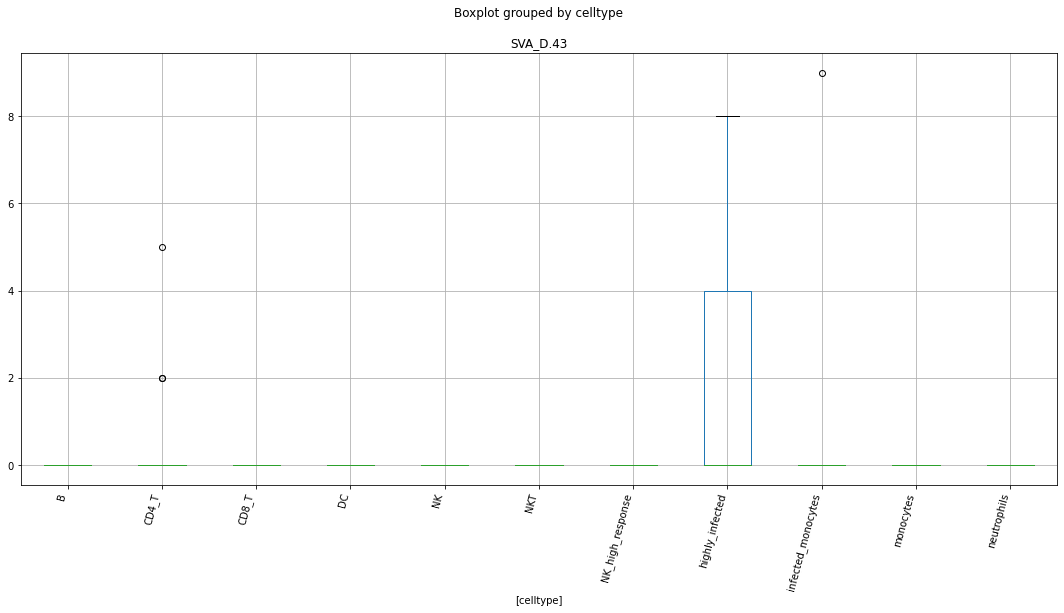

 p : 2.581517926793976e-09  ( t : 6.044935394377607 ) :  SVA_E.230


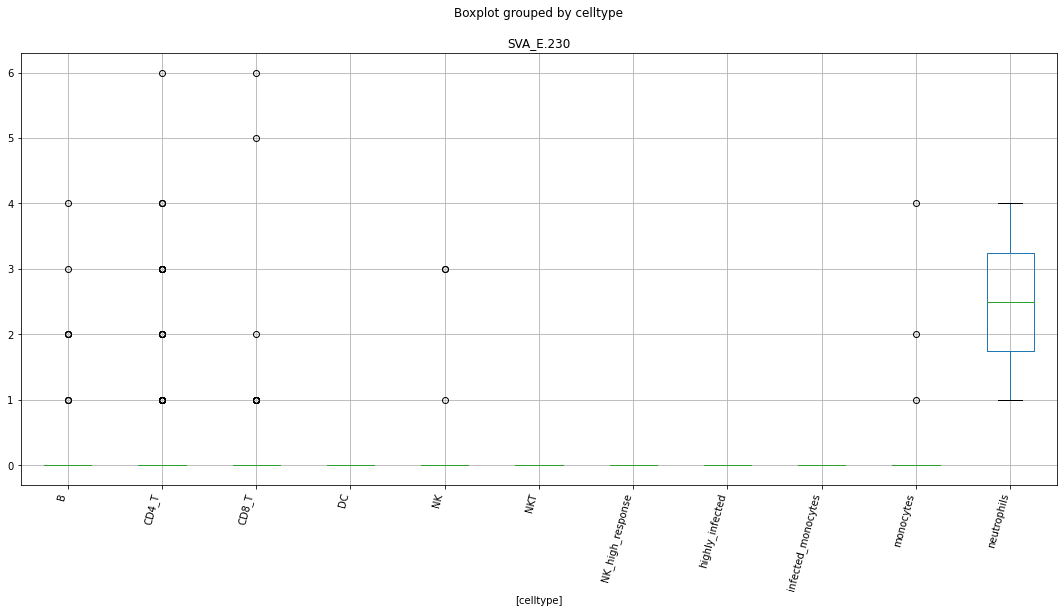

 p : 3.345577198659451e-09  ( t : 6.543479580443681 ) :  SVA_D.851


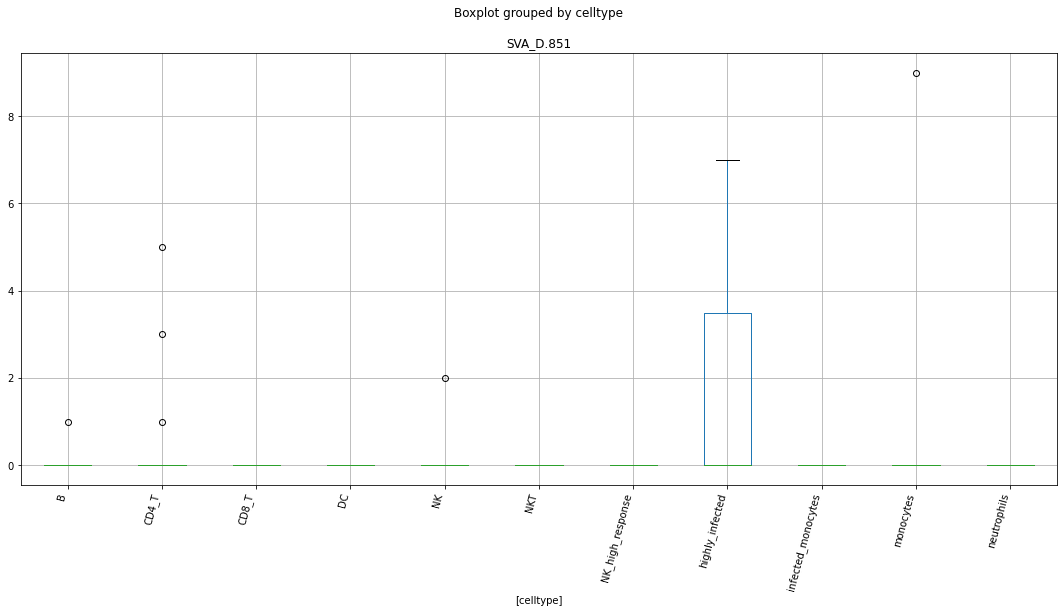

 p : 3.900417937599385e-09  ( t : 6.509825544523009 ) :  SVA_E.230


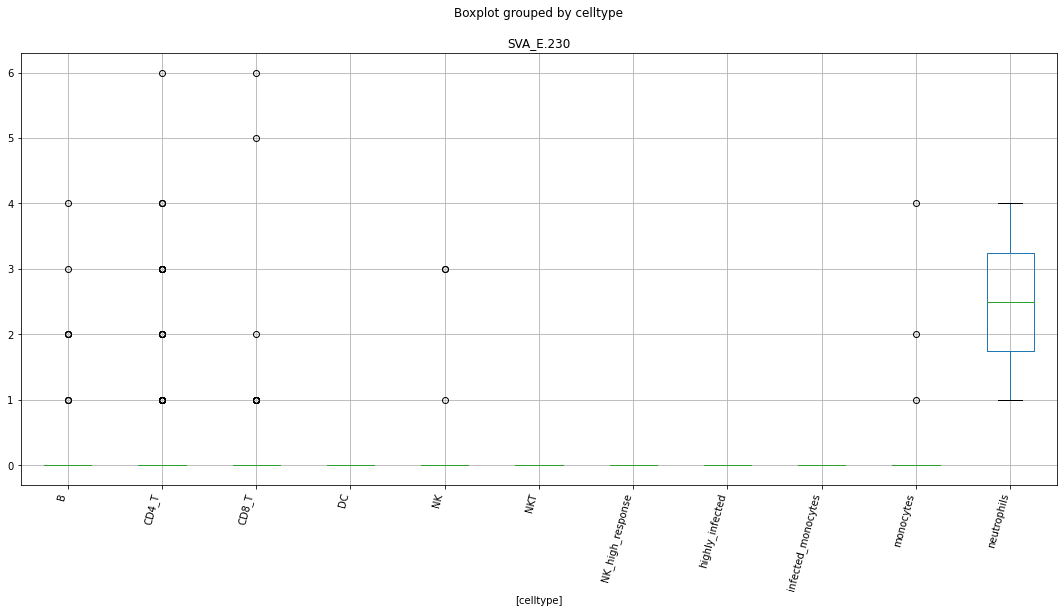

 p : 5.6786756260652055e-09  ( t : 5.907841190505274 ) :  SVA_D.55


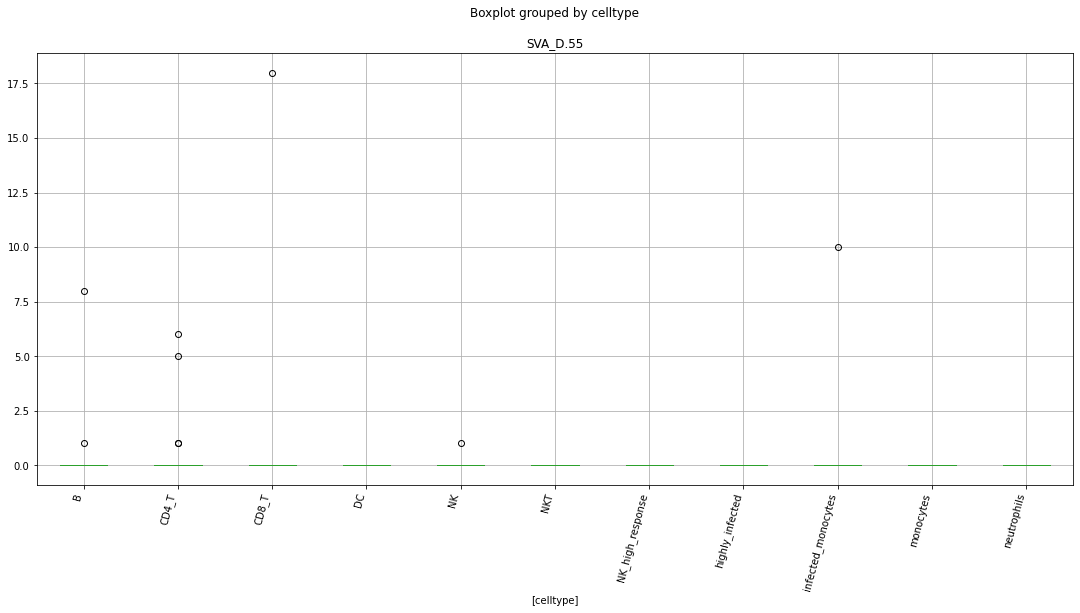

 p : 5.822326701819763e-09  ( t : 5.904559931596795 ) :  SVA_F.370


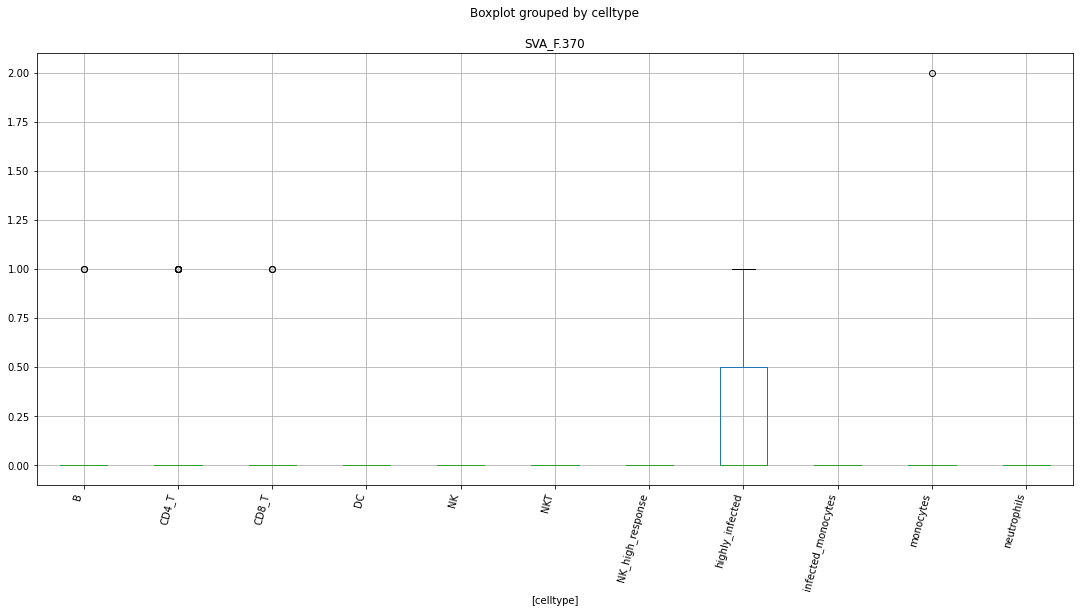

 p : 6.05075711570901e-09  ( t : 5.897989914194446 ) :  SVA_C.259


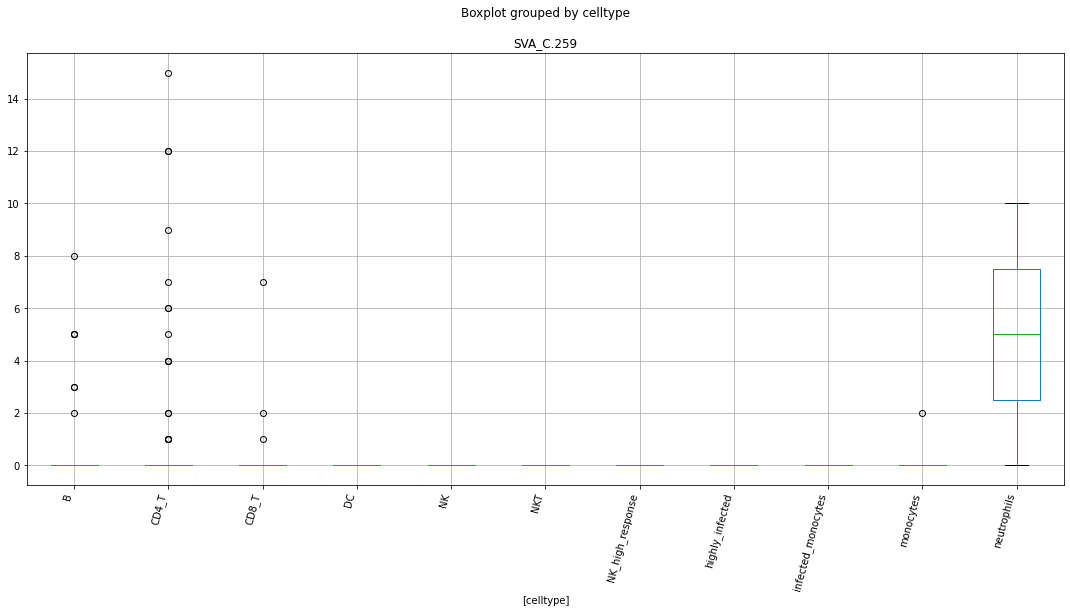

 p : 7.618573390854876e-09  ( t : 6.933752452815364 ) :  SVA_B.163


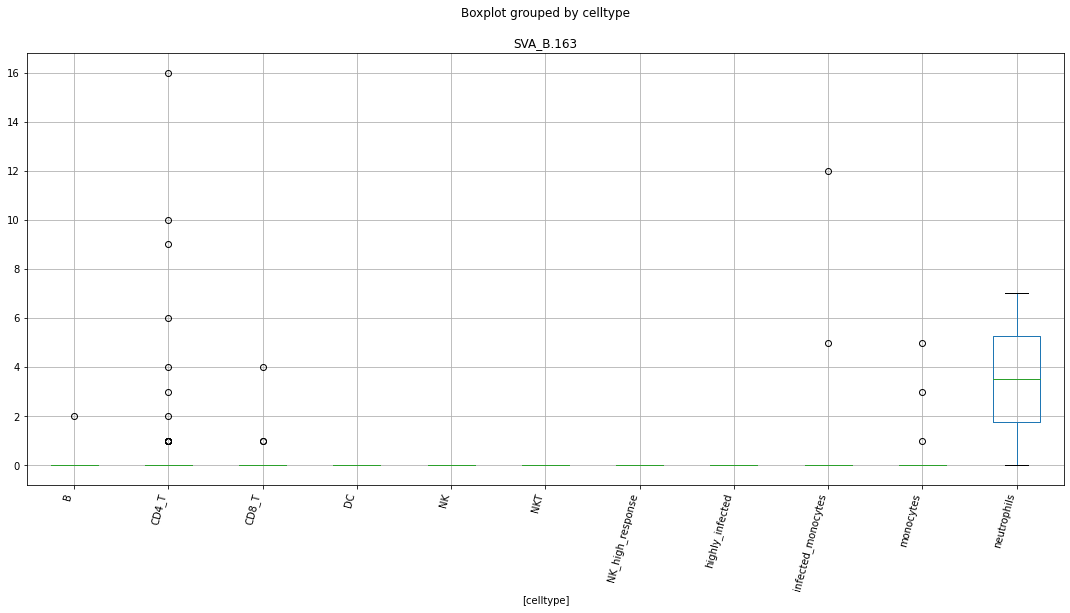

 p : 7.618573390854876e-09  ( t : 6.933752452815364 ) :  SVA_C.147


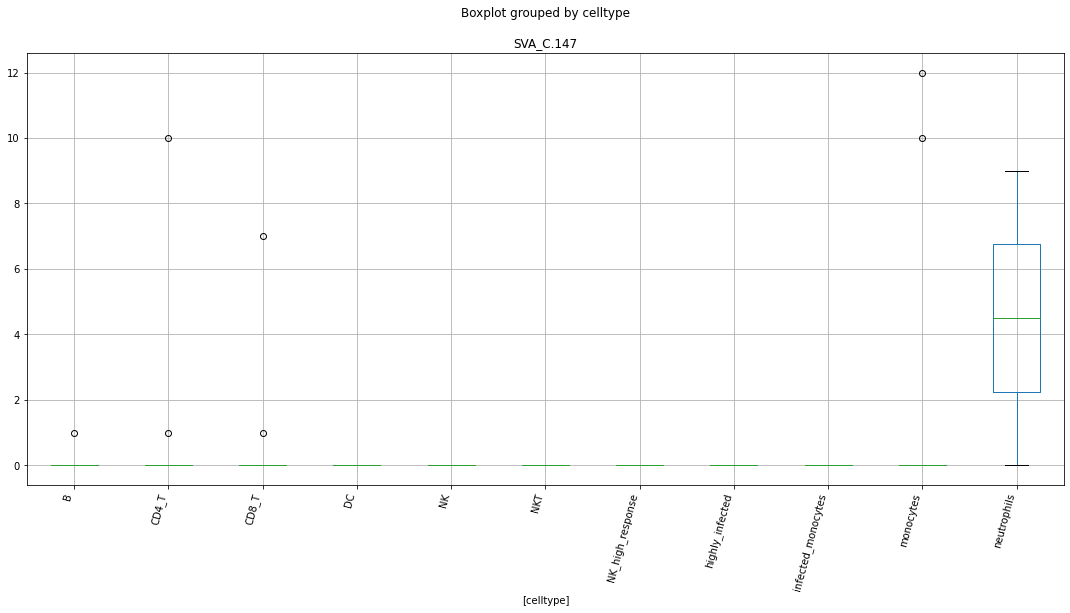

 p : 7.618573390854931e-09  ( t : 6.933752452815363 ) :  SVA_B.8


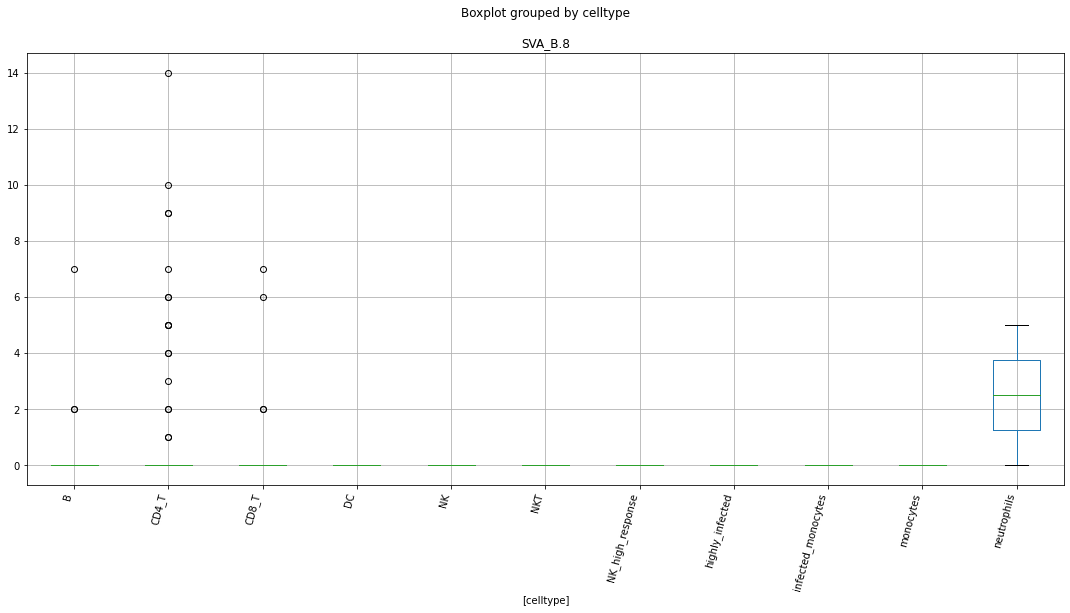

 p : 7.618573390854931e-09  ( t : 6.933752452815363 ) :  SVA_C.148


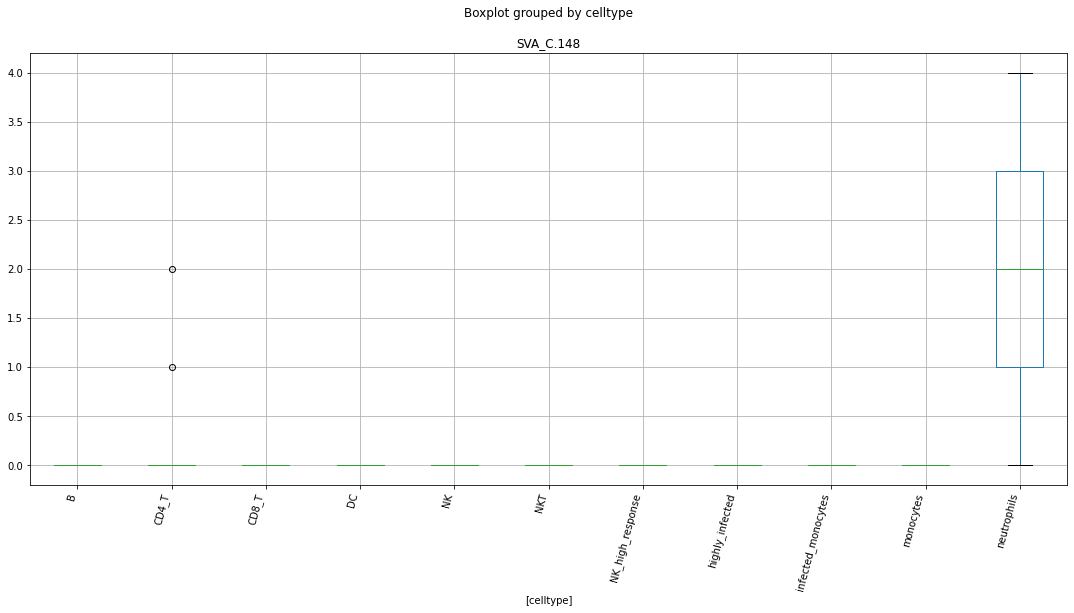

 p : 7.618573390854931e-09  ( t : 6.933752452815363 ) :  SVA_C.259


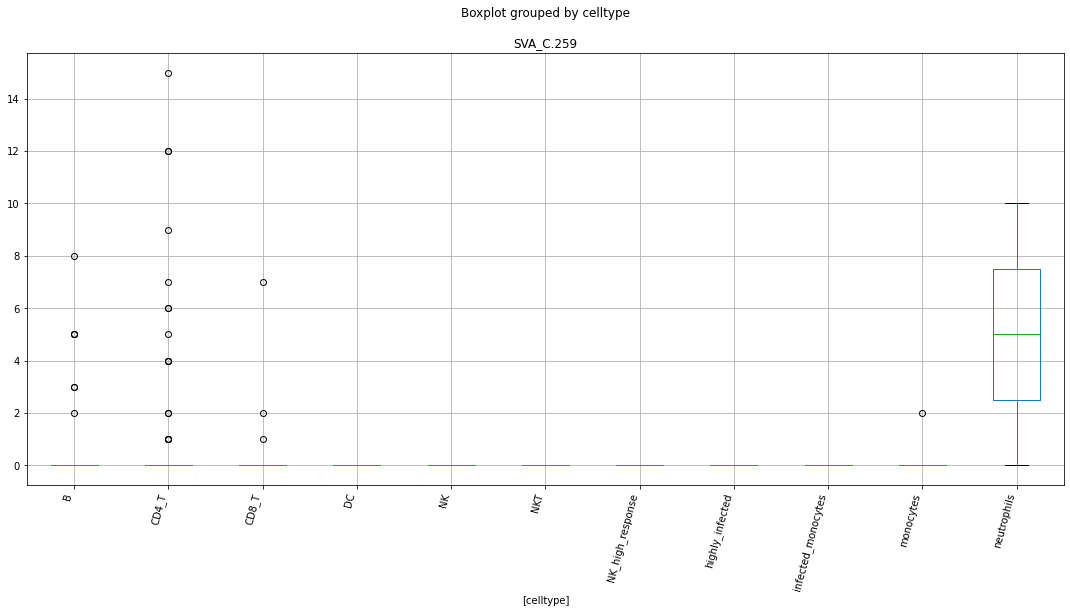

 p : 1.0490797447689776e-08  ( t : 5.79130100039223 ) :  SVA_D.210


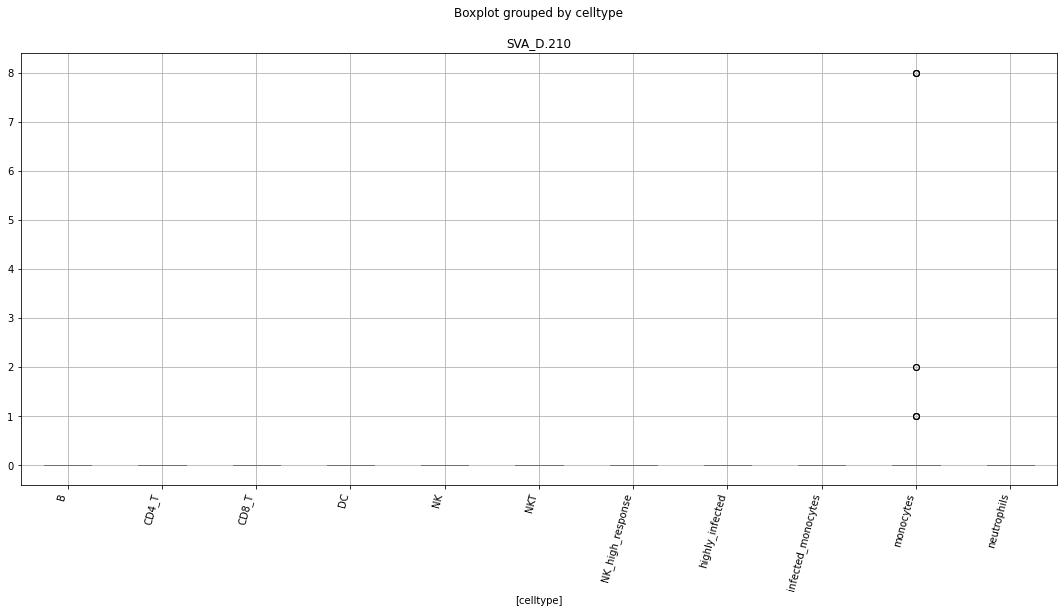

 p : 1.1242561844791272e-08  ( t : 6.276022118102041 ) :  SVA_D.627


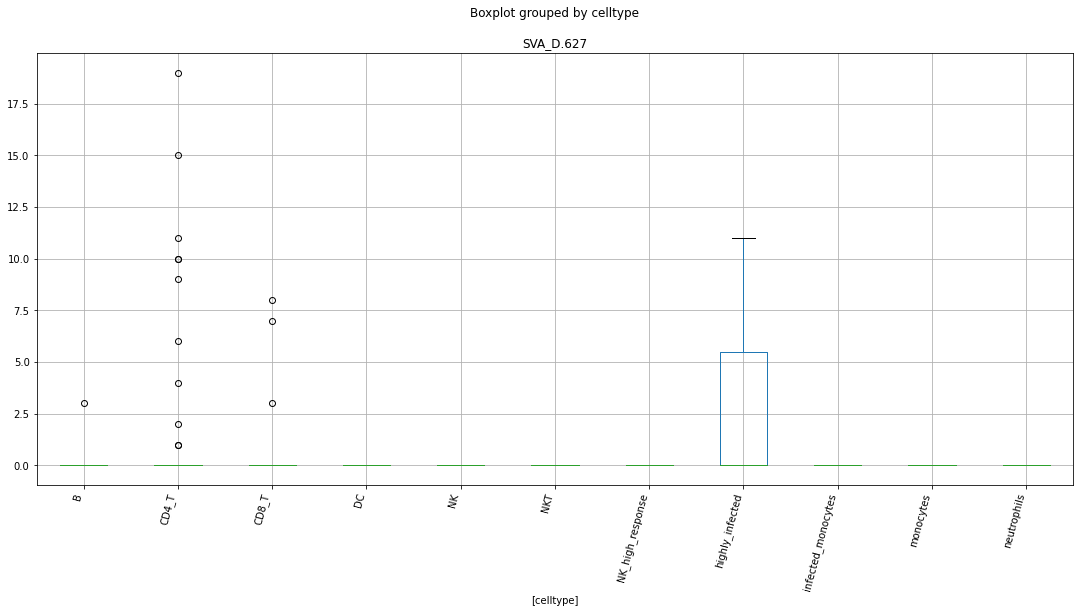

 p : 2.981468977218981e-08  ( t : 5.79479646878553 ) :  SVA_A.144


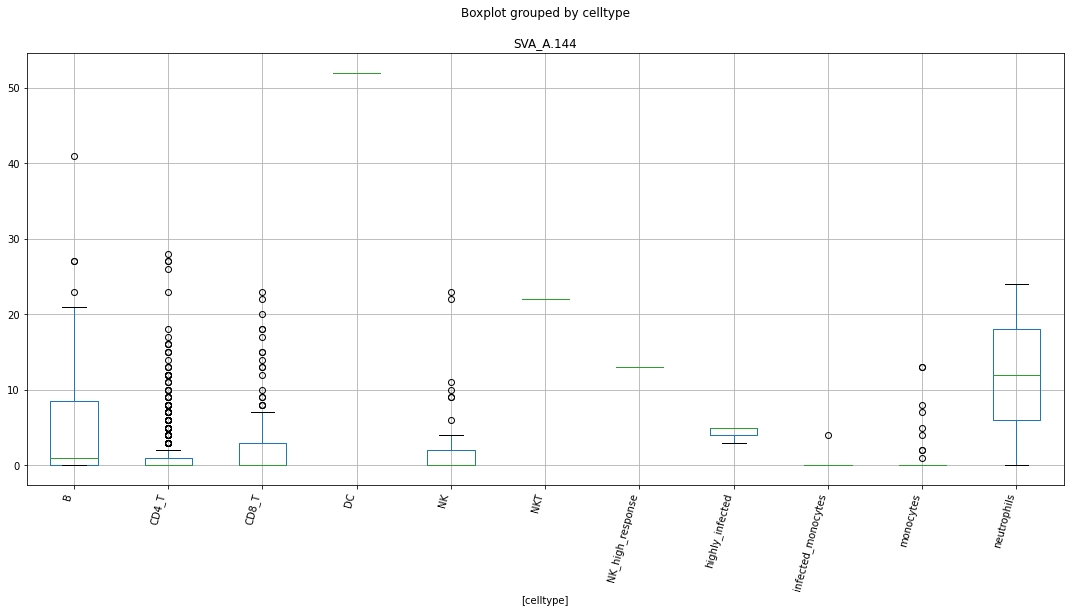

 p : 3.174272908050201e-08  ( t : 5.601771437754787 ) :  SVA_A.169


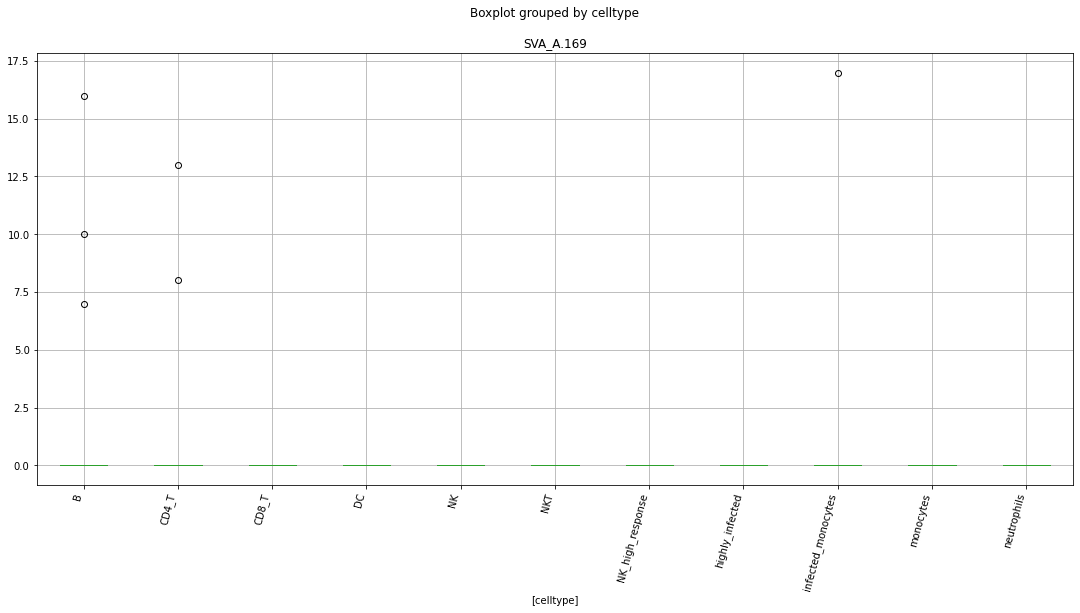

 p : 3.234507019470409e-08  ( t : 5.884963700726455 ) :  SVA_E.179


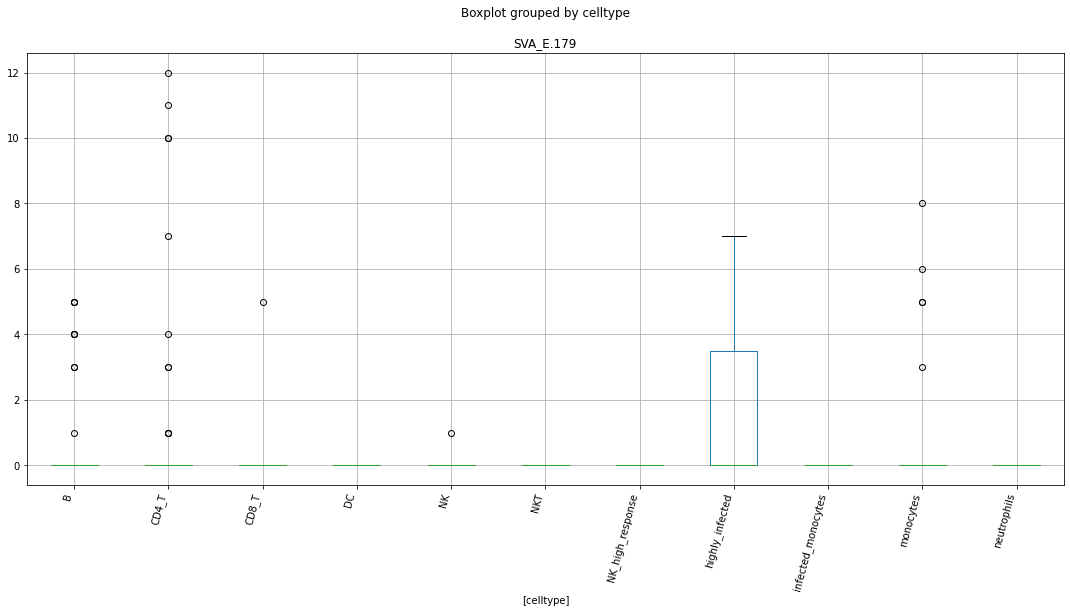

 p : 3.920350187118433e-08  ( t : 6.479035391627519 ) :  SVA_F.325


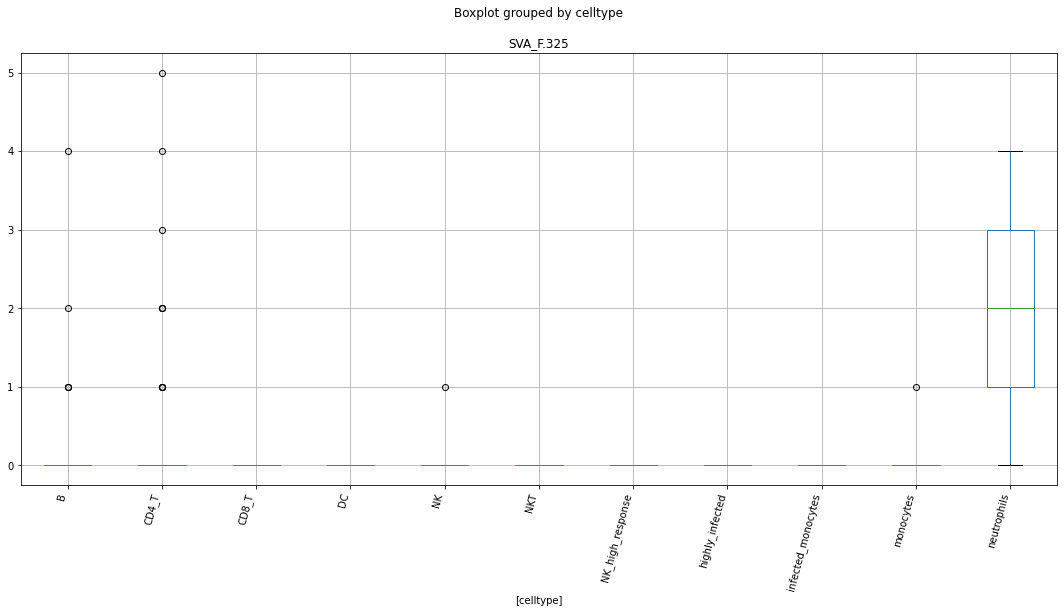

 p : 4.5347507371497945e-08  ( t : 5.96312773121359 ) :  SVA_B.163


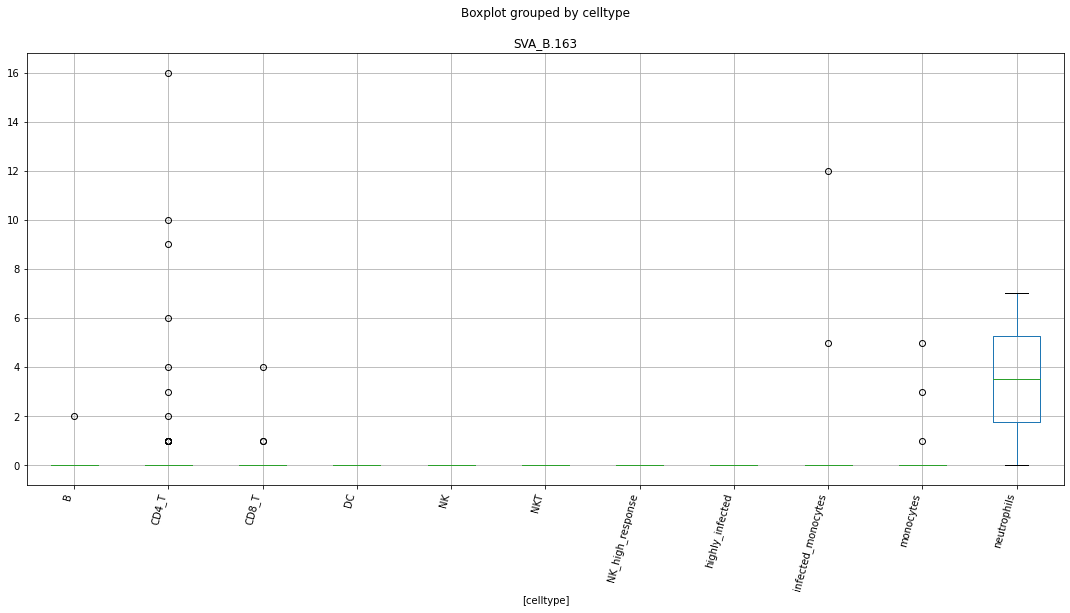

 p : 7.03307384109842e-08  ( t : 5.863362166750081 ) :  SVA_E.59


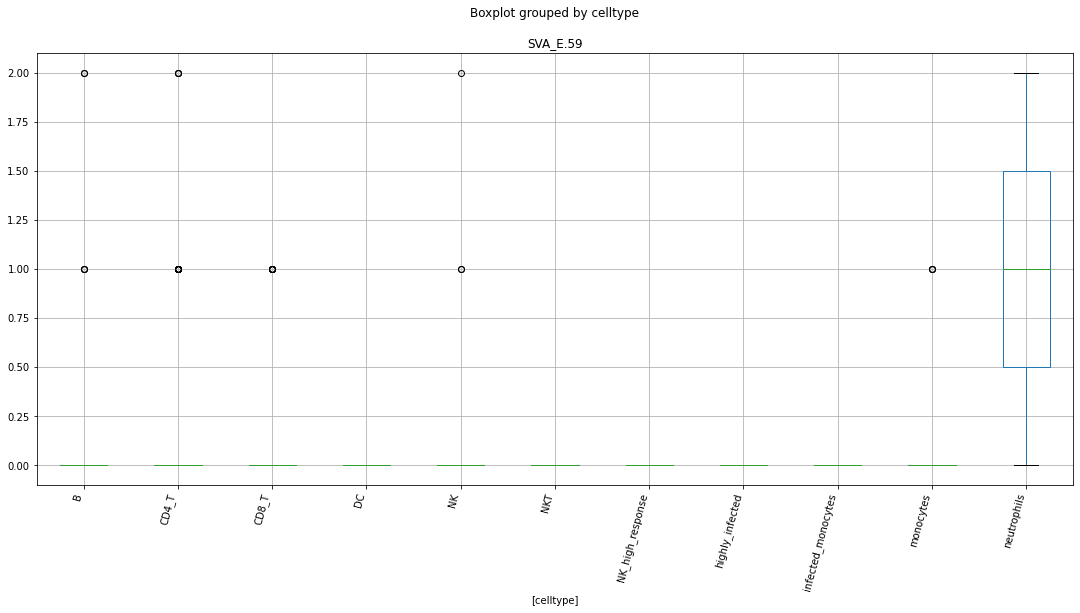

 p : 9.511828078359685e-08  ( t : 5.399772082641803 ) :  SVA_D.1344


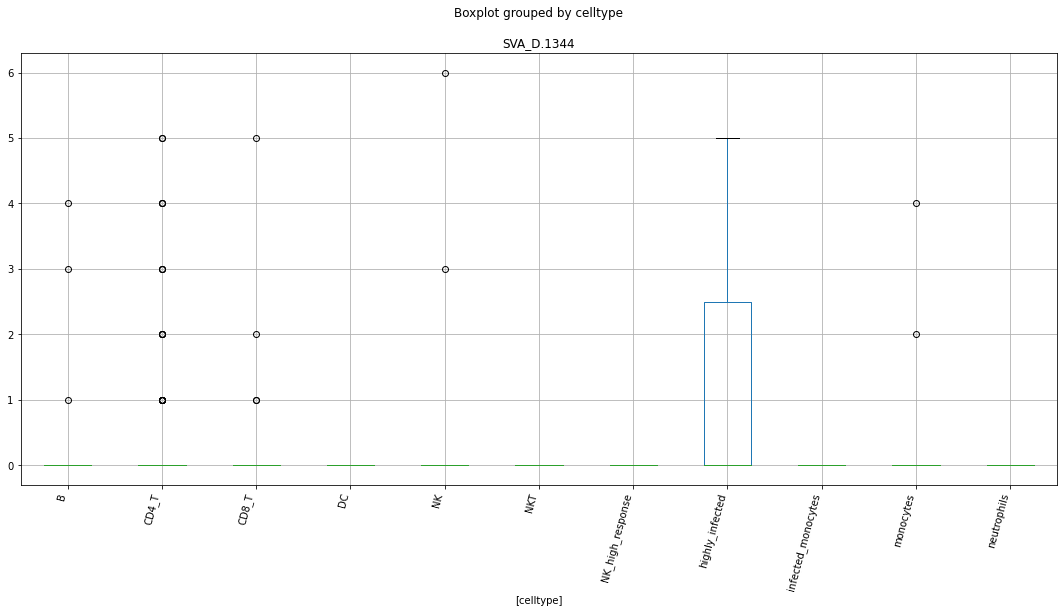

 p : 9.746819556648807e-08  ( t : 5.78346713795153 ) :  SVA_D.166


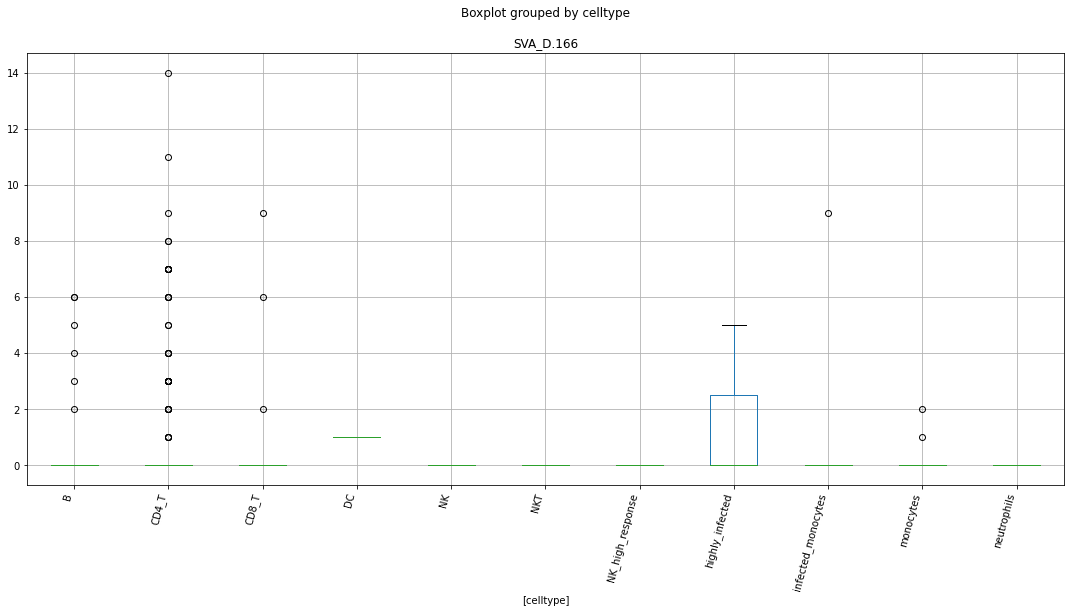

 p : 1.1534446331428574e-07  ( t : 5.614777099038615 ) :  SVA_D.561


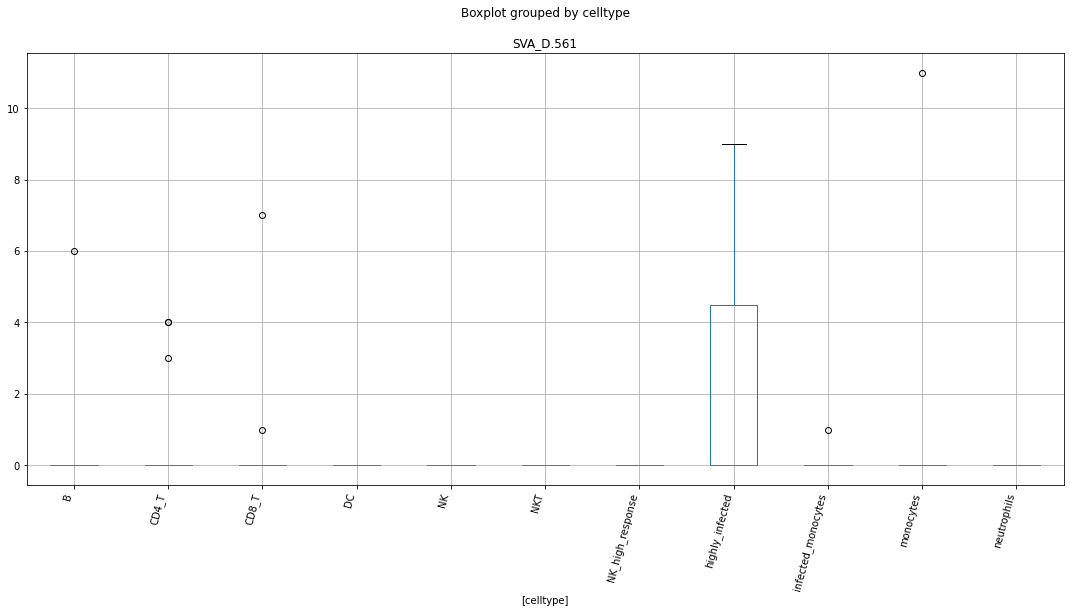

 p : 1.3635358304631155e-07  ( t : 5.330966812752361 ) :  SVA_C.277


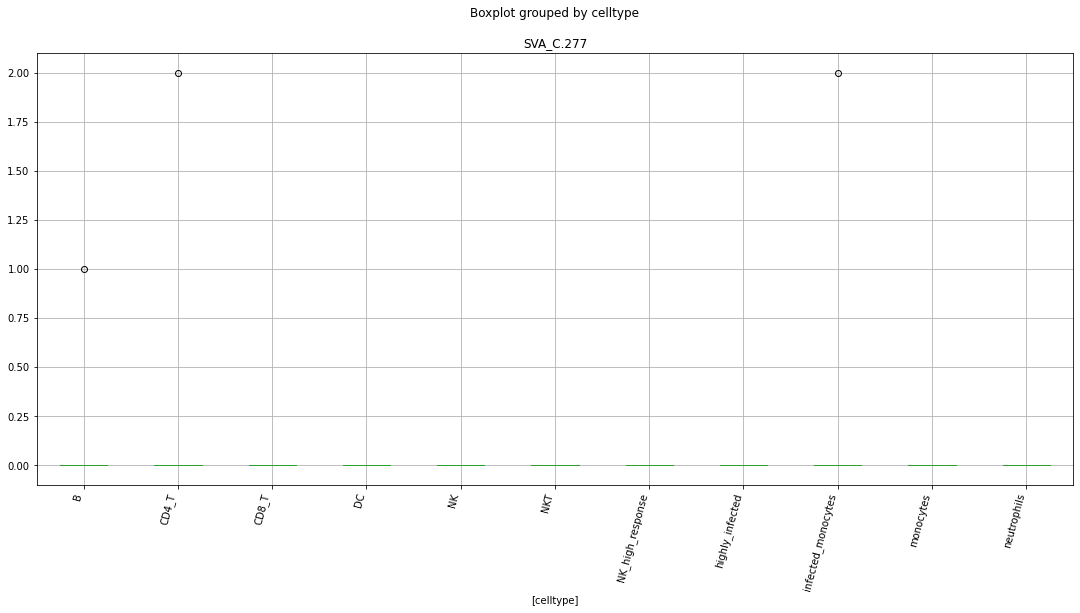

 p : 1.731330269410927e-07  ( t : 5.285474975564588 ) :  SVA_C.96


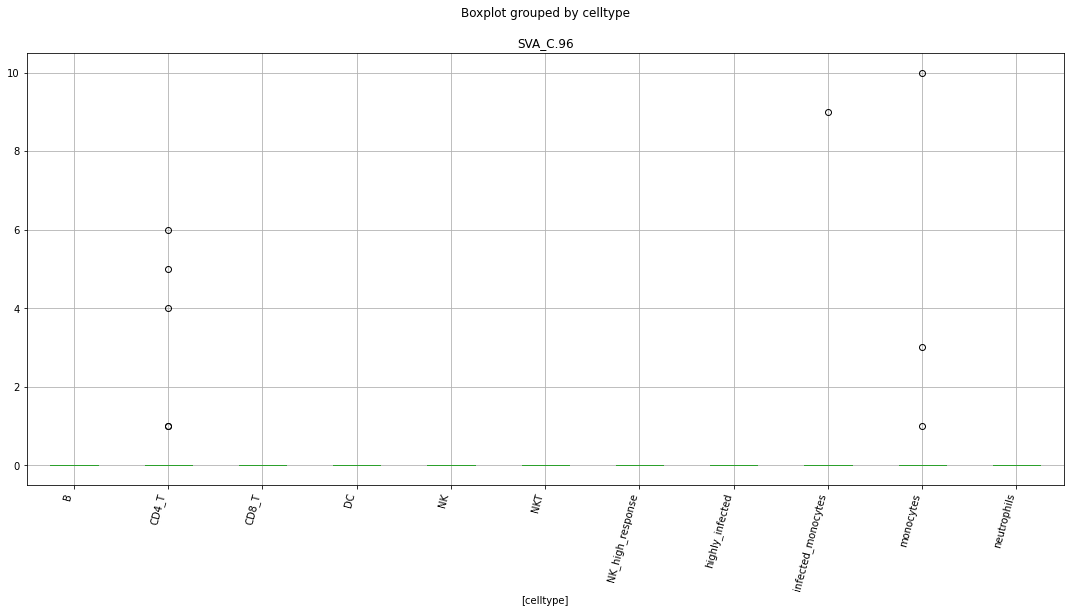

 p : 2.1792114356230888e-07  ( t : 5.241328846550264 ) :  SVA_E.143


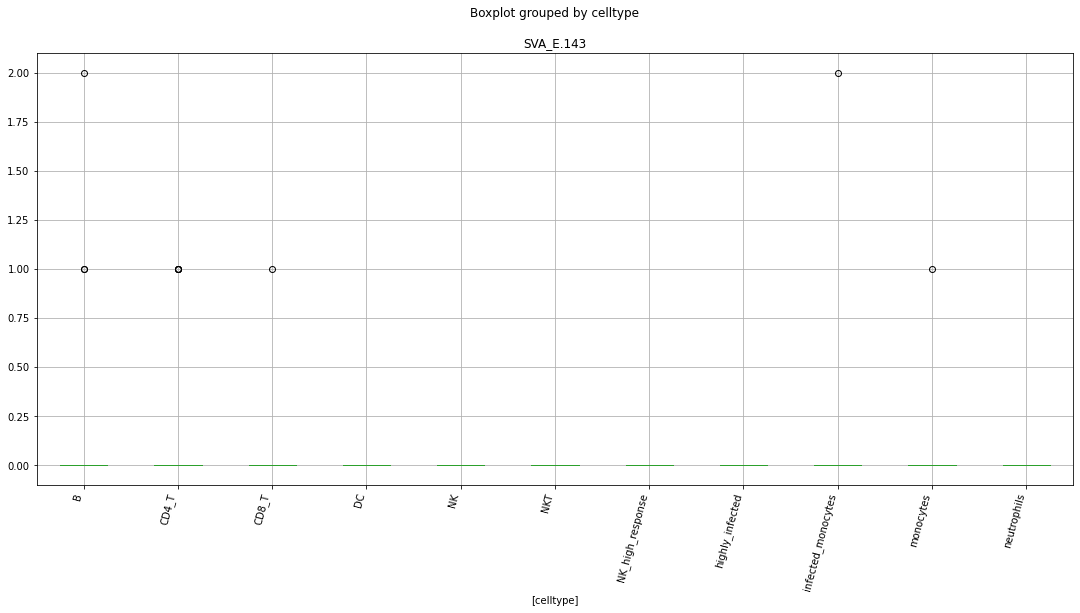

 p : 2.533415475465013e-07  ( t : 5.213094187721364 ) :  SVA_B.163


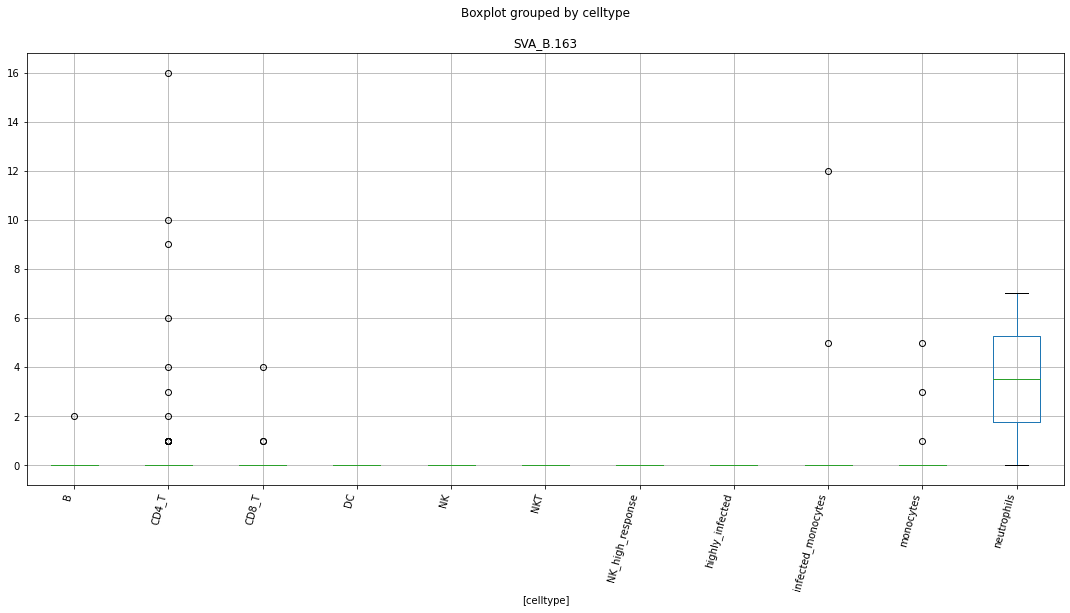

 p : 2.569875216004422e-07  ( t : 5.564566300010355 ) :  SVA_A.144


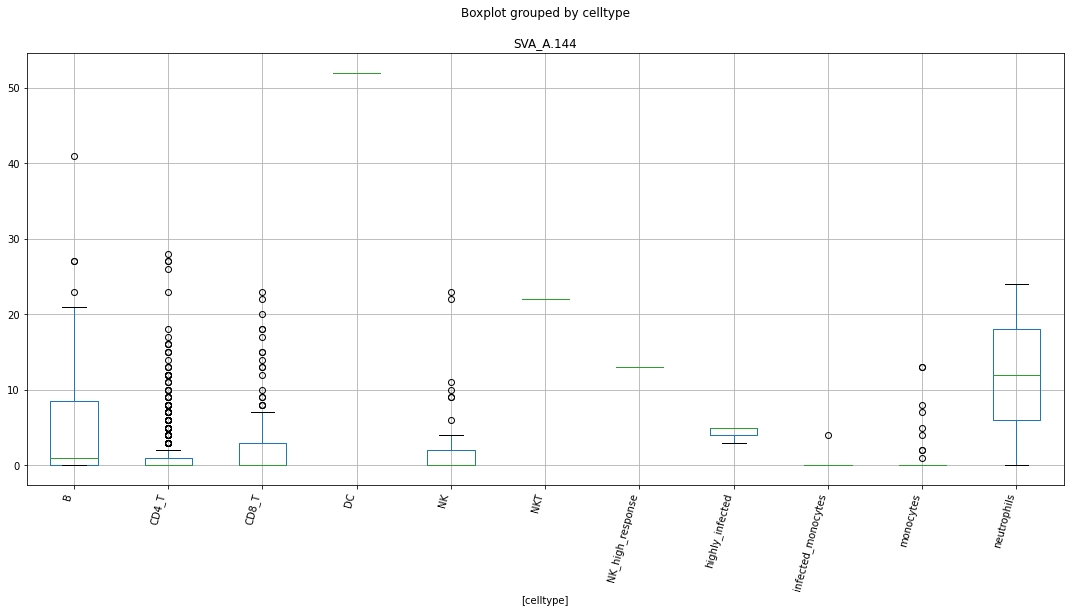

 p : 4.5637090490978057e-07  ( t : 5.091141547006399 ) :  SVA_D.918


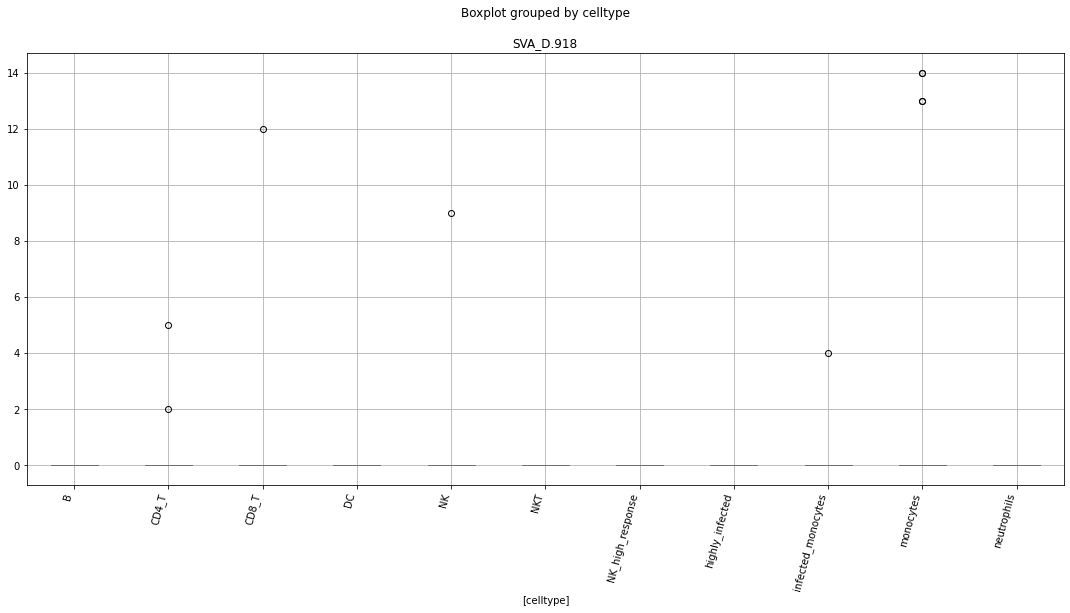

 p : 6.036122181863138e-07  ( t : 5.042649800903332 ) :  SVA_F.108


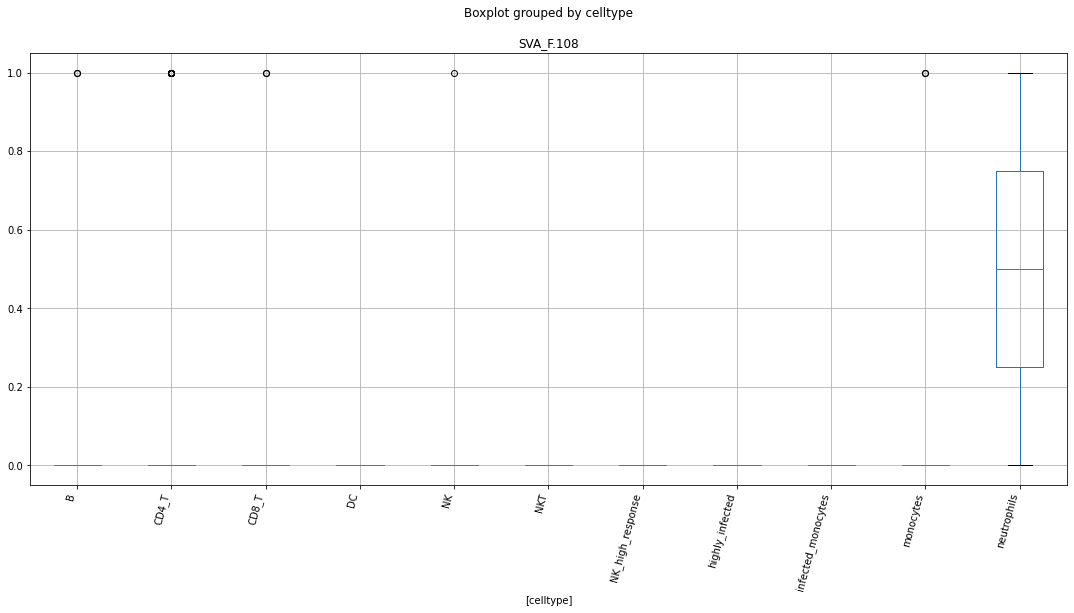

 p : 1.129111457456243e-06  ( t : 5.112648324023317 ) :  SVA_E.59


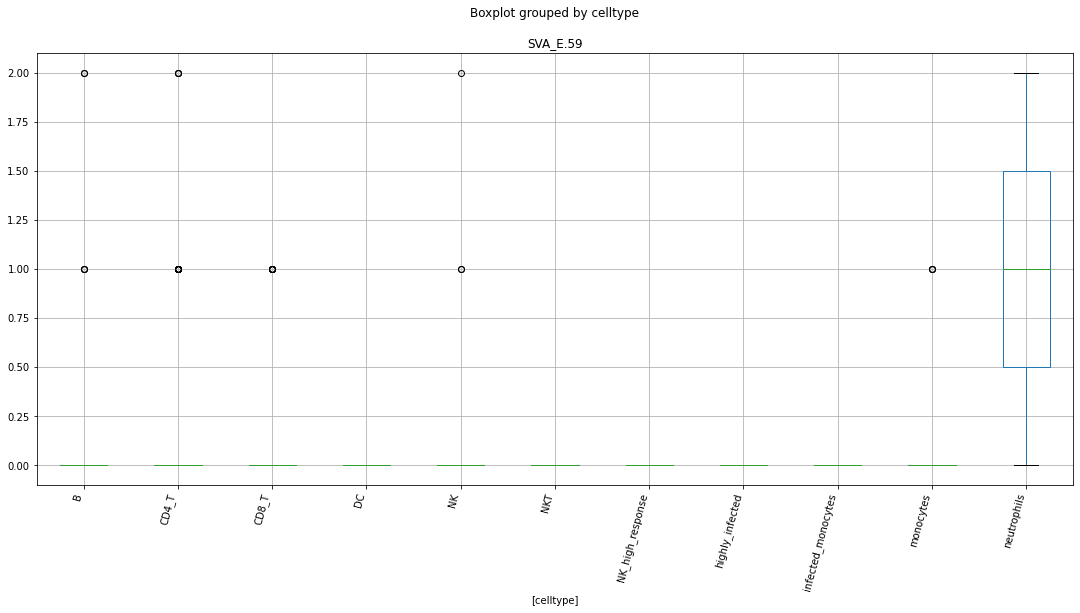

 p : 1.1326356070372848e-06  ( t : 4.915241886573429 ) :  SVA_A.164


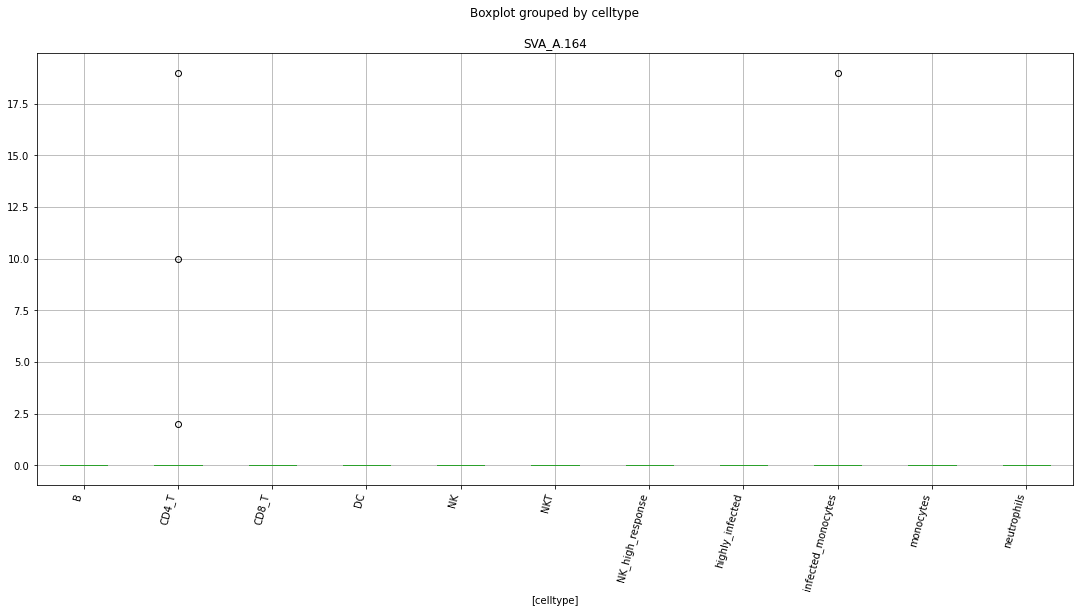

 p : 1.2599727845867755e-06  ( t : 5.191891896325687 ) :  SVA_D.986


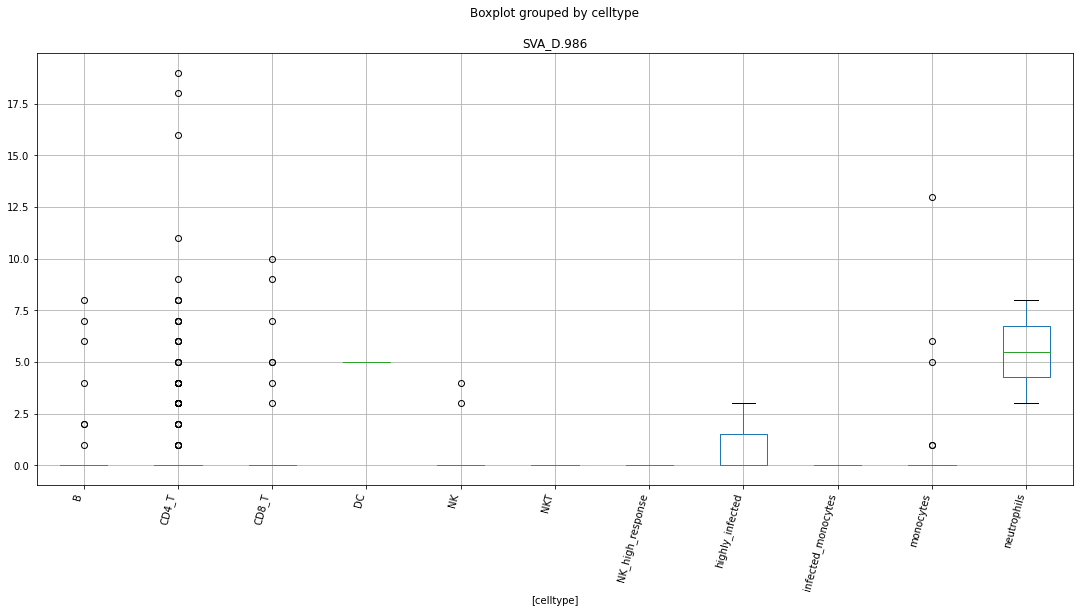

 p : 1.6765527916468025e-06  ( t : 4.834887778575906 ) :  SVA_F.241


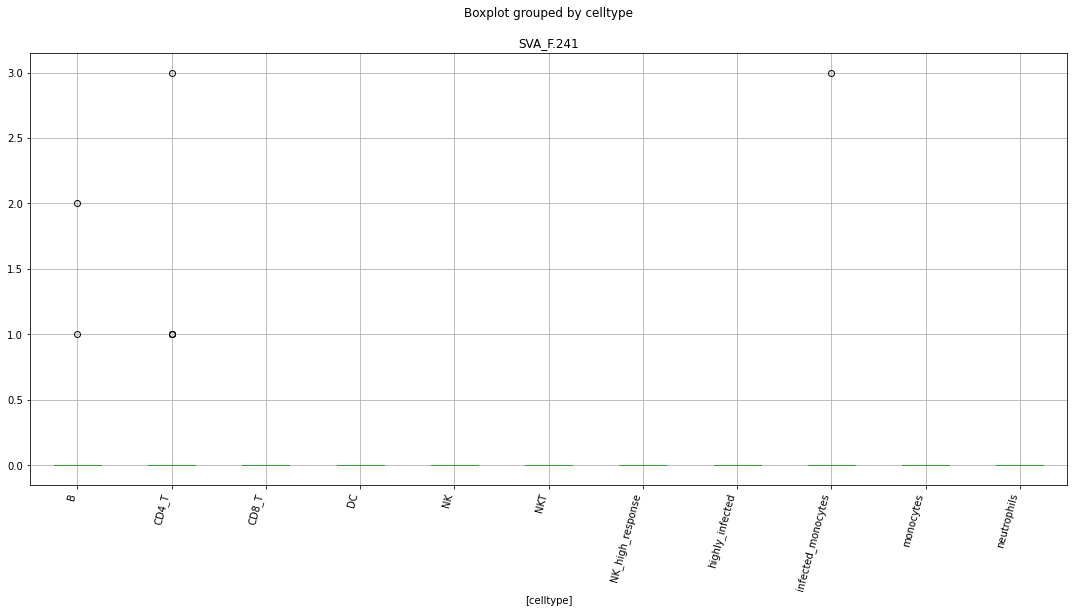

 p : 2.078666264943212e-06  ( t : 5.066598871320761 ) :  SVA_D.561


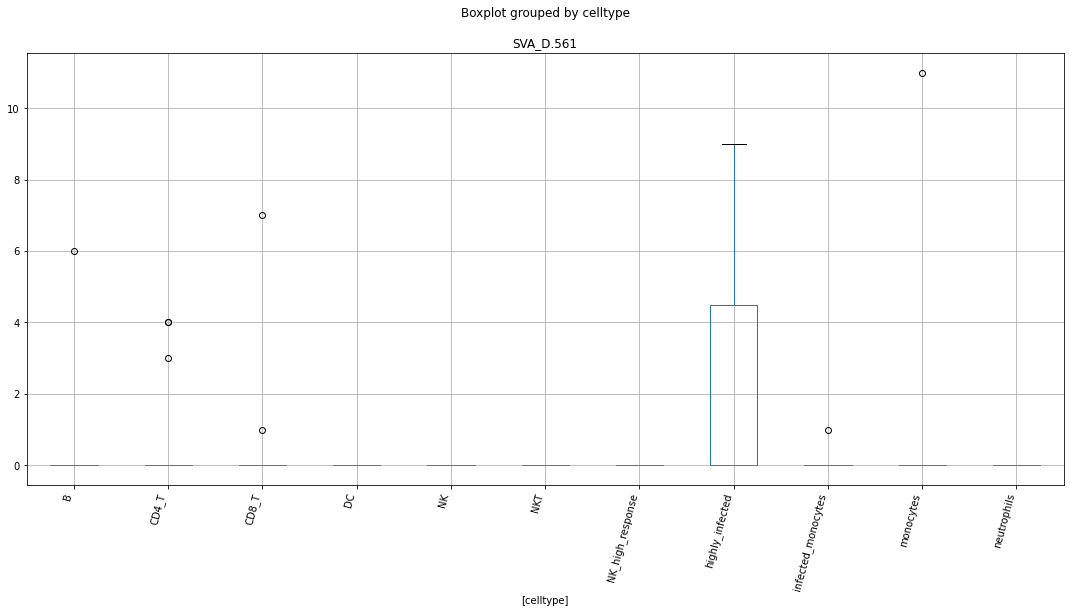

 p : 2.6474002809493194e-06  ( t : 4.914728190800544 ) :  SVA_F.474


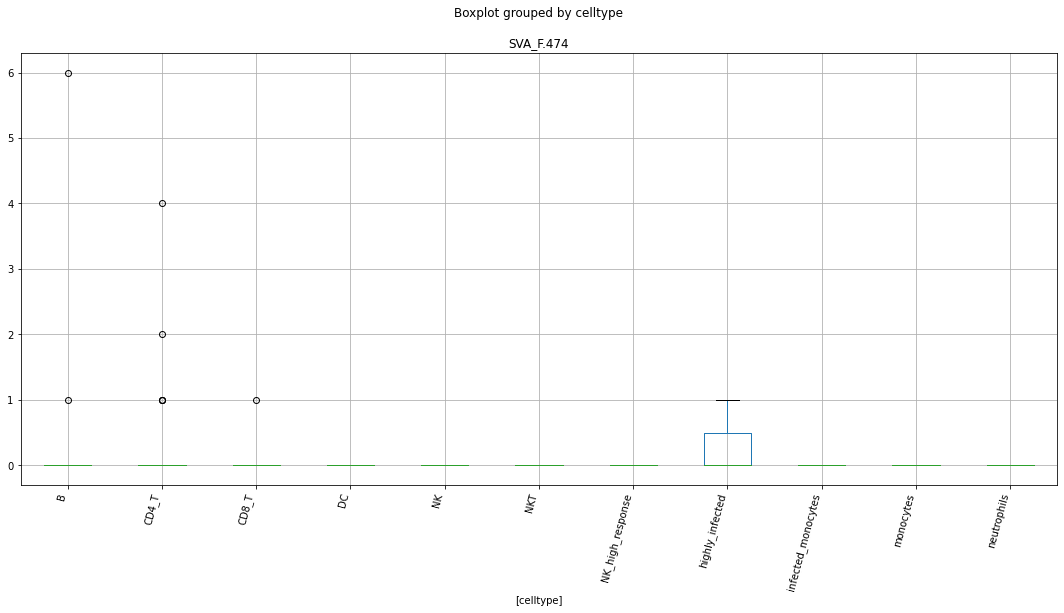

 p : 2.6474002809493194e-06  ( t : 4.914728190800544 ) :  SVA_F.191


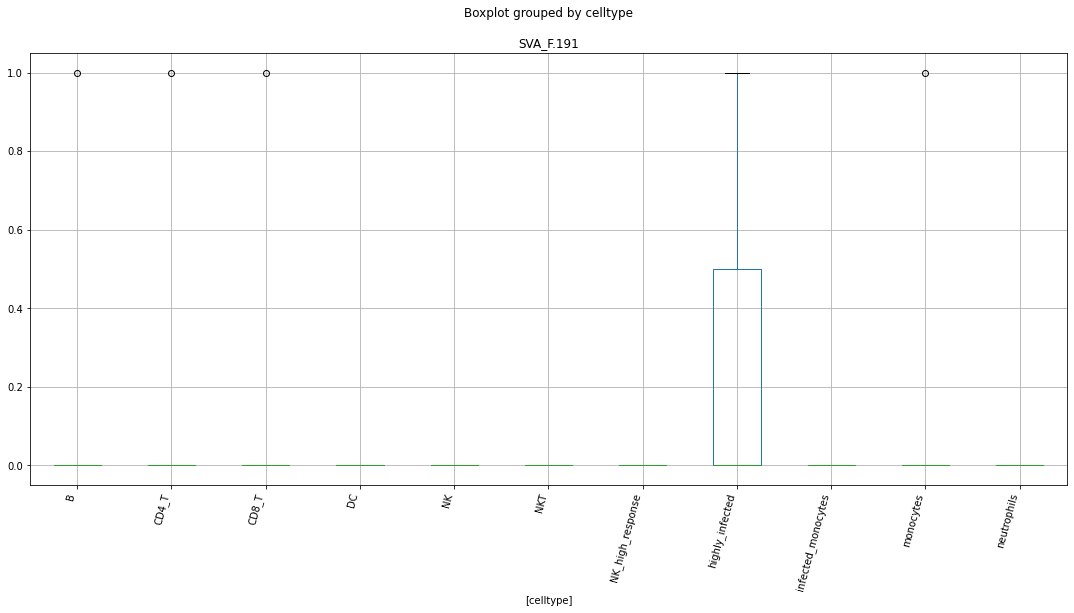

 p : 2.910917395551189e-06  ( t : 4.894366135025109 ) :  SVA_F.108


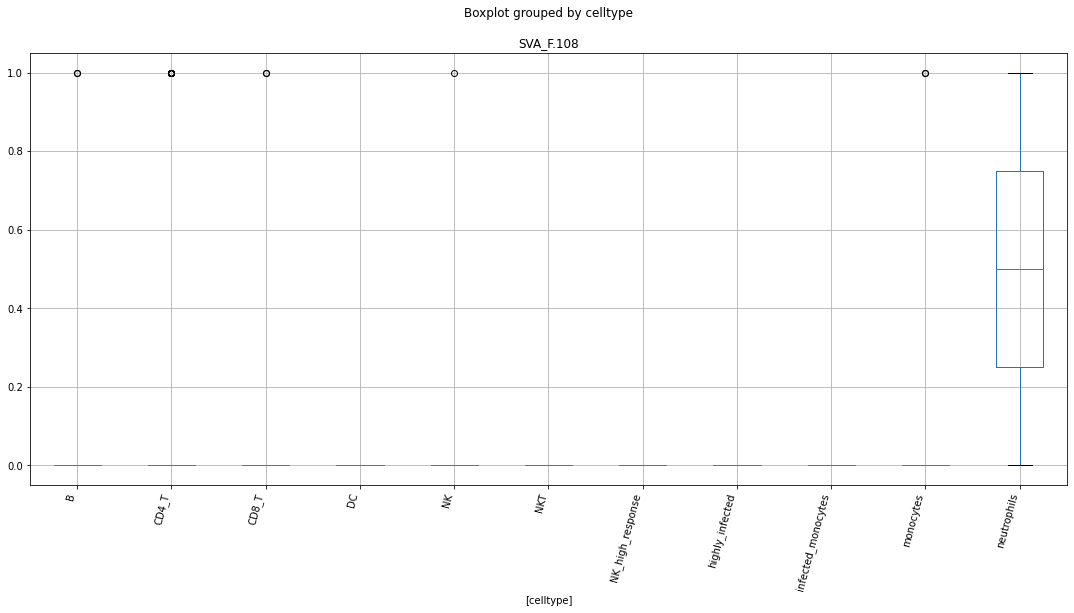

 p : 3.000194237838941e-06  ( t : 4.7135018360482235 ) :  SVA_B.163


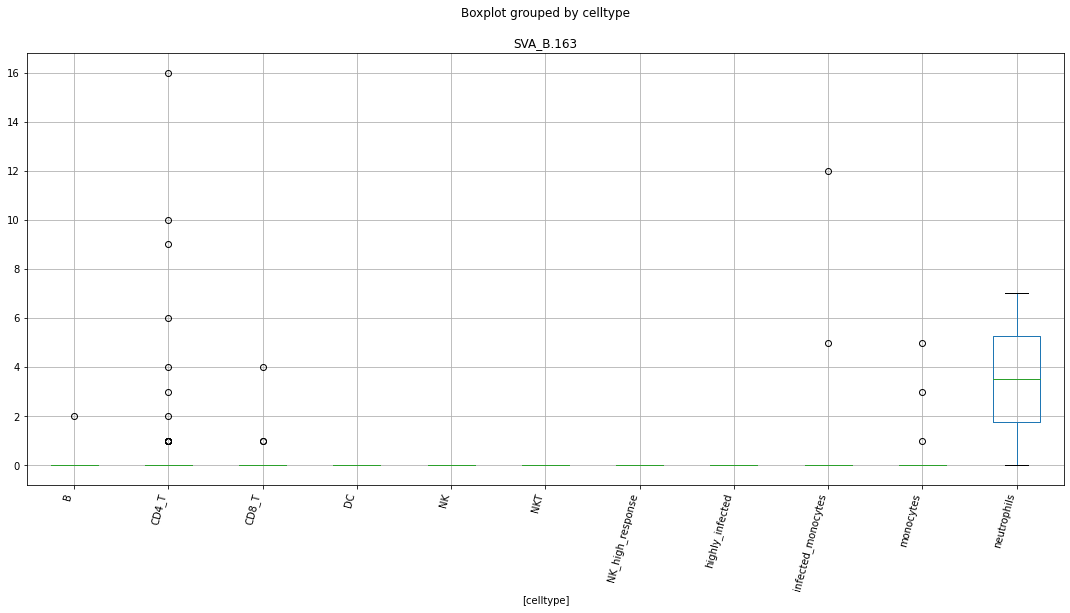

 p : 3.235002276915238e-06  ( t : 4.695100806500054 ) :  SVA_D.722


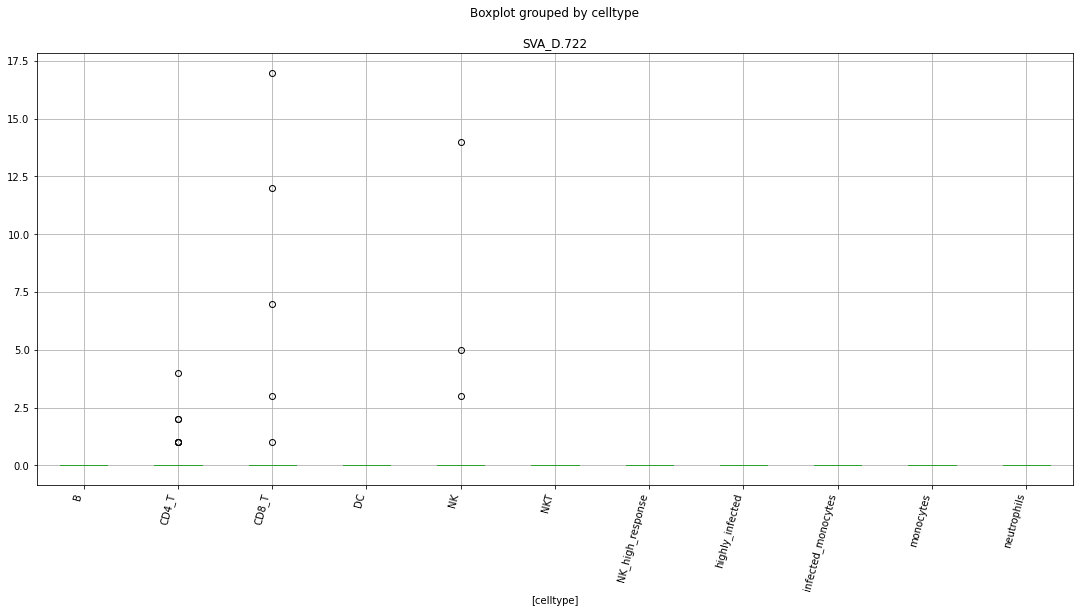

 p : 3.5411318194515323e-06  ( t : 4.84674626868008 ) :  SVA_D.627


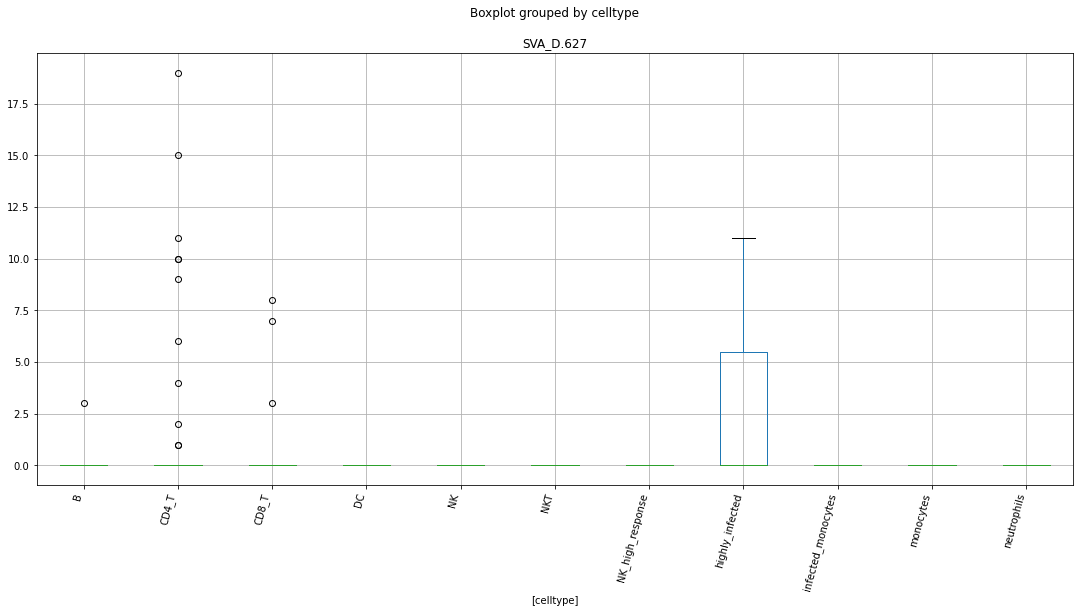

 p : 3.786721233785904e-06  ( t : 4.6641805312216515 ) :  SVA_D.269


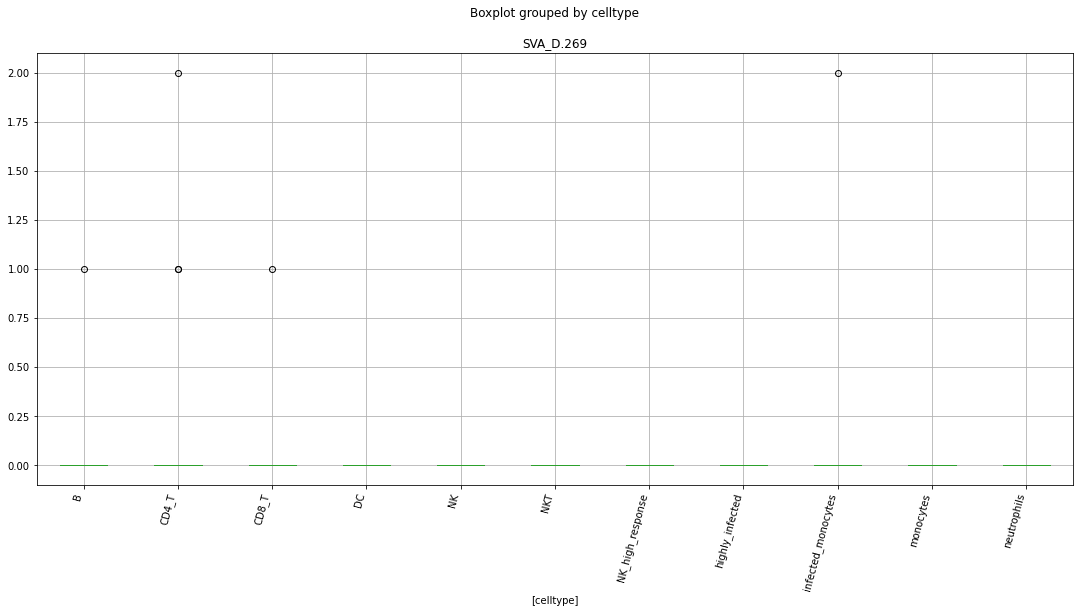

 p : 6.360364509326082e-06  ( t : 4.709602770003013 ) :  SVA_D.986


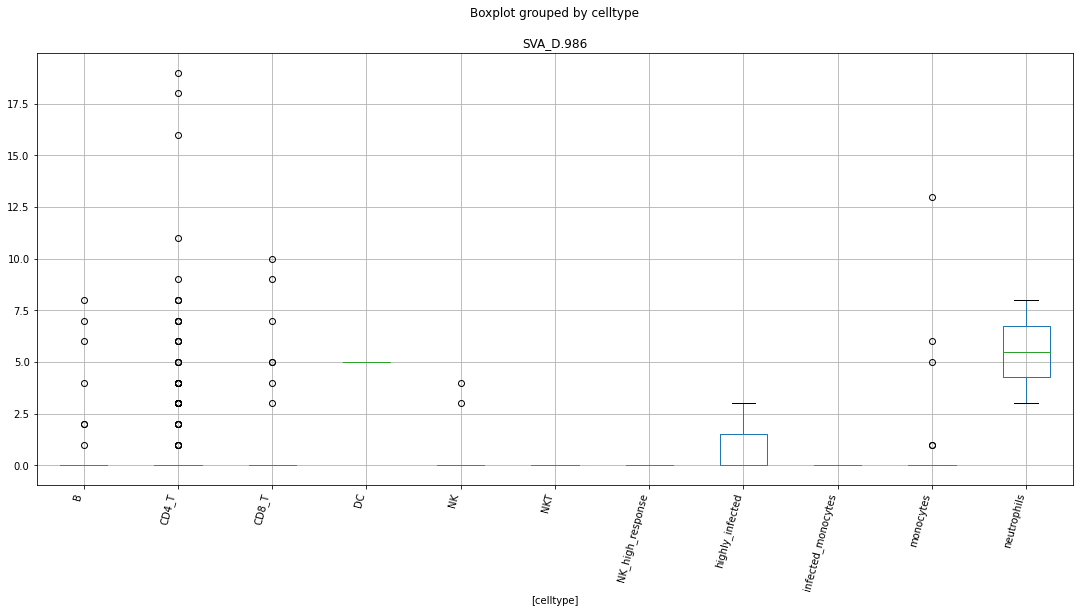

 p : 6.549382442264485e-06  ( t : 4.546814987286032 ) :  SVA_D.627


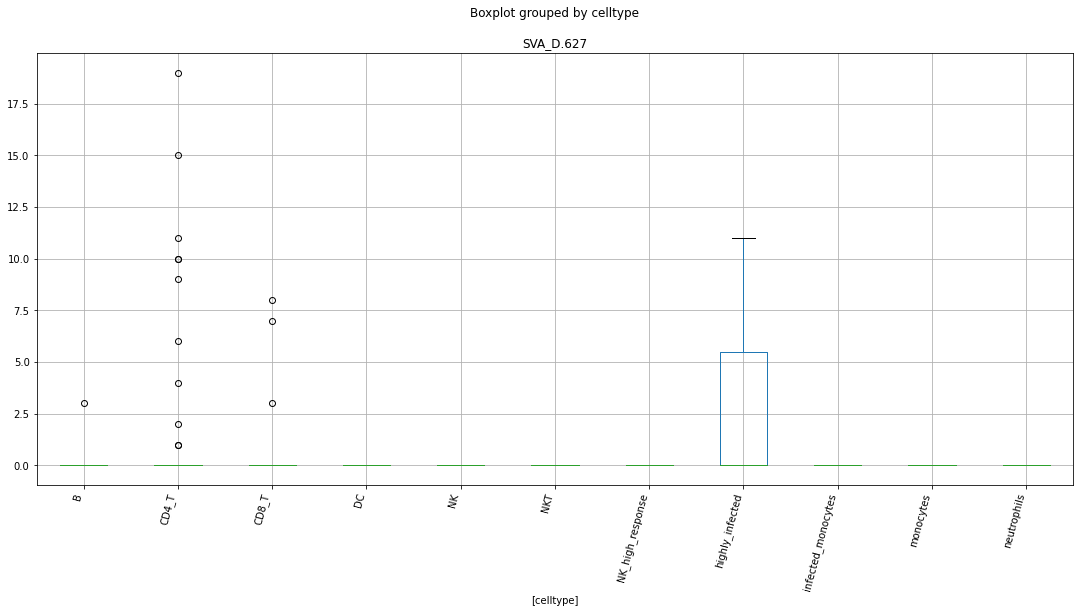

 p : 8.593384619297791e-06  ( t : 4.482643864786858 ) :  SVA_C.200


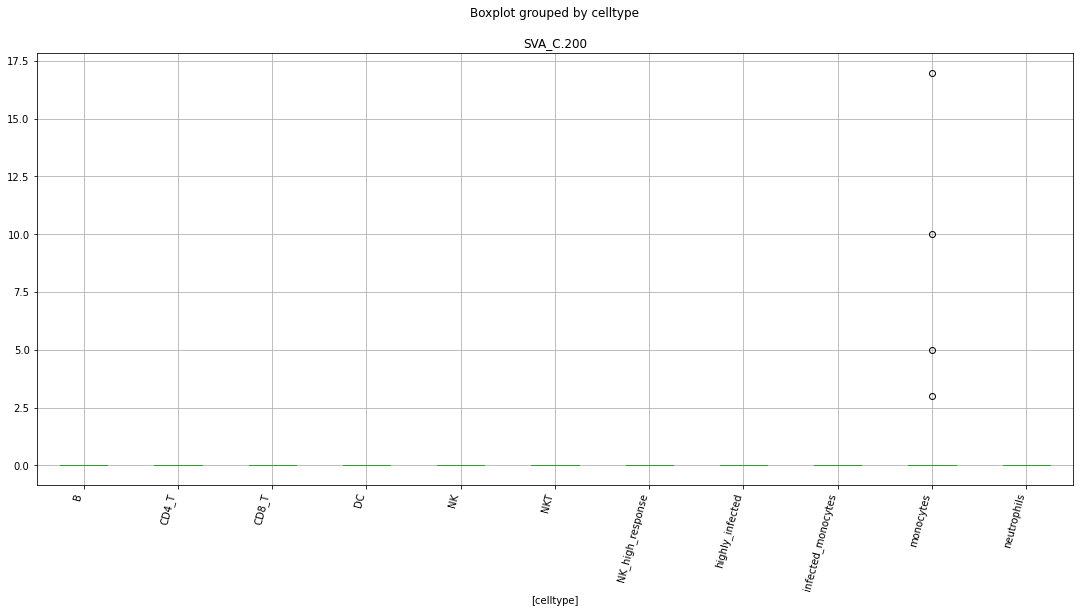

 p : 8.663158321833775e-06  ( t : 4.715335638929747 ) :  SVA_B.162


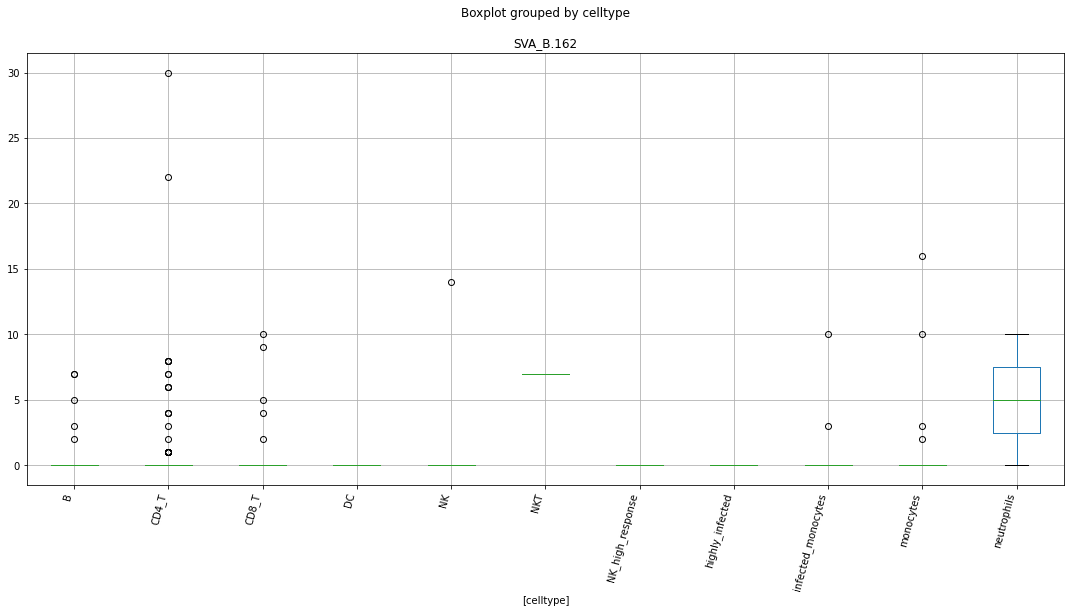

 p : 8.953709200526878e-06  ( t : 4.478333109698184 ) :  SVA_E.108


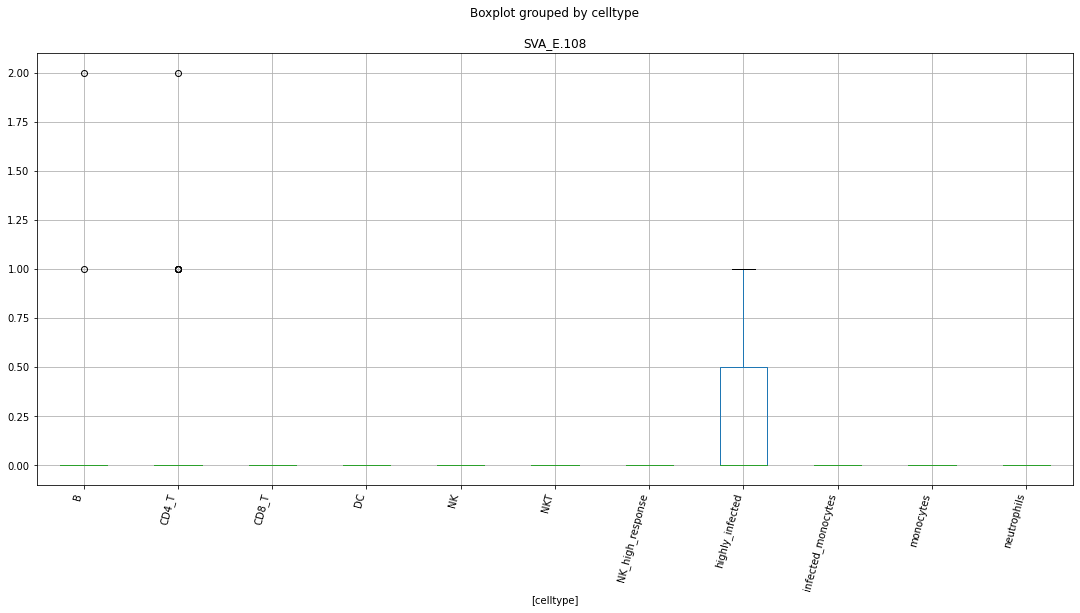

 p : 9.339248456381531e-06  ( t : 4.933784092407318 ) :  SVA_F.942


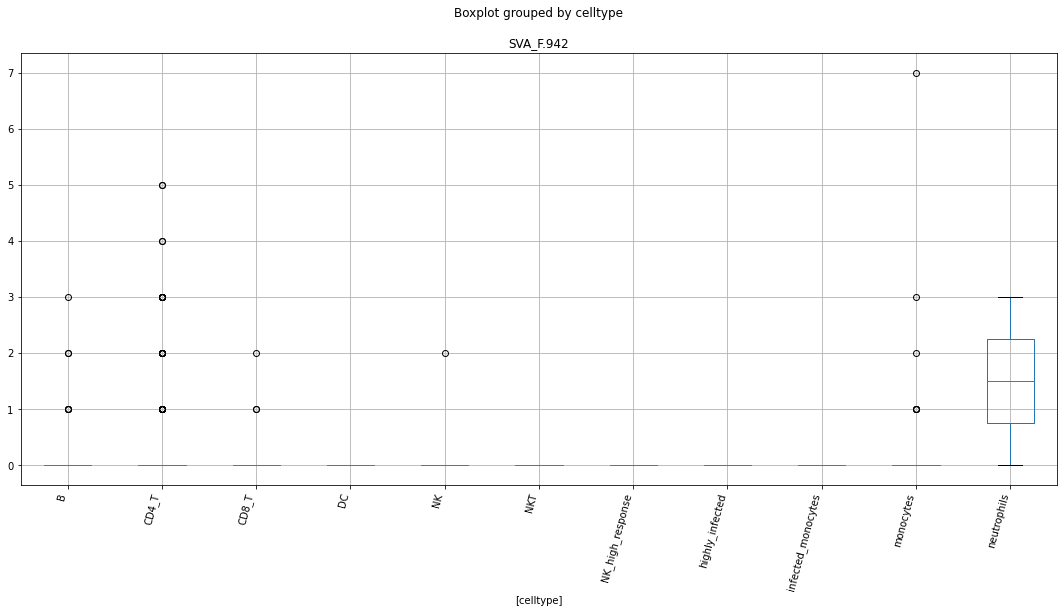

 p : 9.48290785978435e-06  ( t : 4.613412036425257 ) :  SVA_B.162


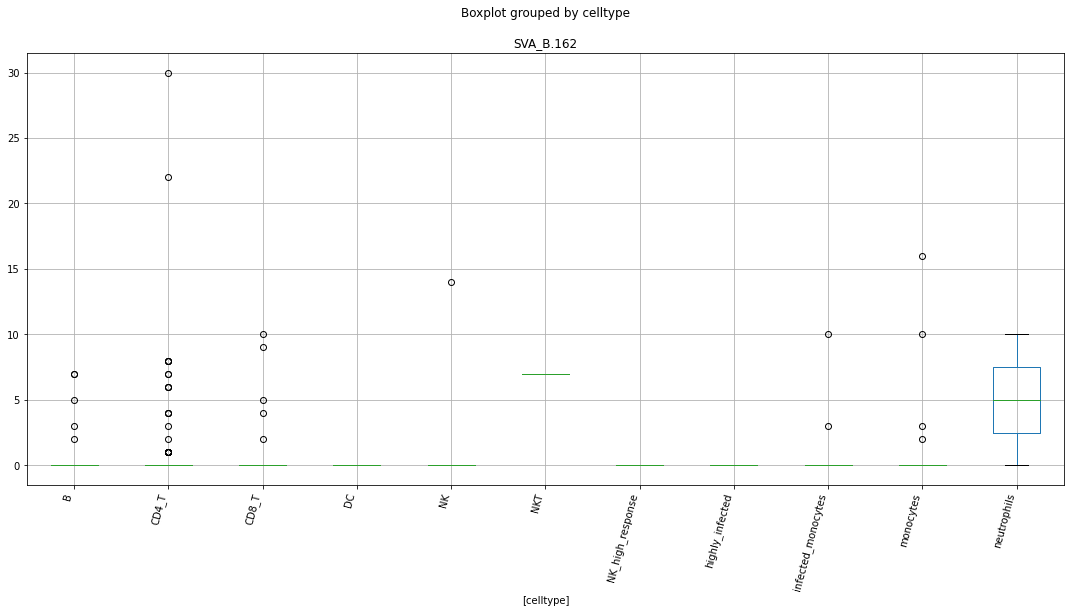

 p : 9.948832023757168e-06  ( t : 4.90475318171923 ) :  SVA_D.166


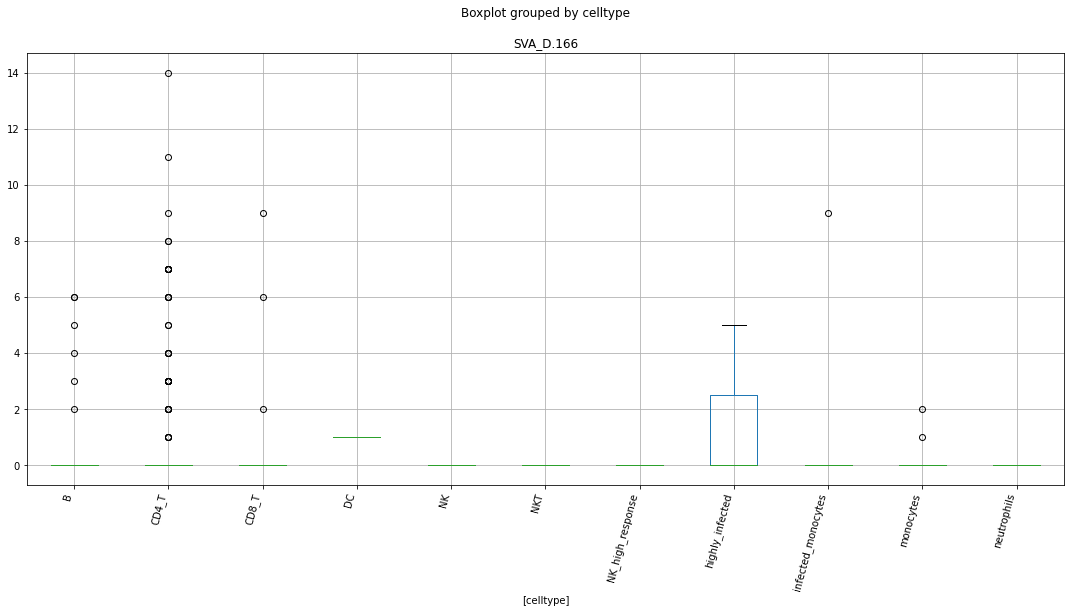

 p : 9.948832023757205e-06  ( t : 4.9047531817192285 ) :  SVA_D.1278


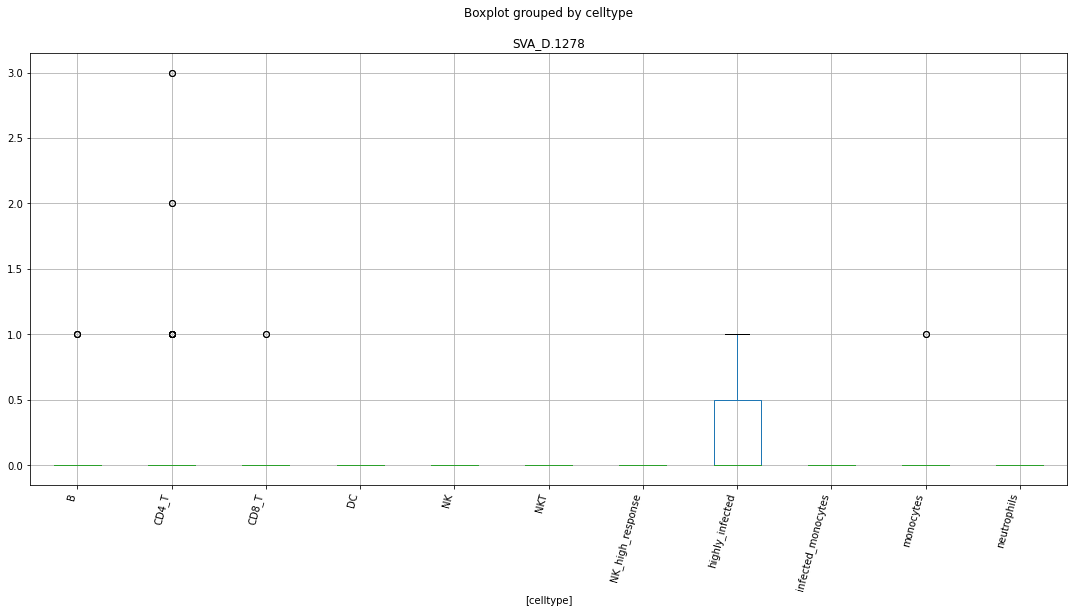

 p : 9.948832023757205e-06  ( t : 4.9047531817192285 ) :  SVA_F.474


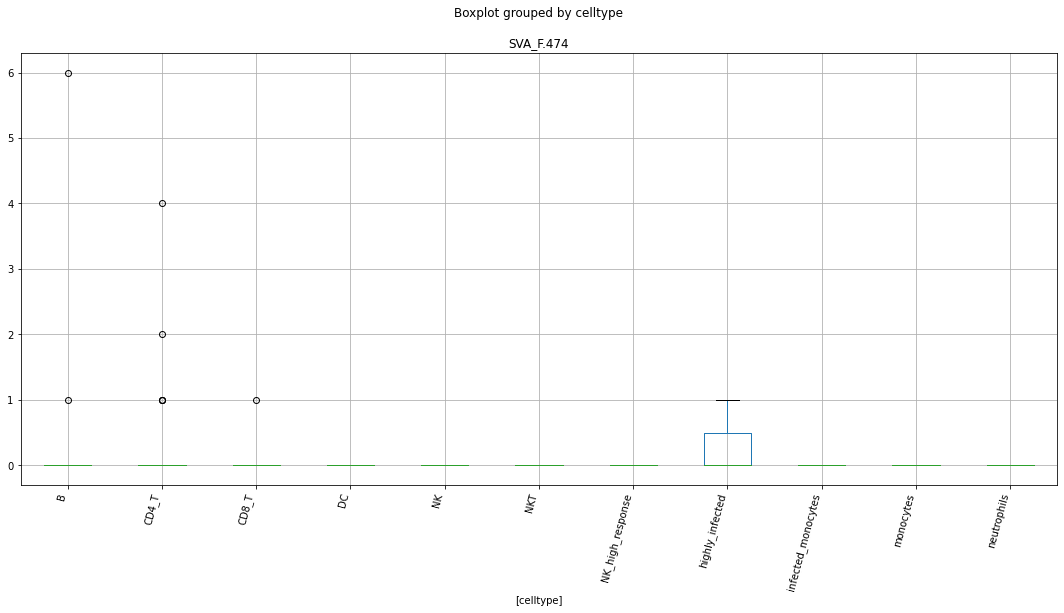

 p : 9.948832023757205e-06  ( t : 4.904753181719229 ) :  SVA_D.627


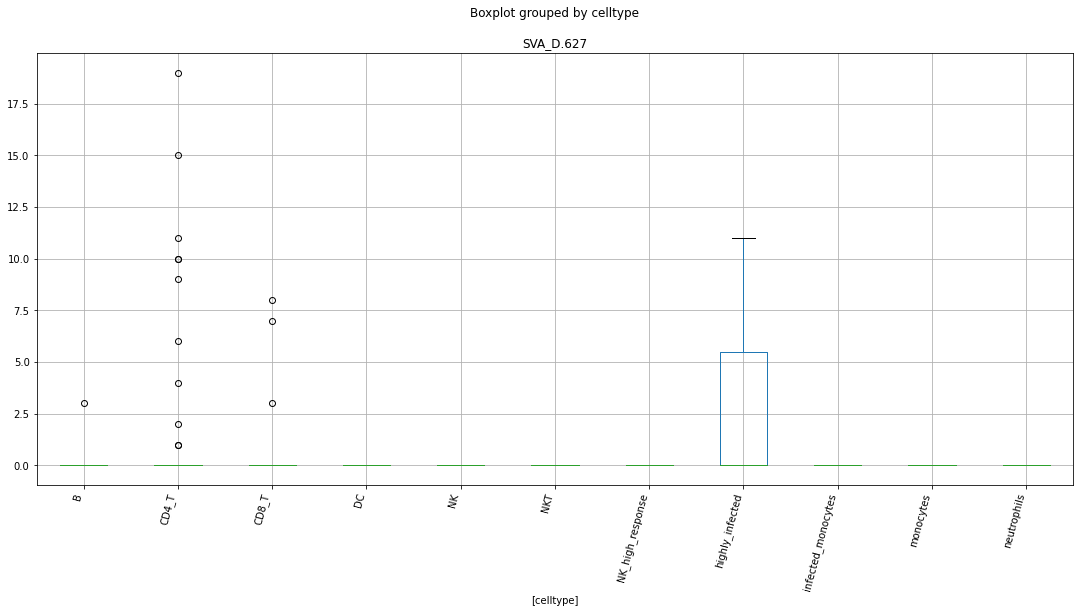

 p : 9.948832023757205e-06  ( t : 4.9047531817192285 ) :  SVA_F.191


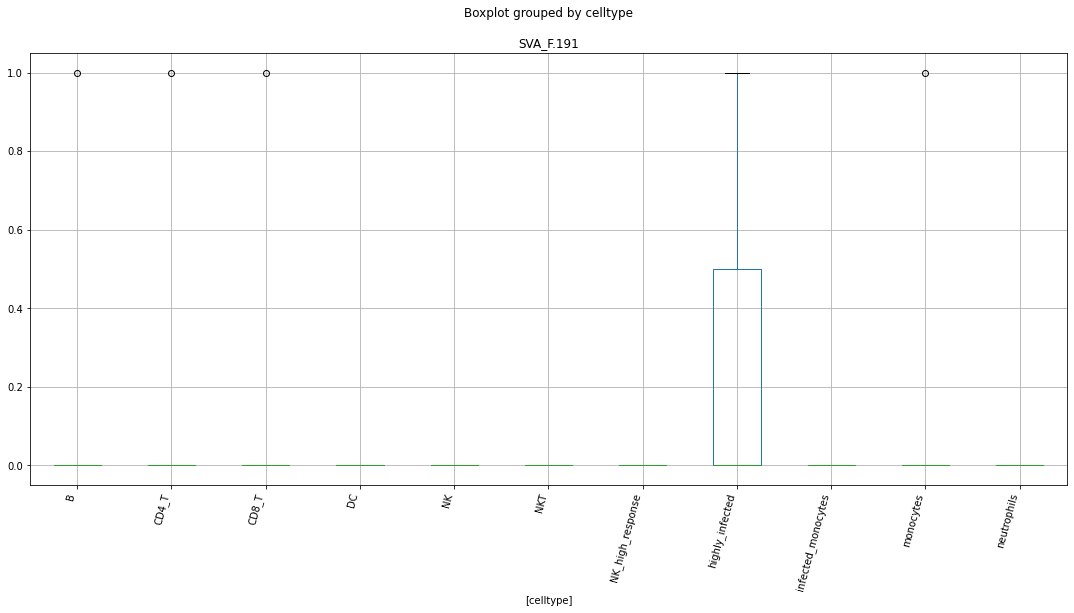

 p : 9.948832023757205e-06  ( t : 4.904753181719229 ) :  SVA_A.114


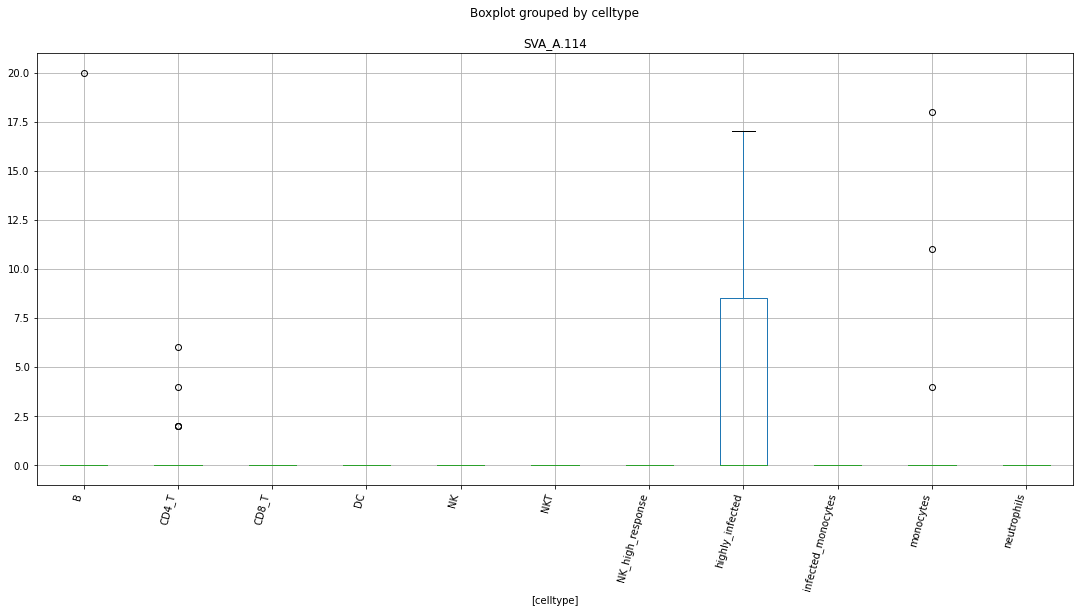

 p : 9.948832023757205e-06  ( t : 4.9047531817192285 ) :  SVA_E.108


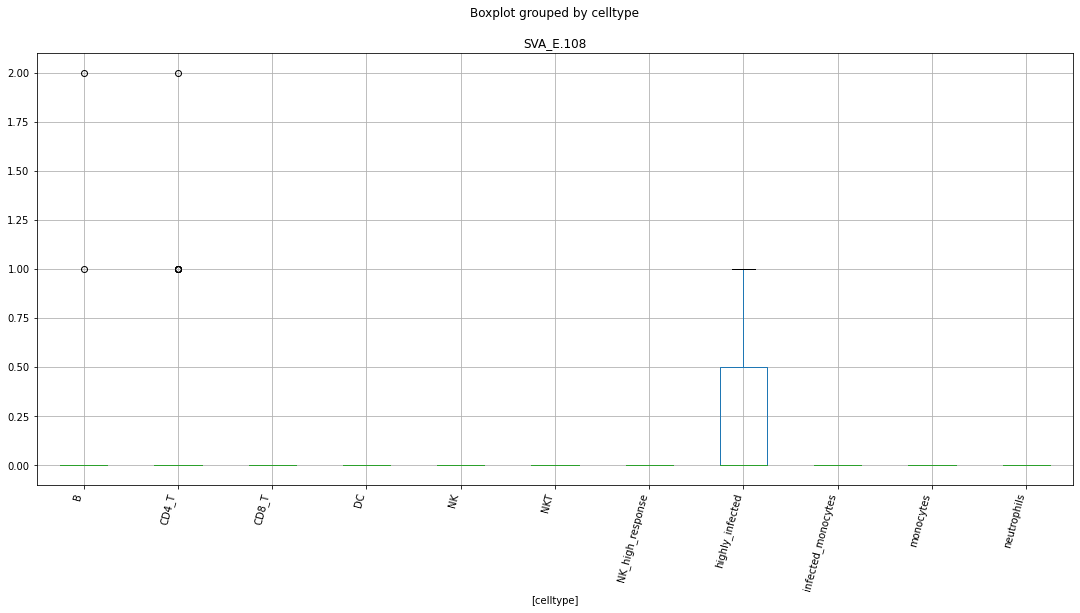

 p : 9.948832023757205e-06  ( t : 4.9047531817192285 ) :  SVA_F.705


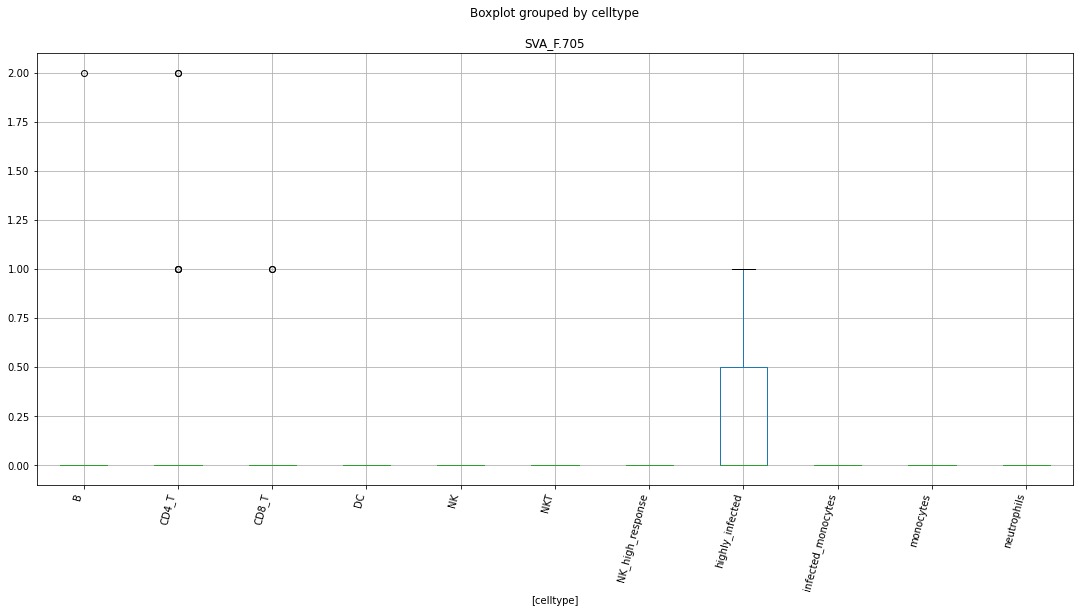

 p : 9.948832023757205e-06  ( t : 4.9047531817192285 ) :  SVA_D.43


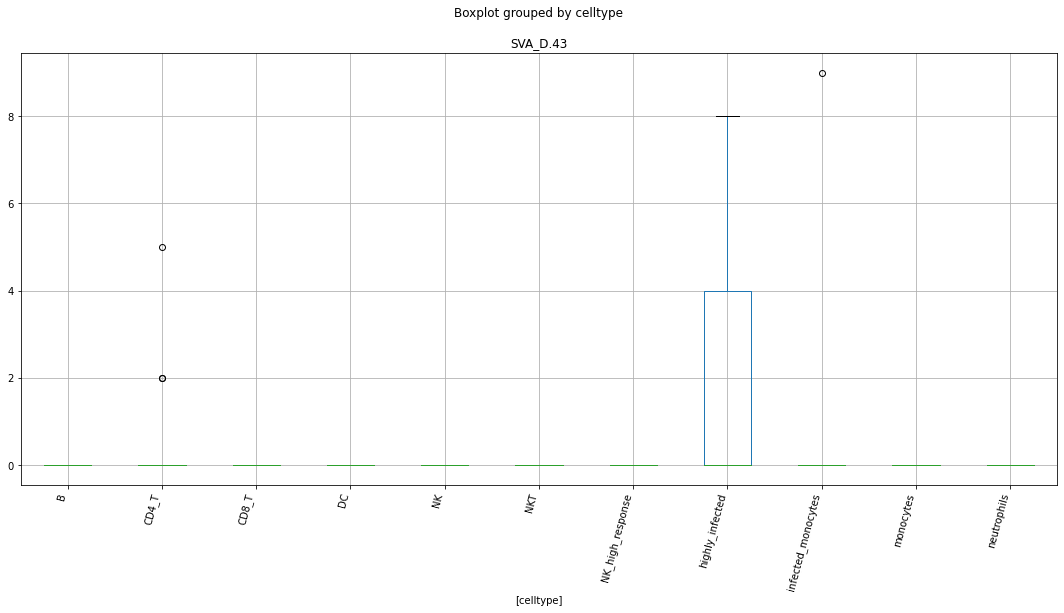

 p : 9.948832023757205e-06  ( t : 4.904753181719229 ) :  SVA_D.561


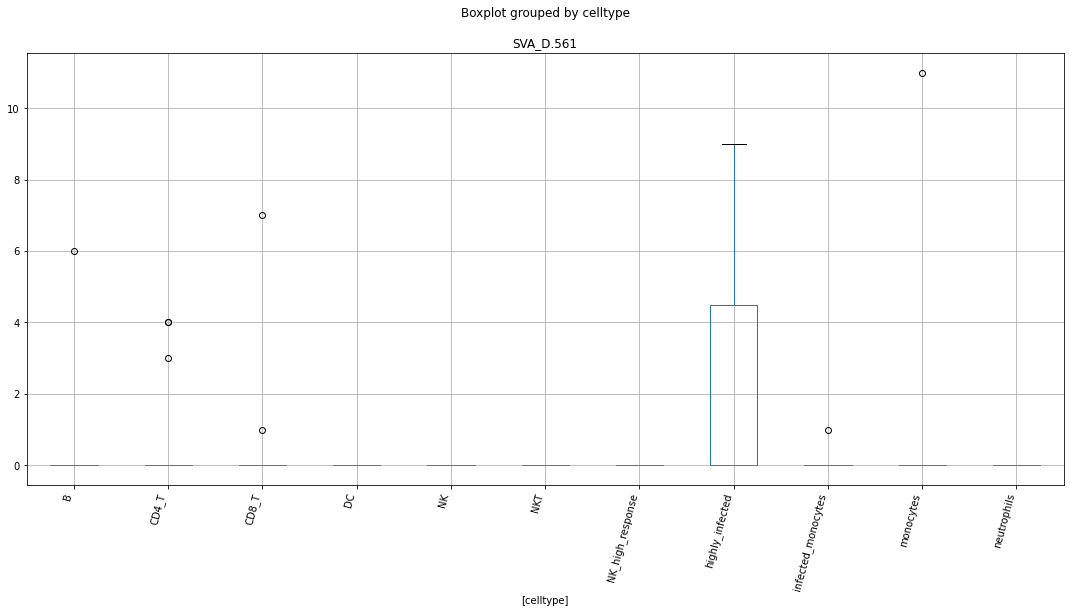

 p : 9.948832023757205e-06  ( t : 4.9047531817192285 ) :  SVA_F.370


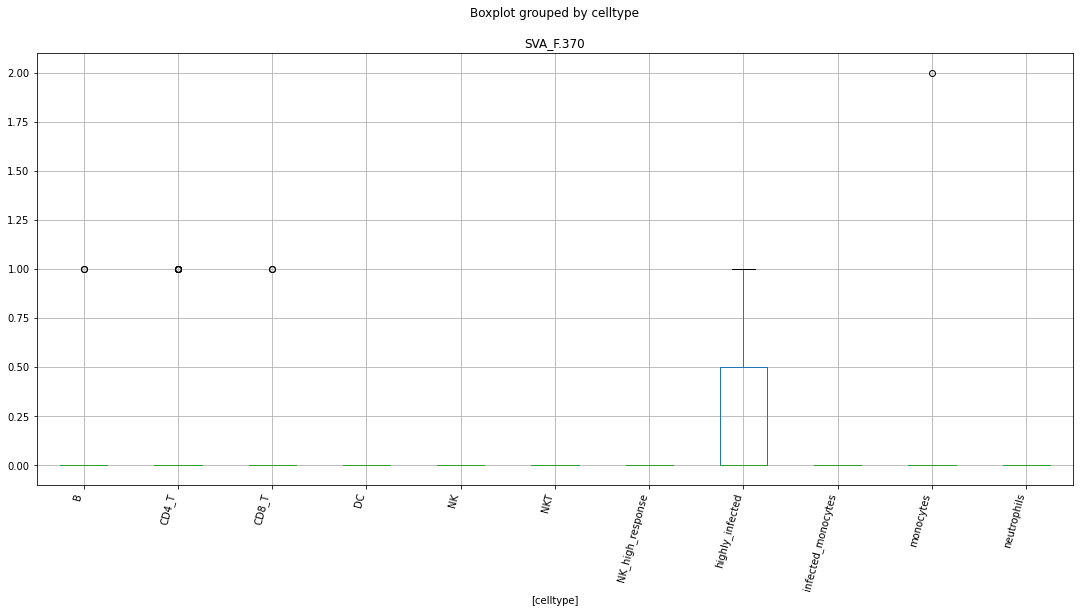

 p : 1.0844247446619211e-05  ( t : 4.4333603585795665 ) :  SVA_C.135


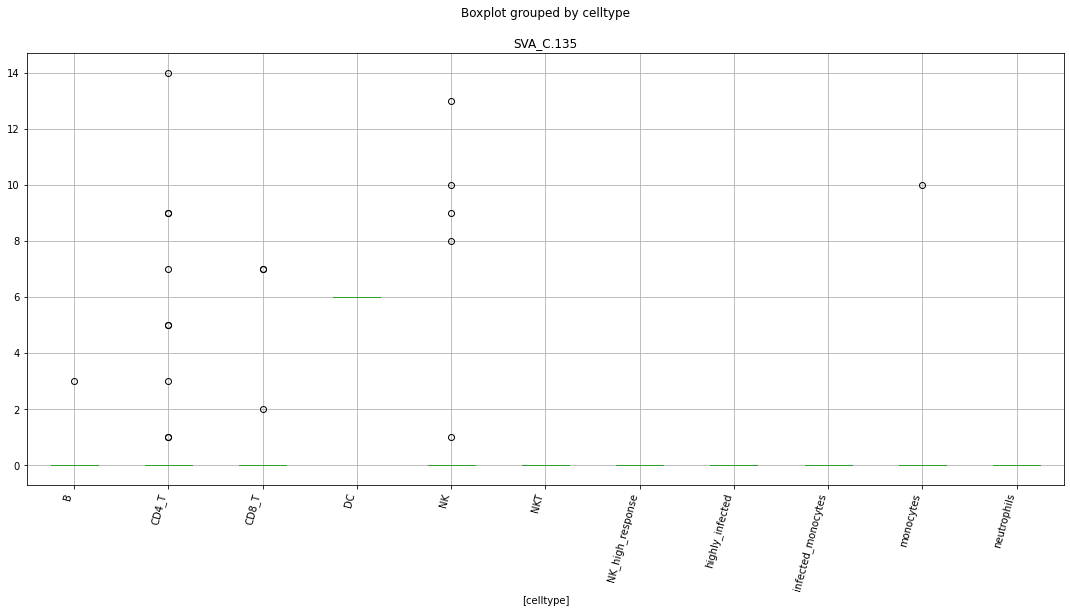

 p : 1.1369178311259205e-05  ( t : 4.876532694063755 ) :  SVA_E.230


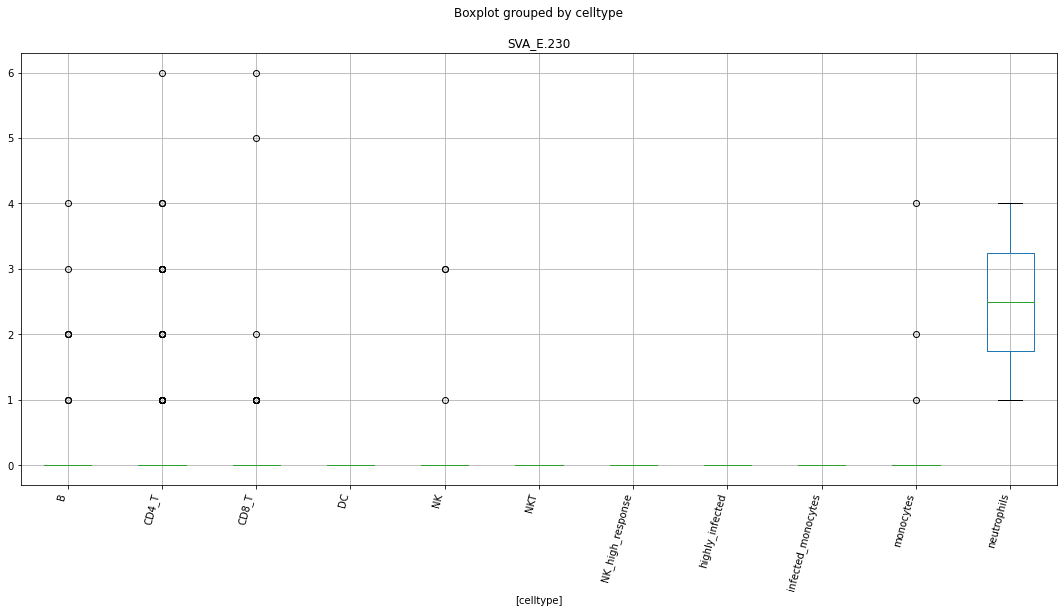

 p : 1.2349114397741759e-05  ( t : 4.406515266551668 ) :  SVA_D.918


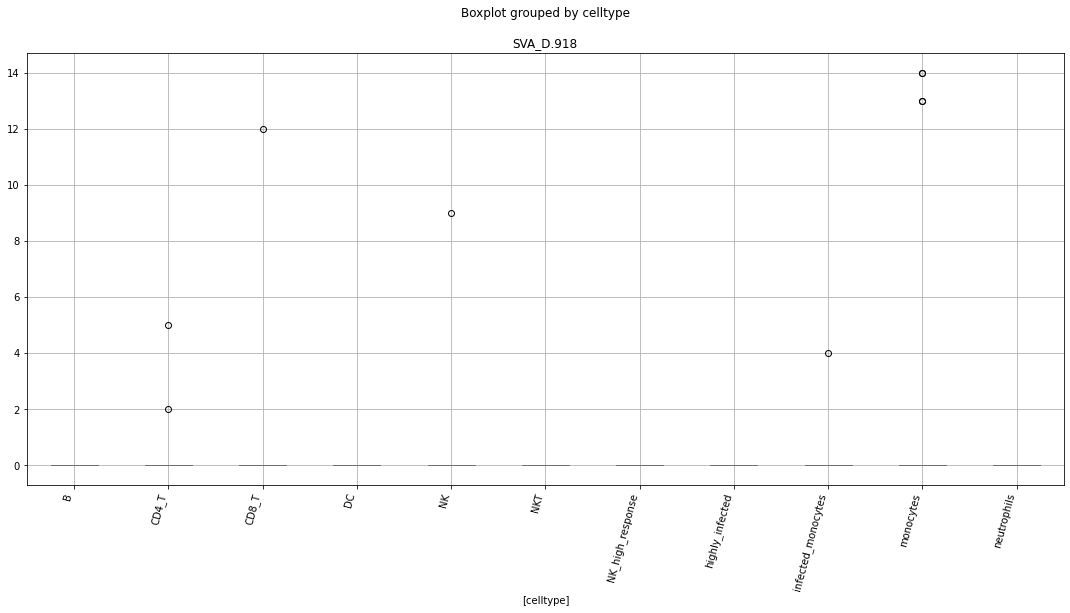

 p : 1.2424232212053063e-05  ( t : 4.62343803503346 ) :  SVA_F.325


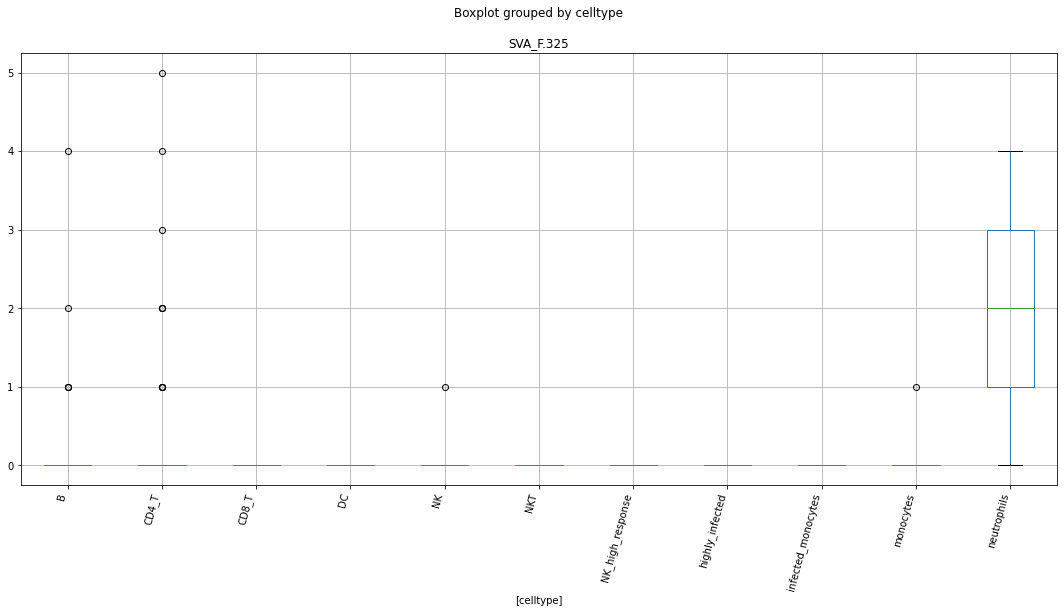

 p : 1.3472875160422356e-05  ( t : 4.526356803591674 ) :  SVA_D.1344


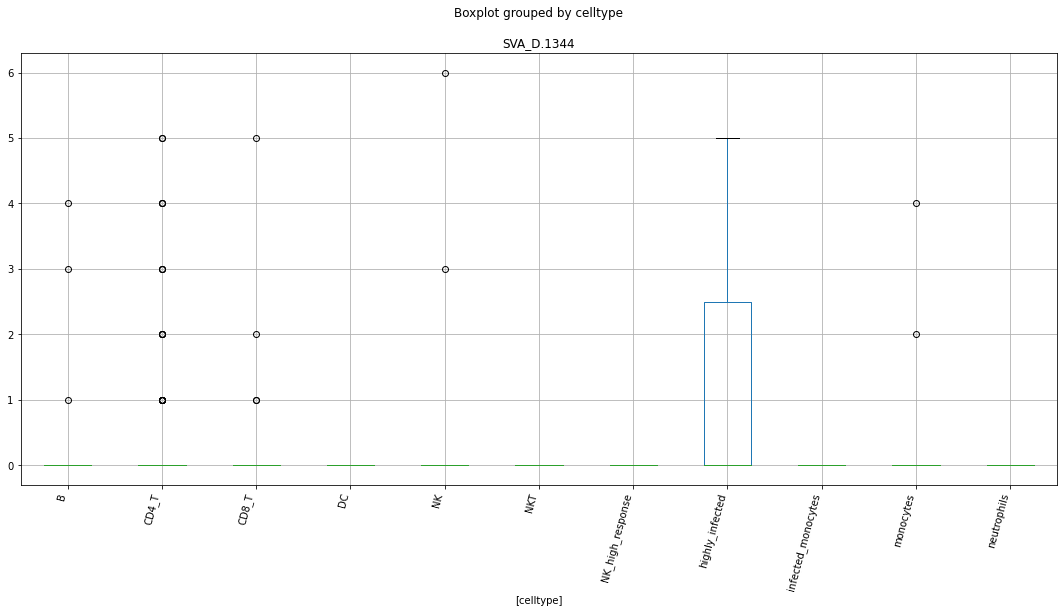

 p : 1.4546711555617492e-05  ( t : 4.582929123121527 ) :  SVA_E.230


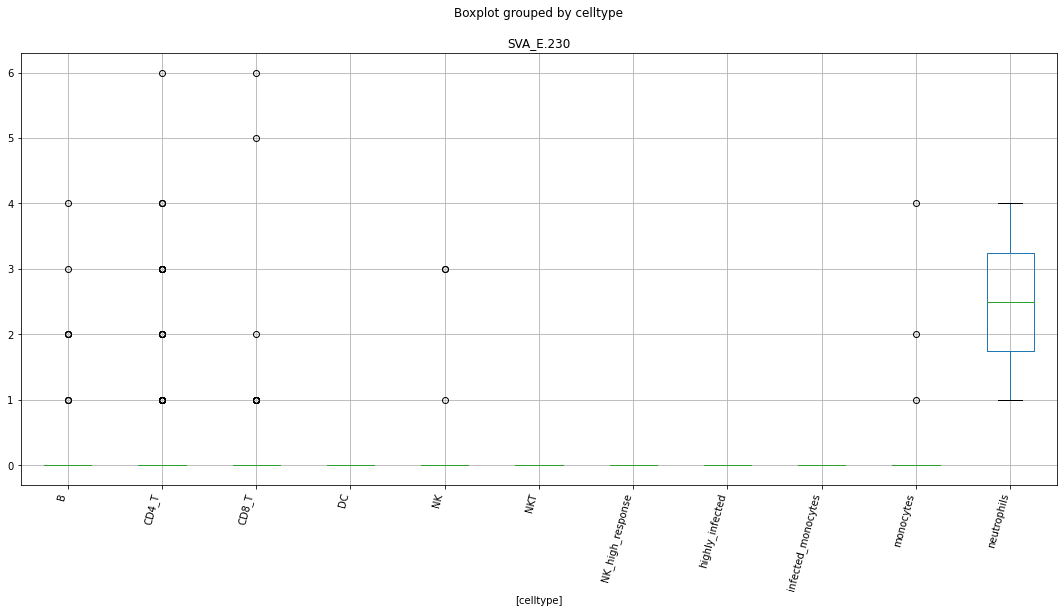

 p : 1.470379235516078e-05  ( t : 4.791372938584995 ) :  SVA_E.179


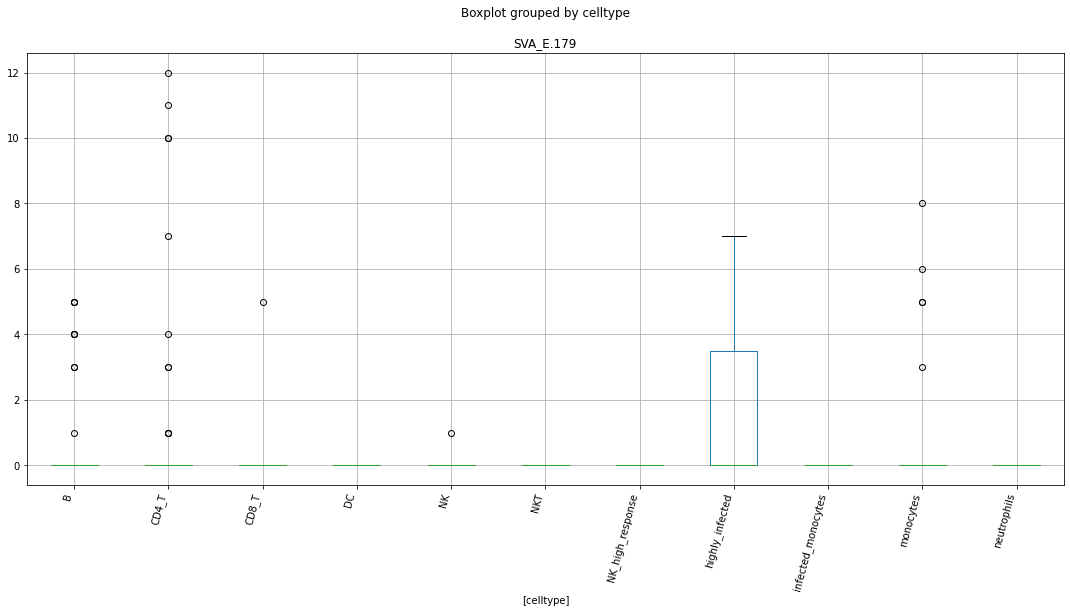

 p : 1.6573346700034528e-05  ( t : 4.546516309728467 ) :  SVA_D.986


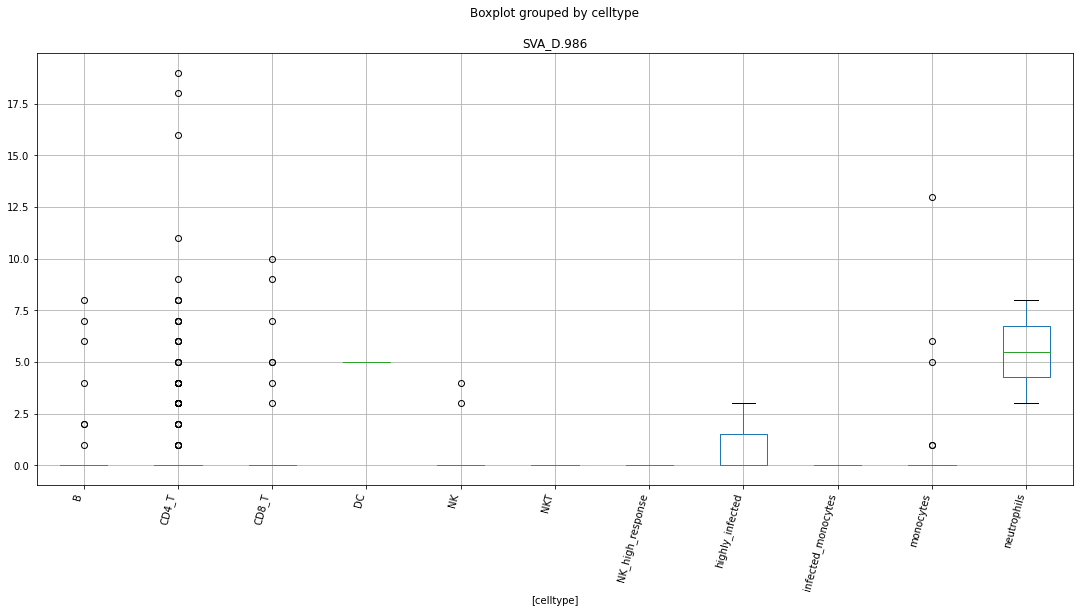

 p : 2.096768927456765e-05  ( t : 4.407268743063154 ) :  SVA_B.163


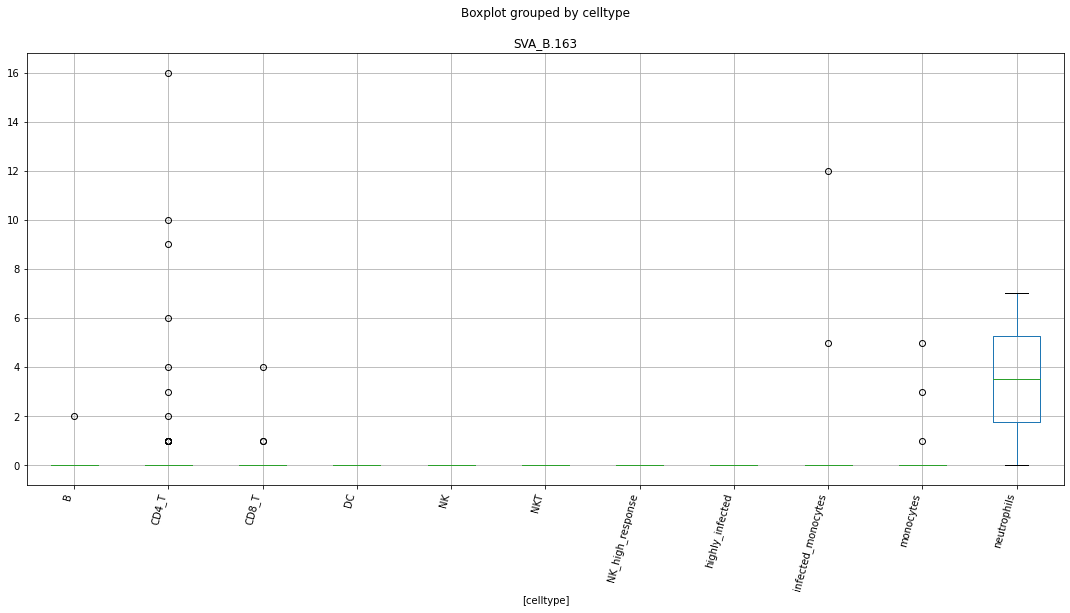

 p : 2.6085248076894976e-05  ( t : 4.623458107680421 ) :  SVA_F.766


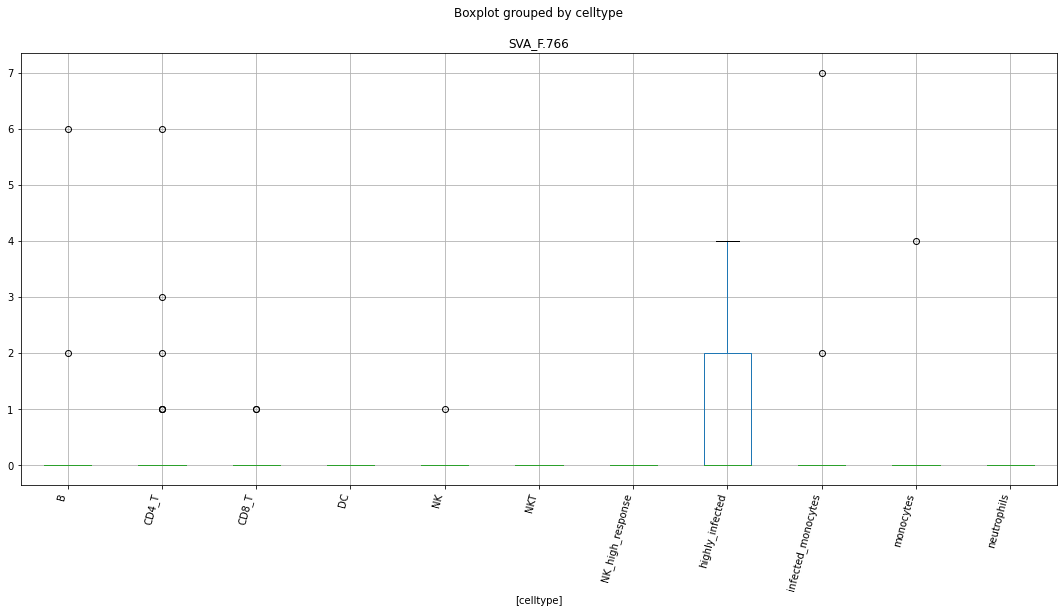

 p : 2.617009514969105e-05  ( t : 4.235881994869763 ) :  SVA_D.1123


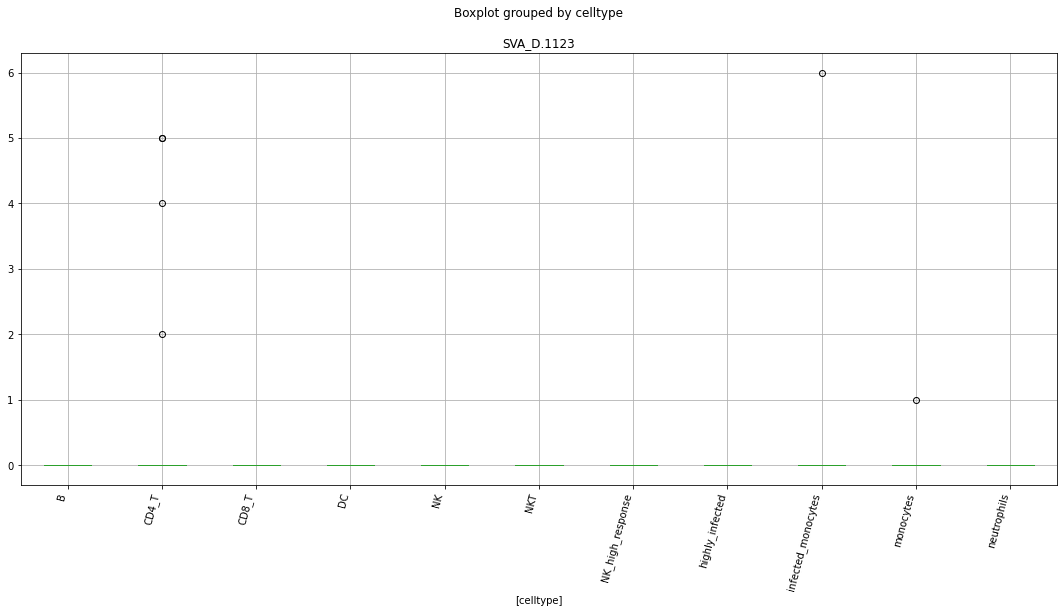

 p : 2.8240292958231212e-05  ( t : 4.333144744276465 ) :  SVA_F.766


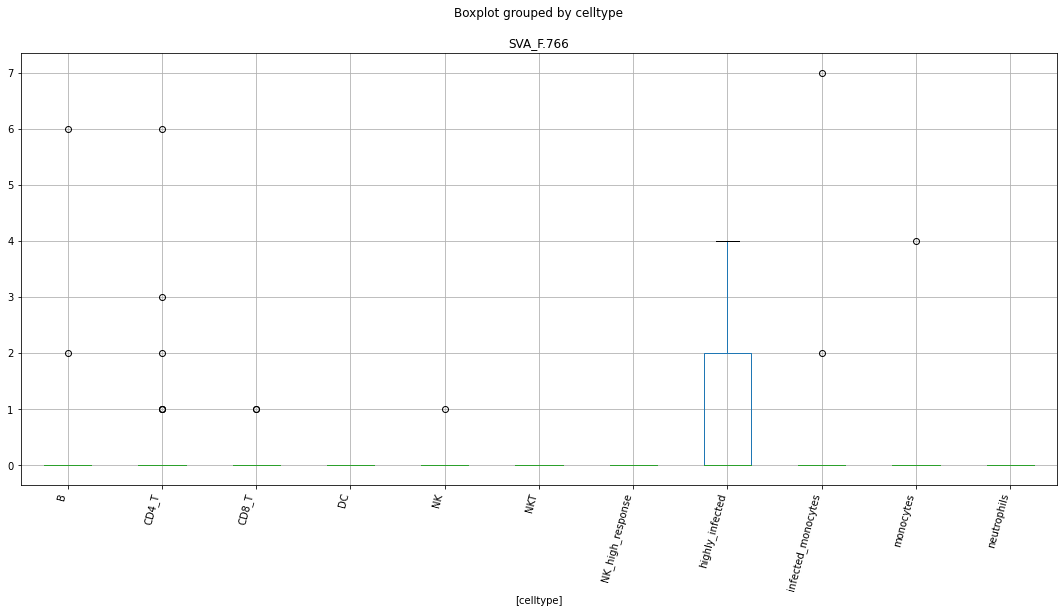

 p : 3.0291773650527846e-05  ( t : 4.391851623935273 ) :  SVA_C.259


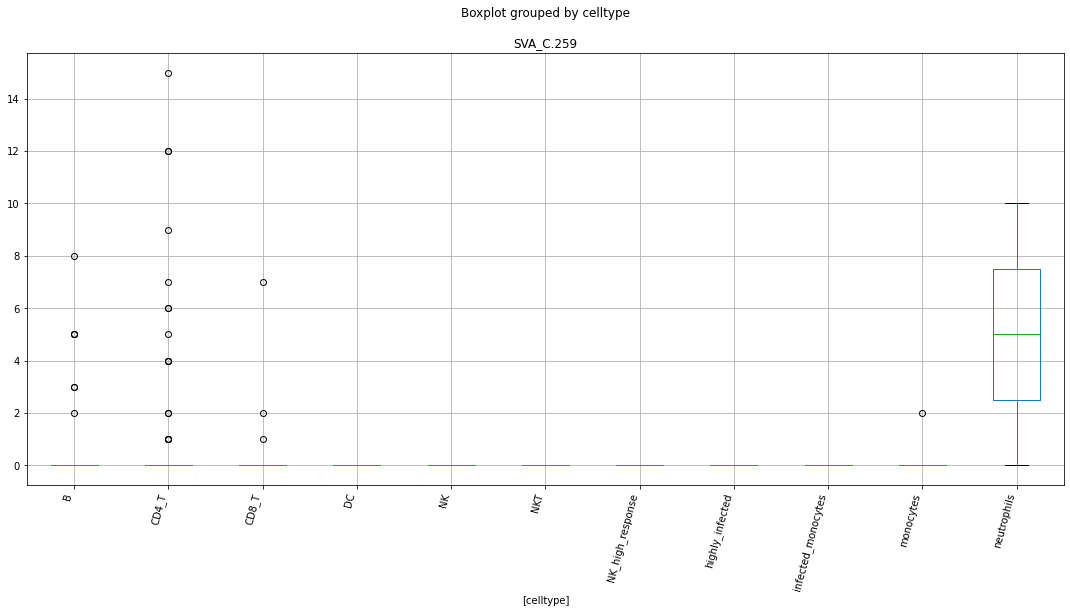

 p : 3.222666068854332e-05  ( t : 4.370604620269944 ) :  SVA_D.1344


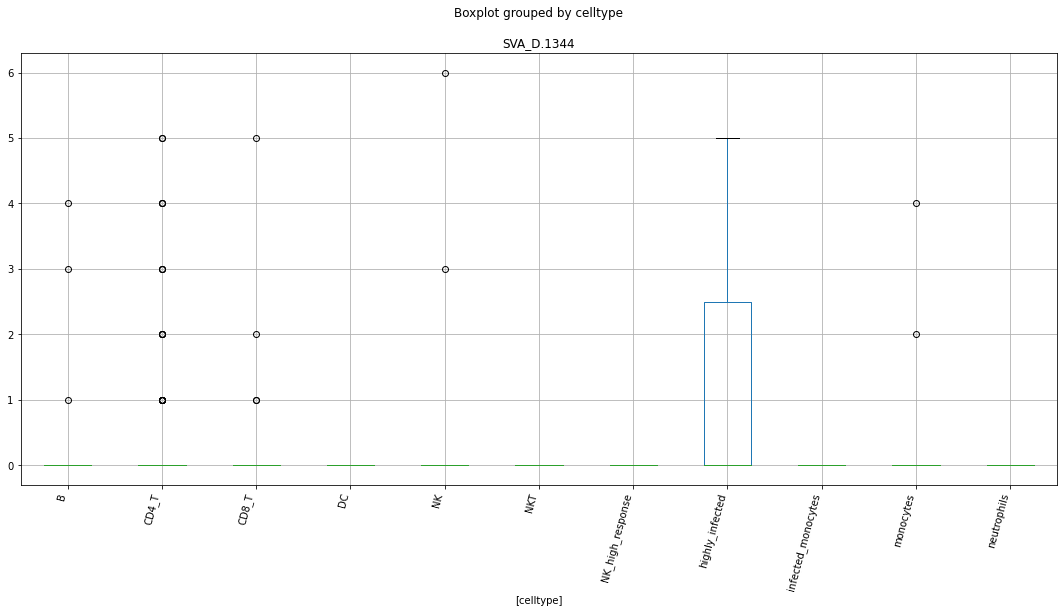

 p : 3.2322865968067273e-05  ( t : 4.3096126090115146 ) :  SVA_E.230


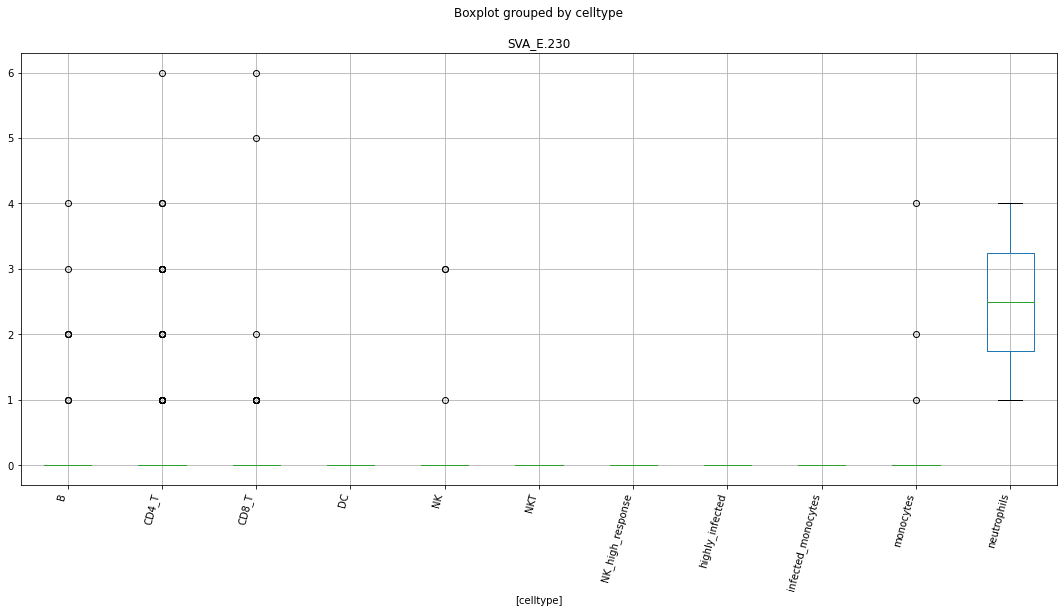

 p : 3.287724810013195e-05  ( t : 4.5551065952834335 ) :  SVA_D.851


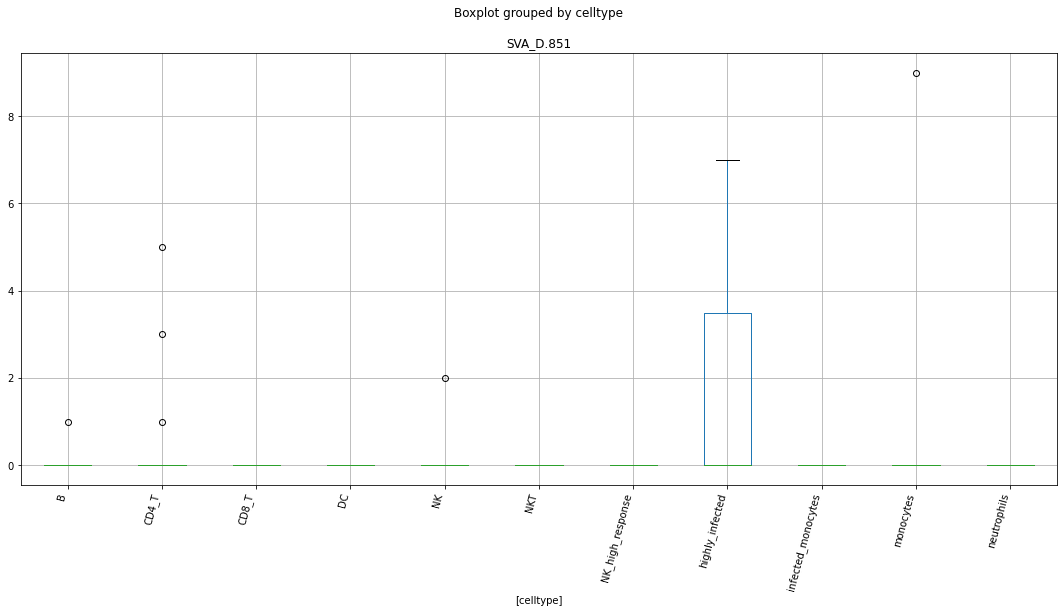

 p : 3.322758793838246e-05  ( t : 6.711872374325273 ) :  SVA_D.986


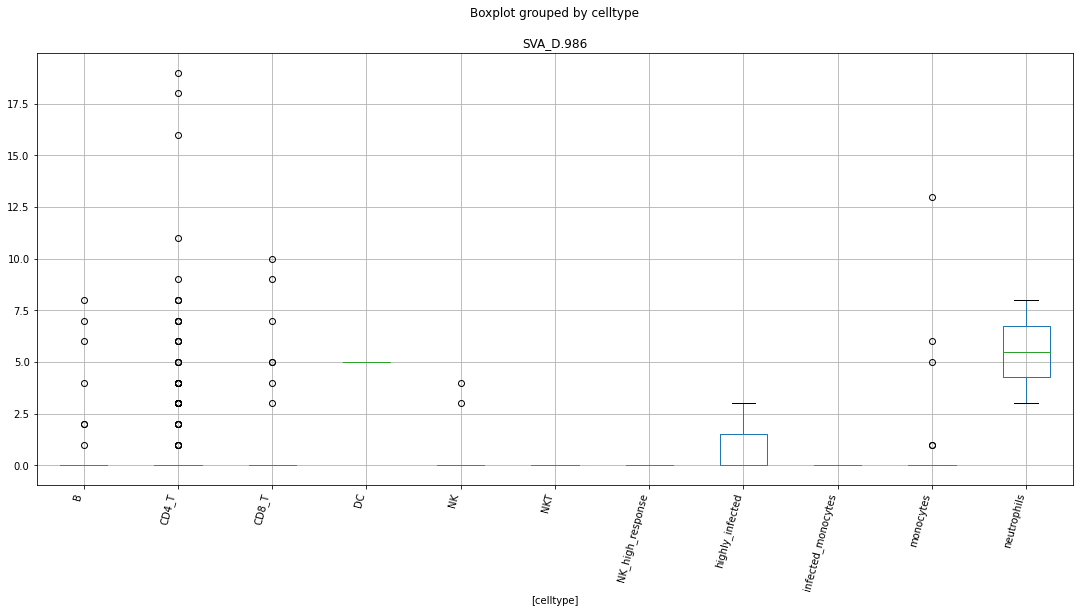

 p : 3.742518429314127e-05  ( t : 4.262251912652098 ) :  SVA_B.150


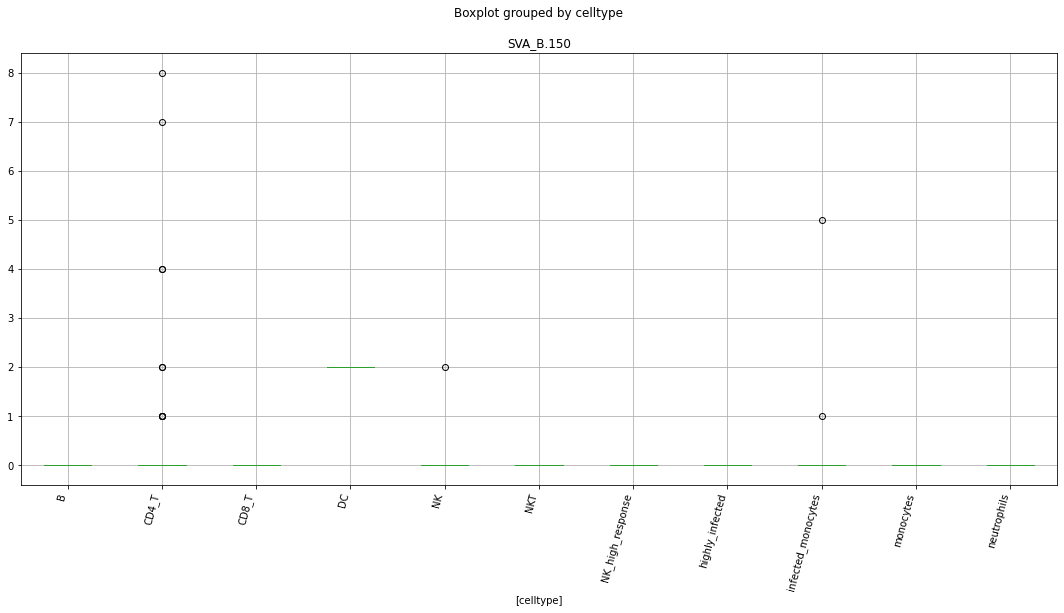

 p : 3.7872691103839974e-05  ( t : 4.146349500593167 ) :  SVA_F.496


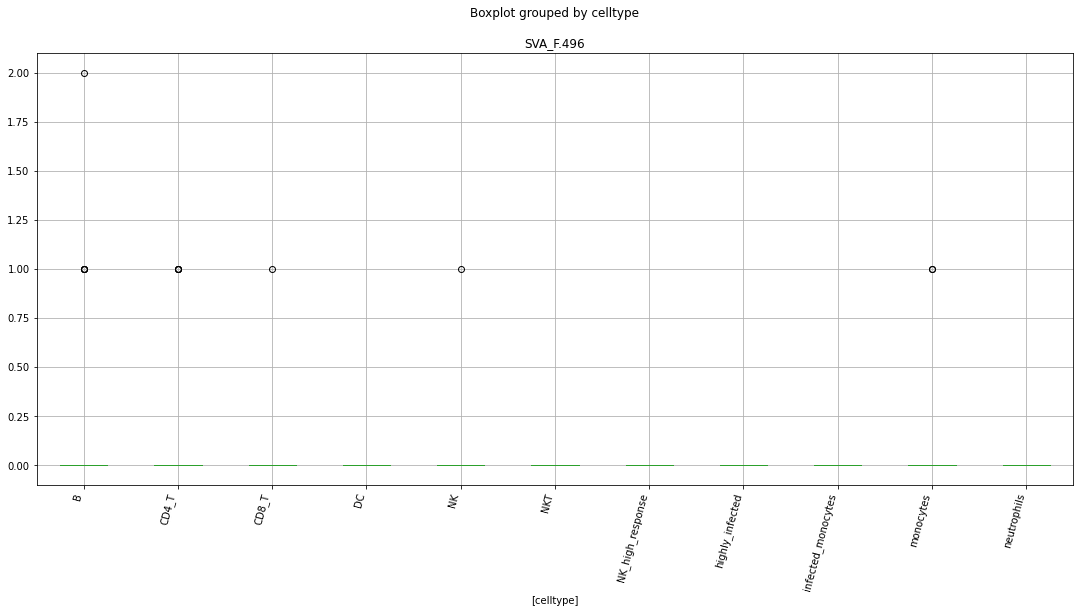

 p : 4.608049232608544e-05  ( t : 4.101666586029121 ) :  SVA_B.257


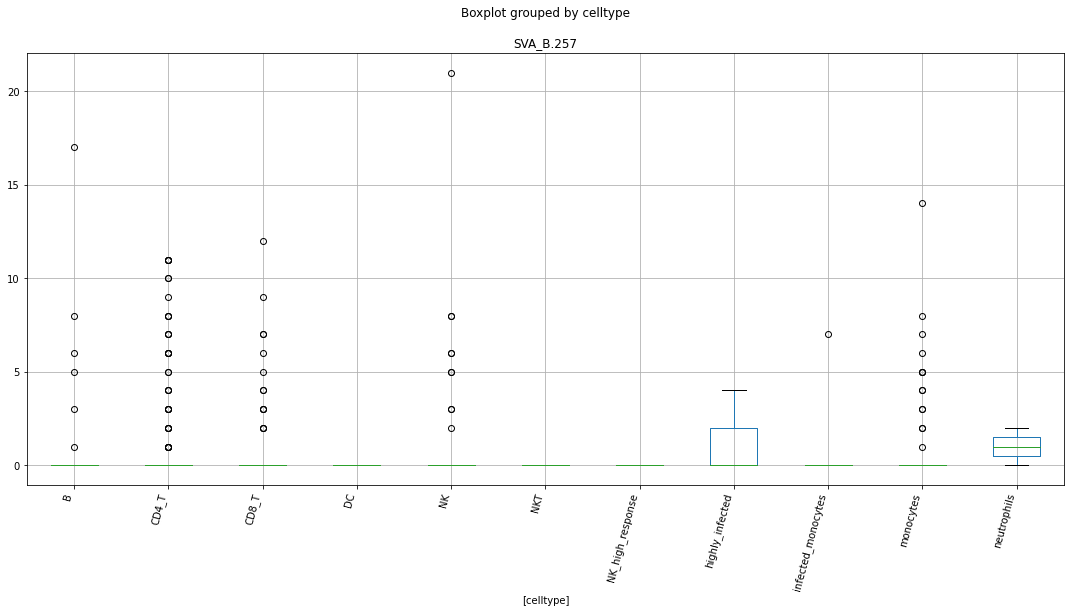

 p : 4.688108015138429e-05  ( t : 4.099676809918519 ) :  SVA_D.986


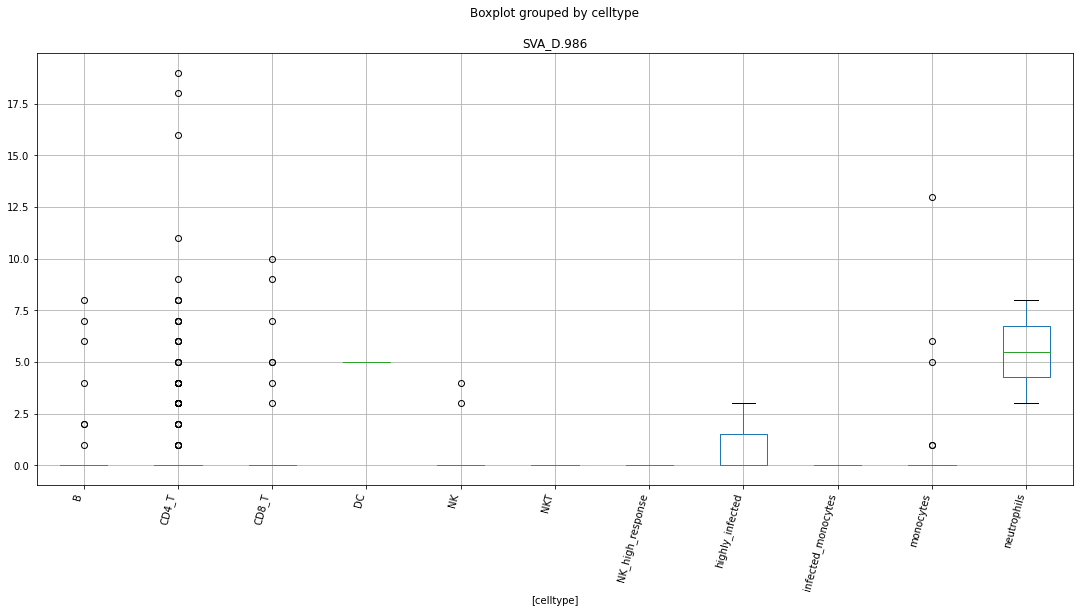

 p : 5.229750179064362e-05  ( t : 4.07356578930785 ) :  SVA_F.705


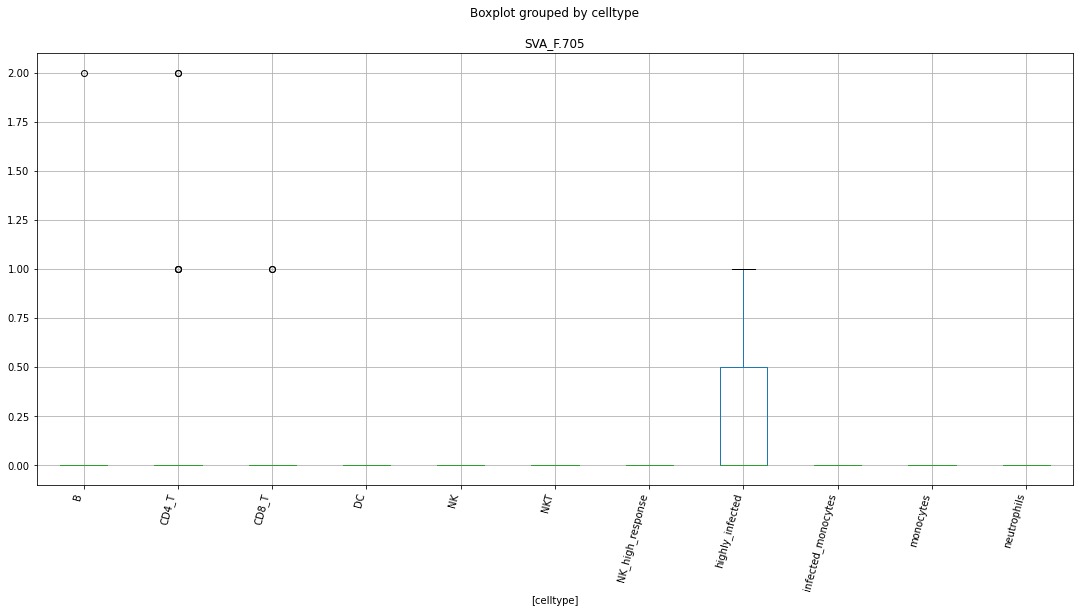

 p : 5.927087178512417e-05  ( t : 4.0415799921811875 ) :  SVA_F.139


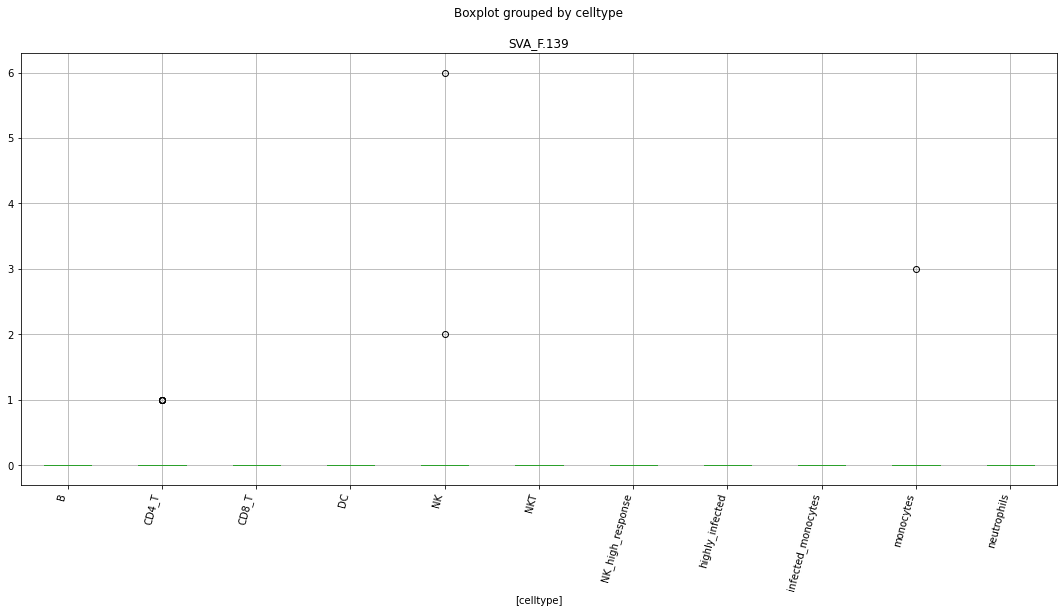

 p : 7.110900093854712e-05  ( t : 3.999543314068857 ) :  SVA_E.179


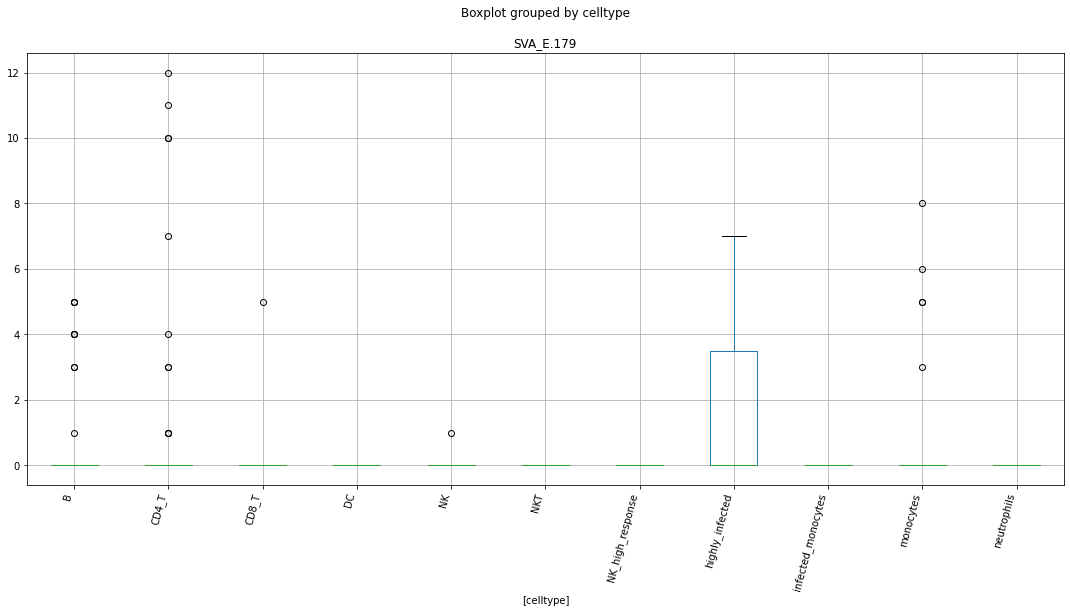

 p : 8.236493772479442e-05  ( t : 4.119187664298016 ) :  SVA_F.766


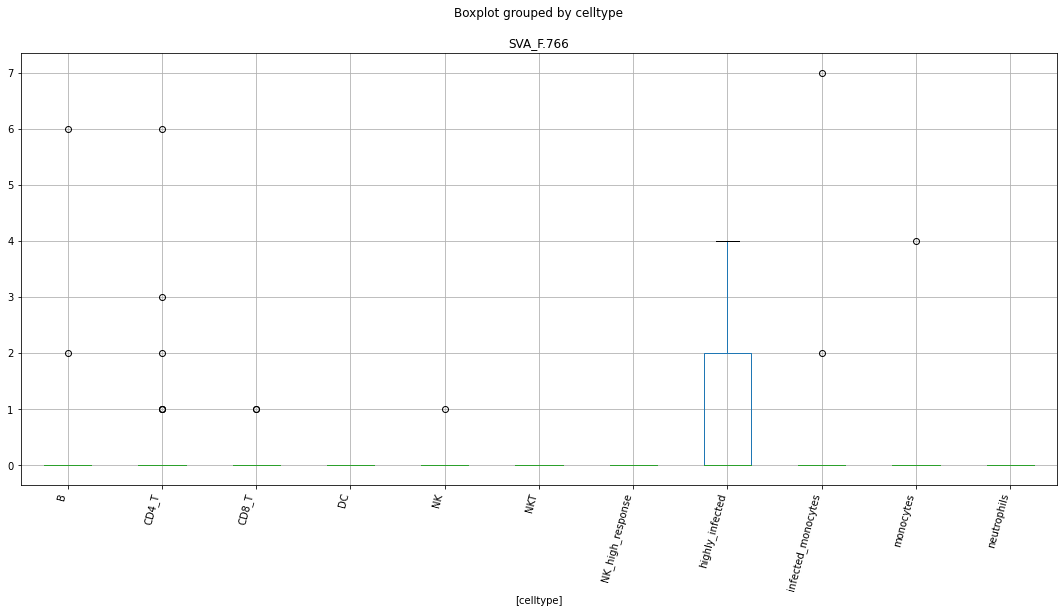

 p : 8.236493772479442e-05  ( t : 4.119187664298016 ) :  SVA_F.191


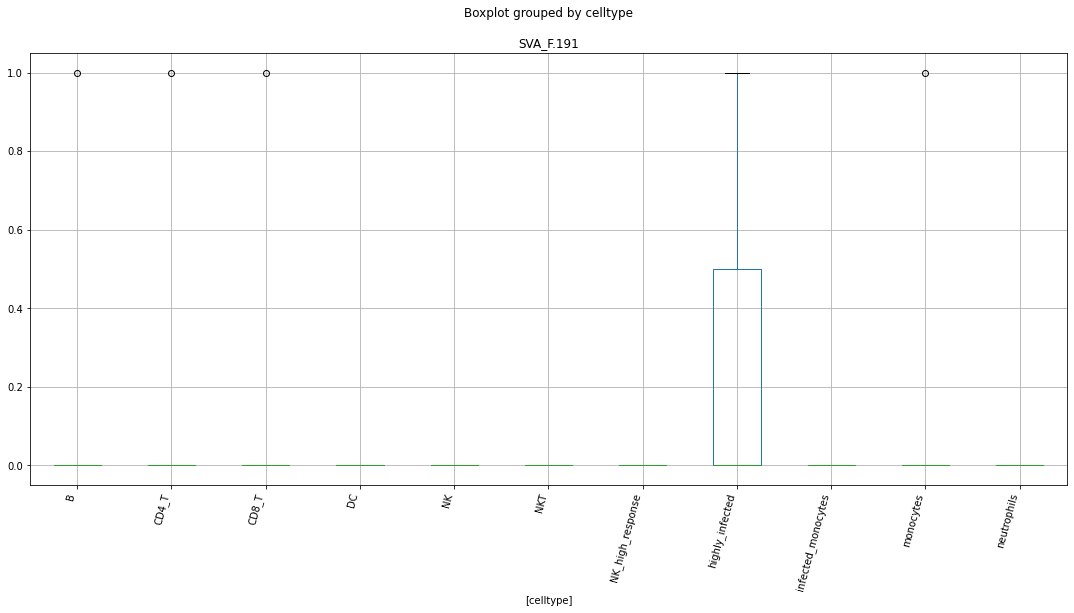

 p : 9.068841106759008e-05  ( t : 4.09490133071647 ) :  SVA_F.108


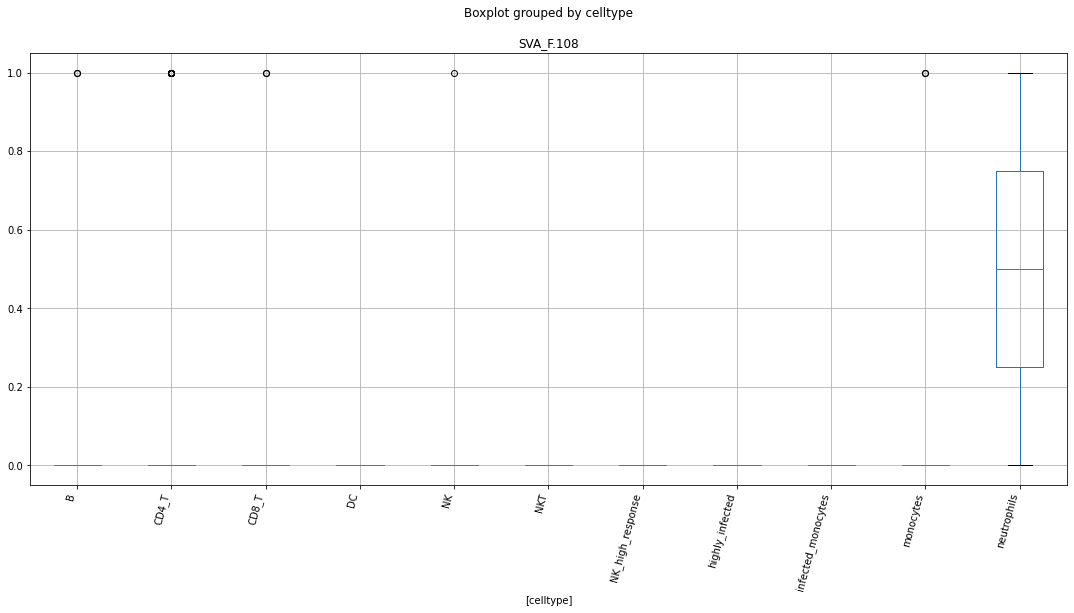

 p : 9.068841106759008e-05  ( t : 4.09490133071647 ) :  SVA_D.366


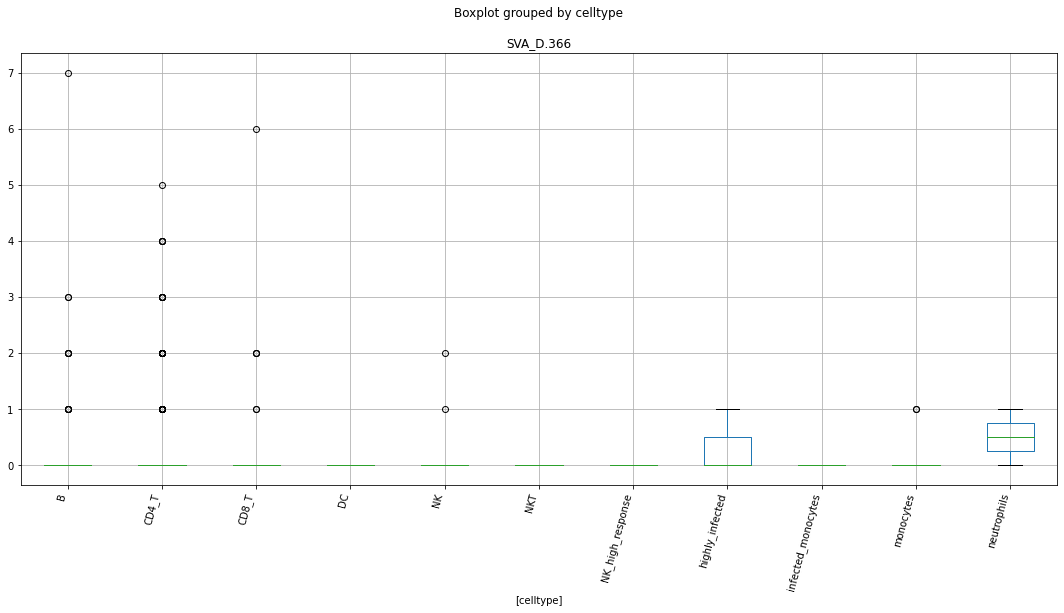

 p : 9.068841106759008e-05  ( t : 4.09490133071647 ) :  SVA_F.191


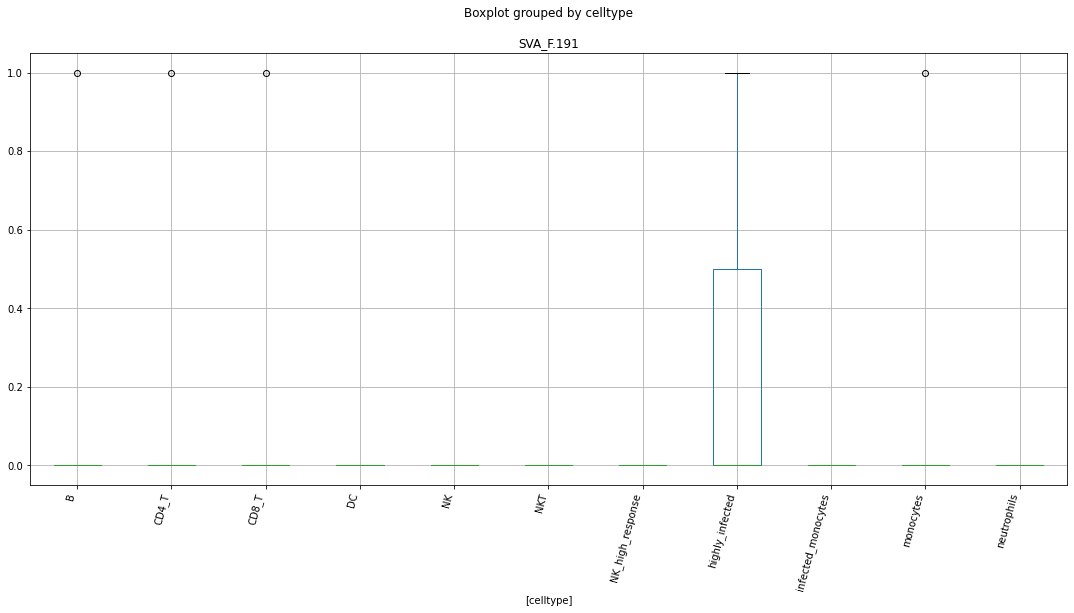

 p : 9.068841106759008e-05  ( t : 4.09490133071647 ) :  SVA_D.1231


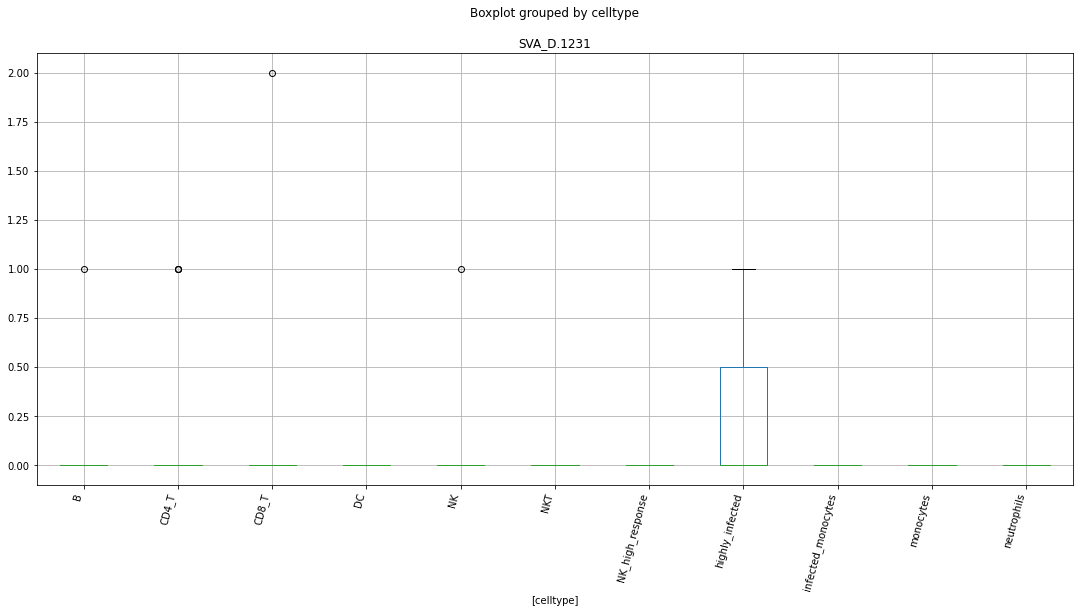

 p : 9.985832737780454e-05  ( t : 4.070471449603769 ) :  SVA_F.108


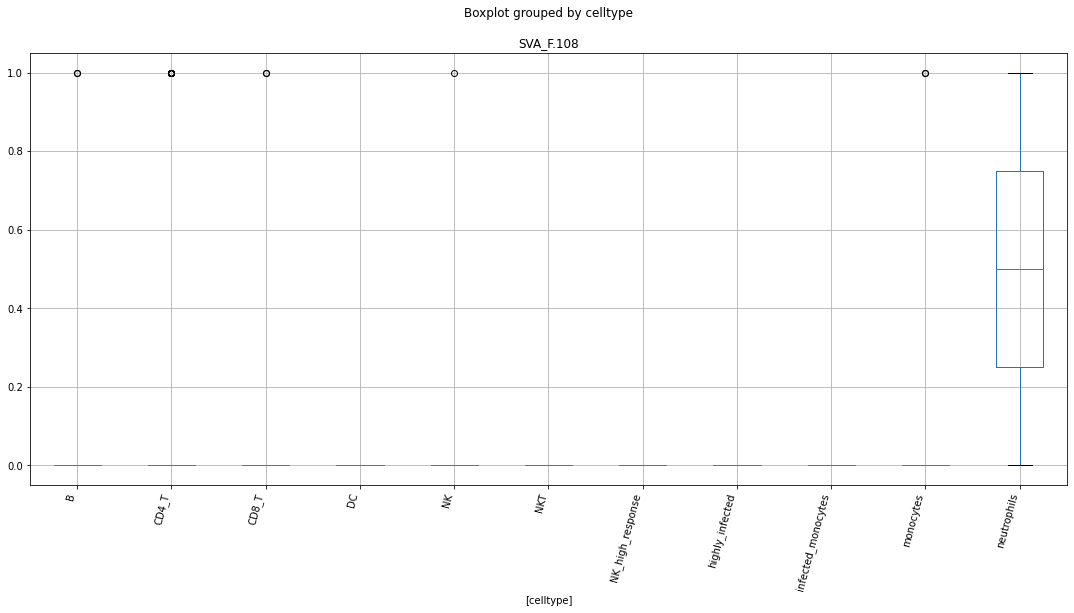

 p : 0.00010388198777288175  ( t : 3.9981531448124437 ) :  SVA_B.230


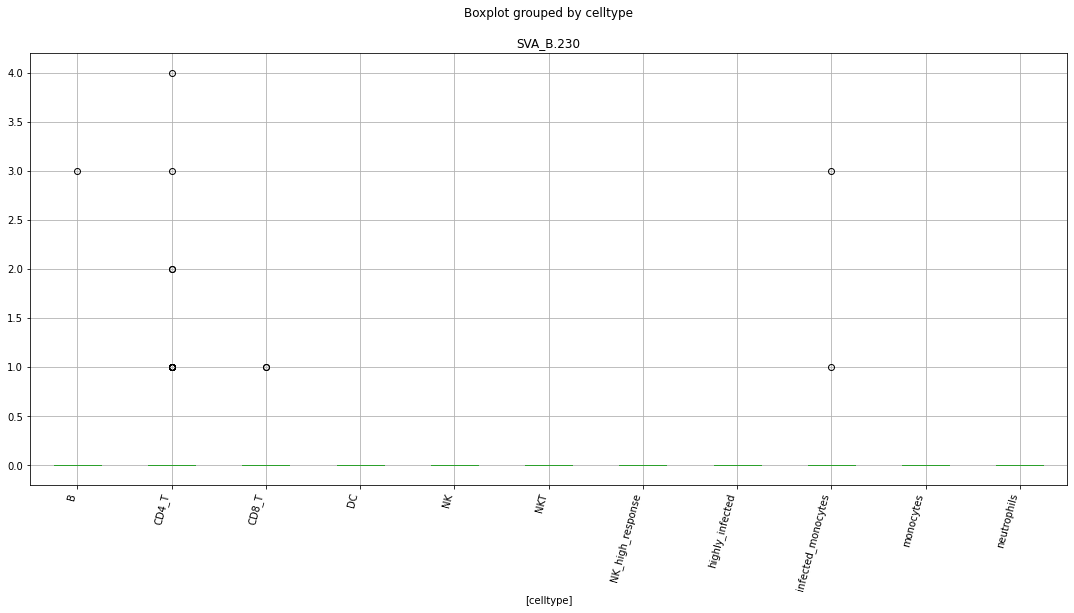

 p : 0.0001212088187334721  ( t : 3.8679009670762614 ) :  SVA_B.230


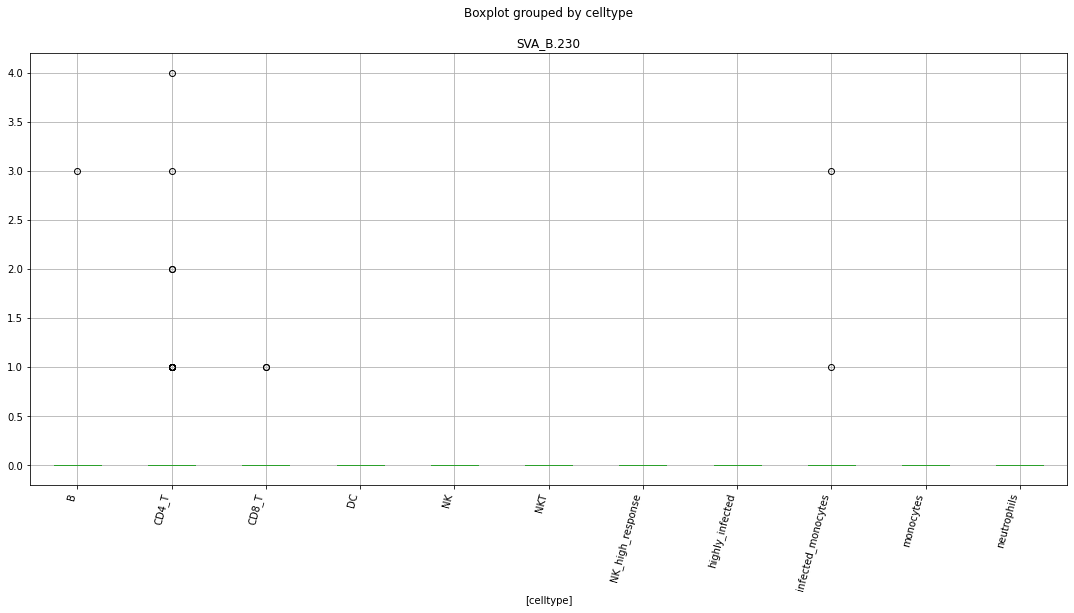

 p : 0.0001355817269872965  ( t : 3.983737874055695 ) :  SVA_D.1344


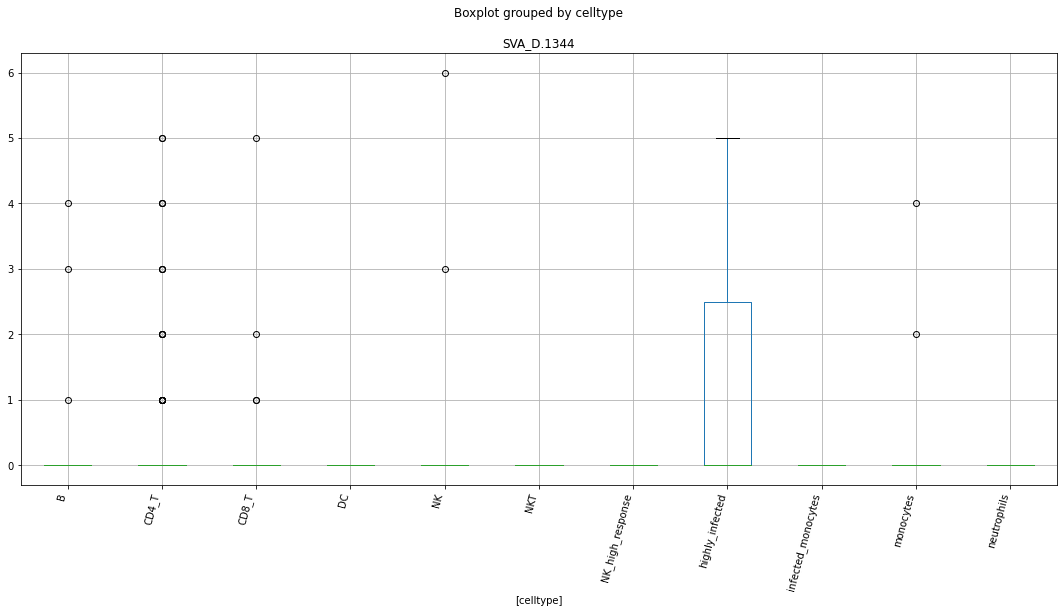

 p : 0.0001473431461316037  ( t : 3.8188731501619926 ) :  SVA_D.1305


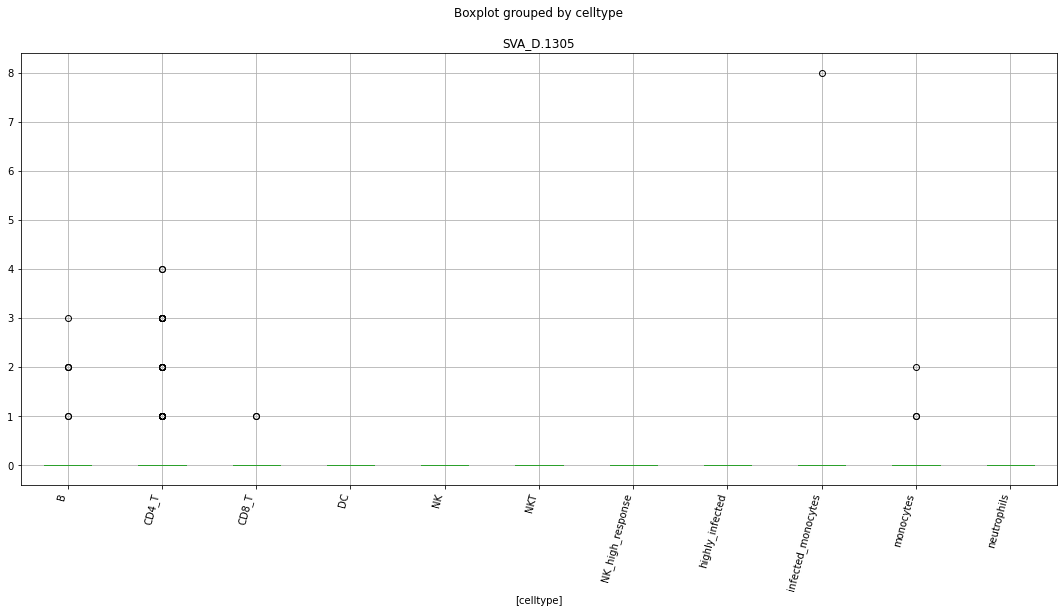

 p : 0.0001507005116120309  ( t : 3.9406000490021498 ) :  SVA_B.163


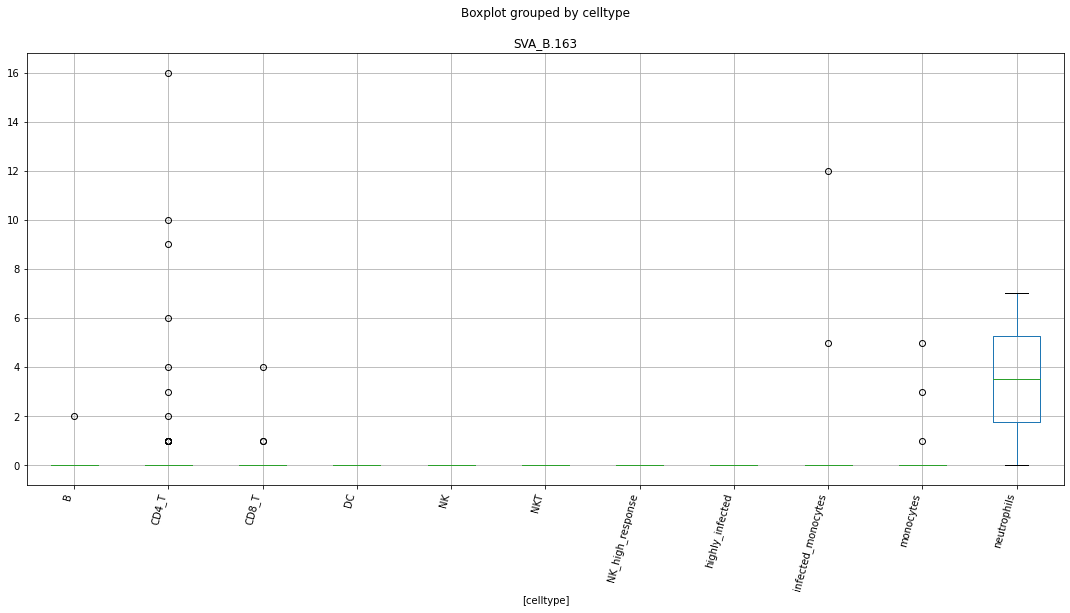

 p : 0.00015114711682351125  ( t : 3.81277259203362 ) :  SVA_B.162


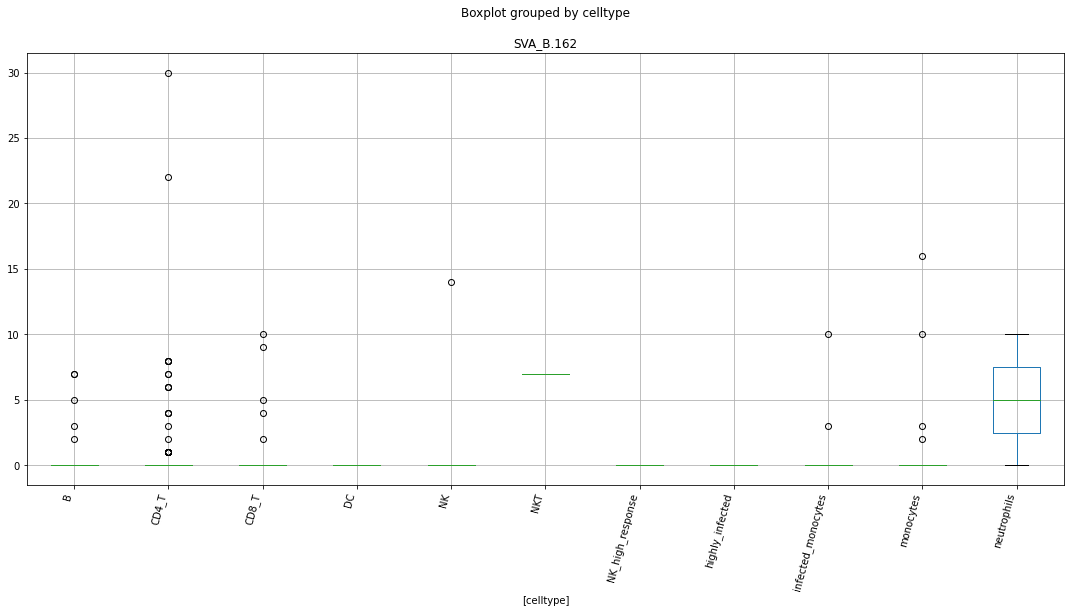

 p : 0.0001524682250168822  ( t : 3.8105711745808617 ) :  SVA_A.144


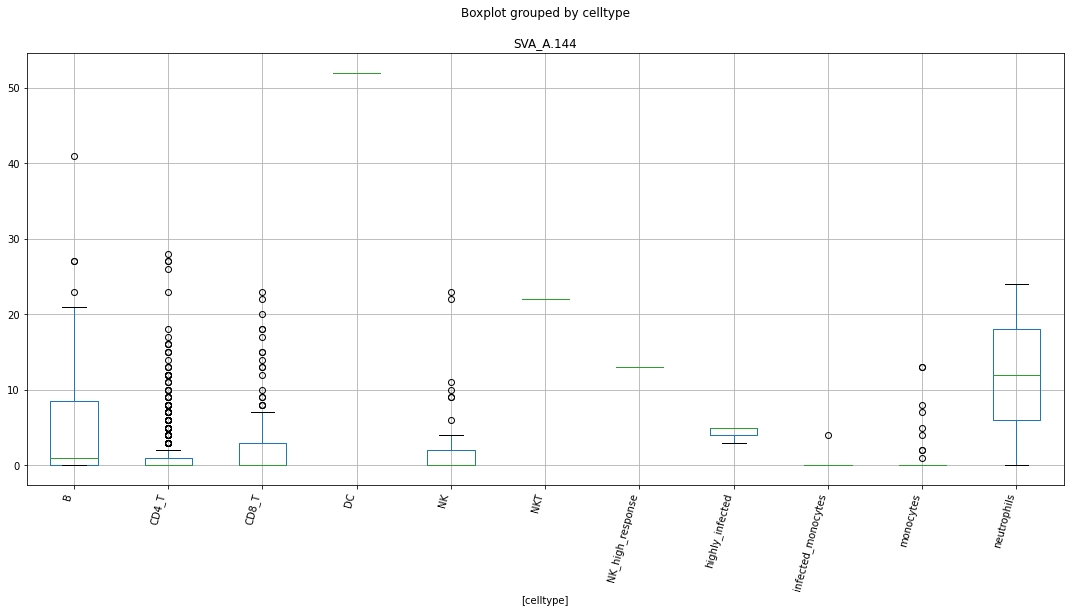

 p : 0.00016222332345927864  ( t : 3.918610092996983 ) :  SVA_B.230


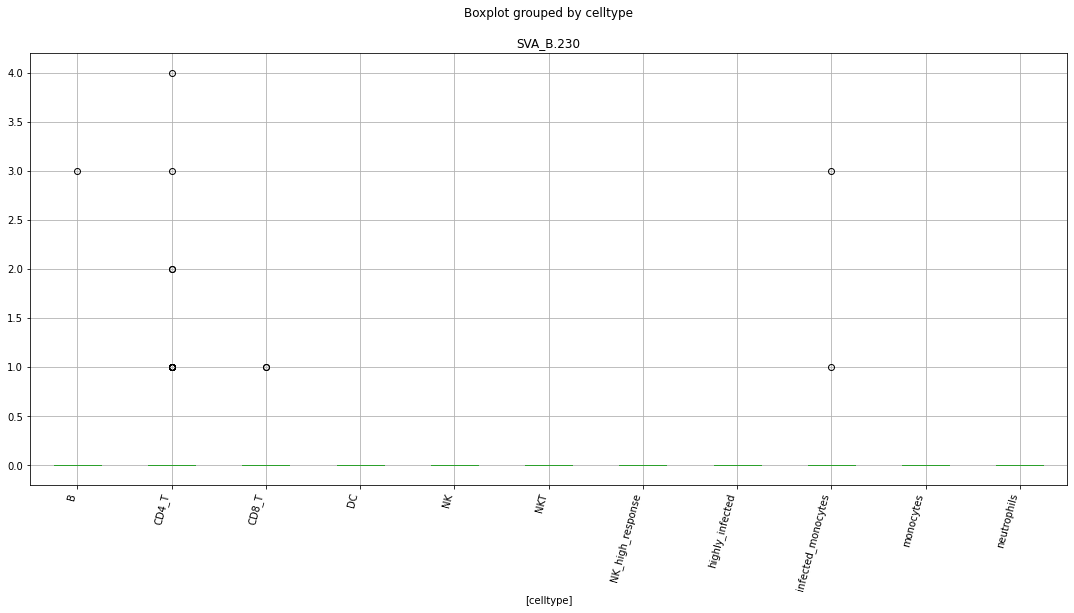

 p : 0.0001836109687746455  ( t : 3.7603988280654432 ) :  SVA_D.1197


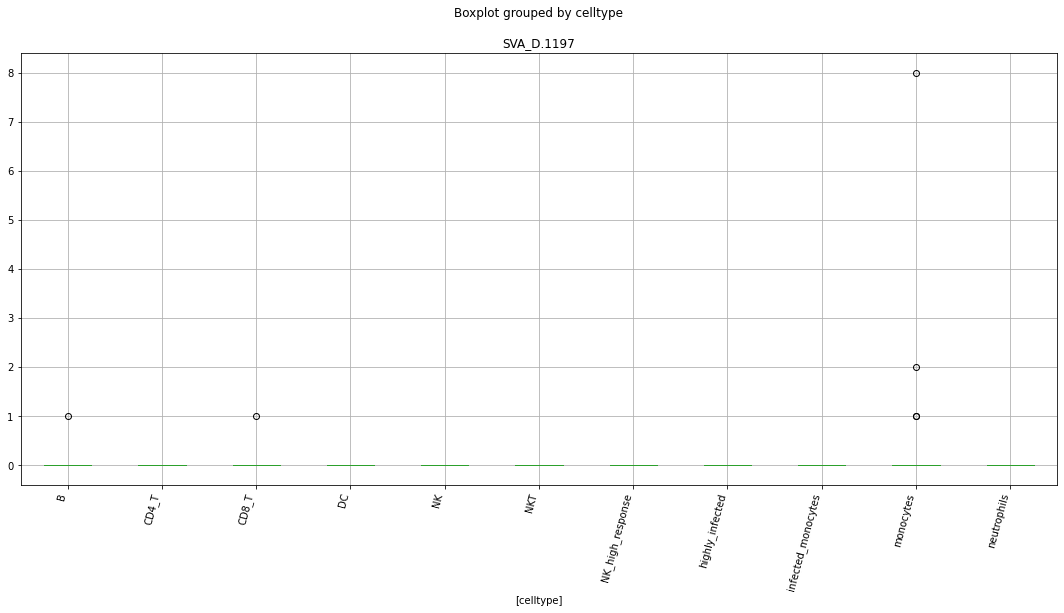

 p : 0.00018983323288514374  ( t : 3.753132596768483 ) :  SVA_C.221


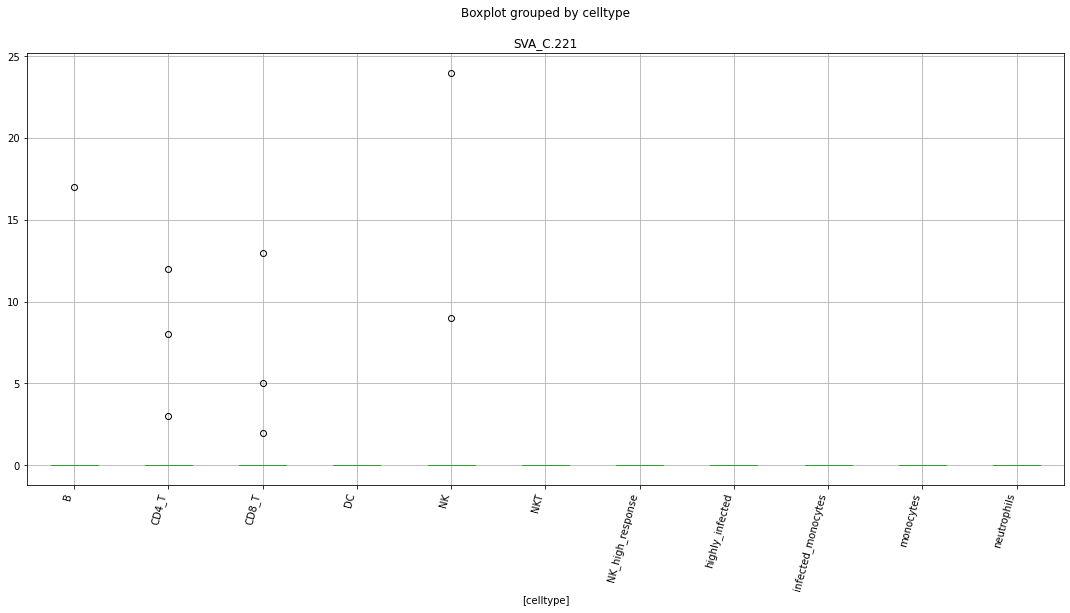

 p : 0.00021750443241161675  ( t : 3.805649451253843 ) :  SVA_F.370


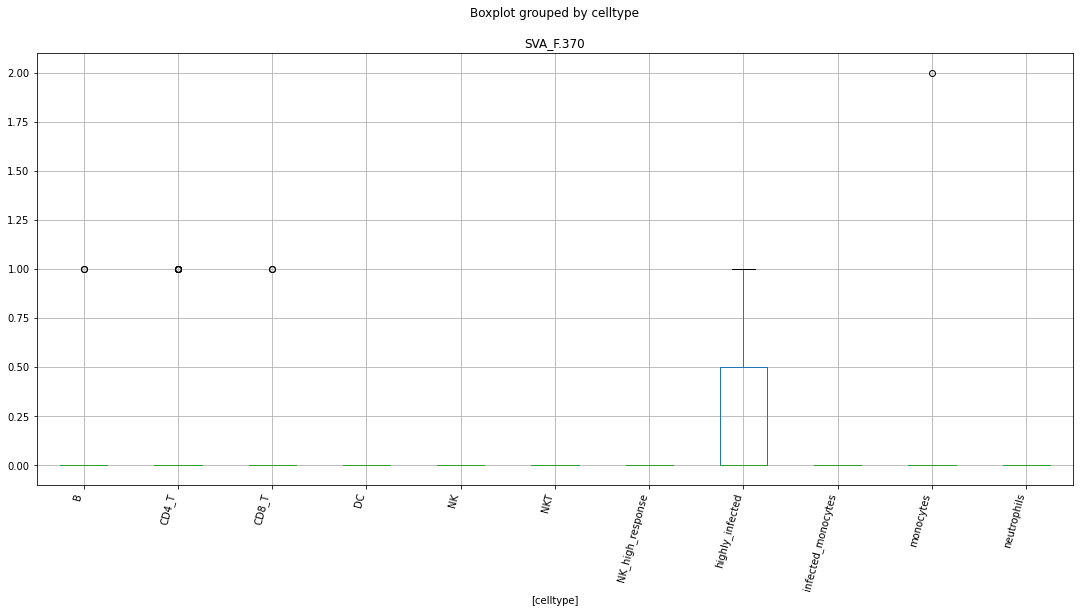

 p : 0.00021750443241161675  ( t : 3.805649451253843 ) :  SVA_F.705


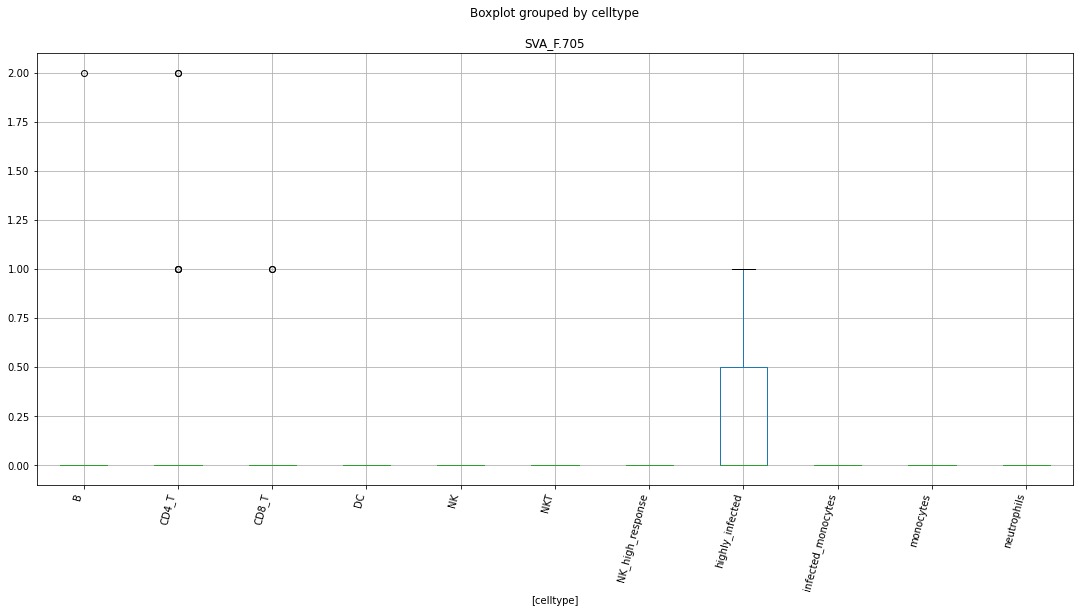

 p : 0.00021750443241161675  ( t : 3.805649451253843 ) :  SVA_D.1278


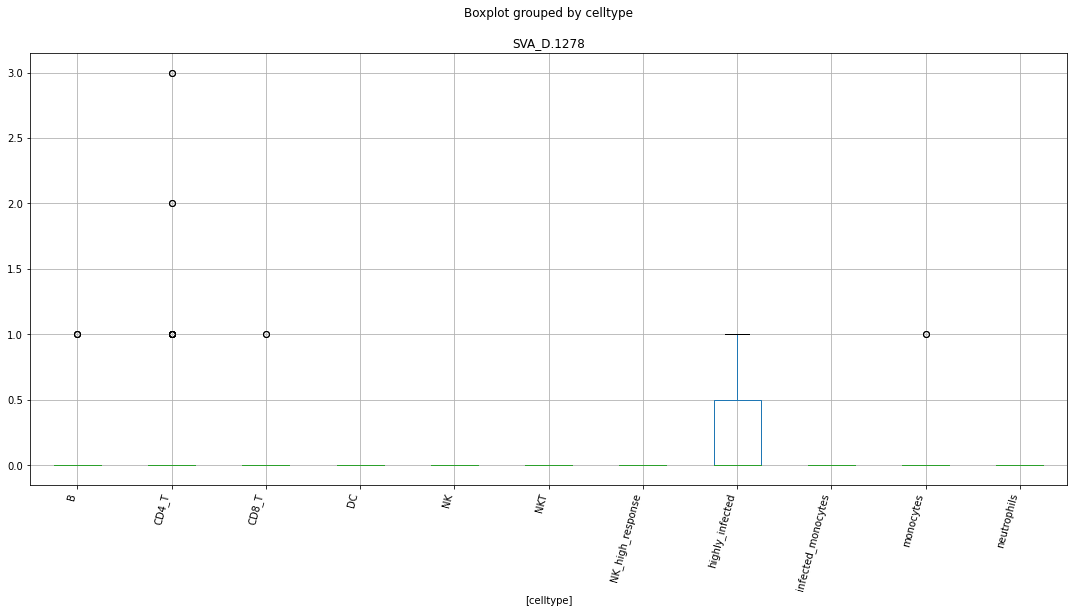

 p : 0.00022293203210426604  ( t : 3.845330982252522 ) :  SVA_B.8


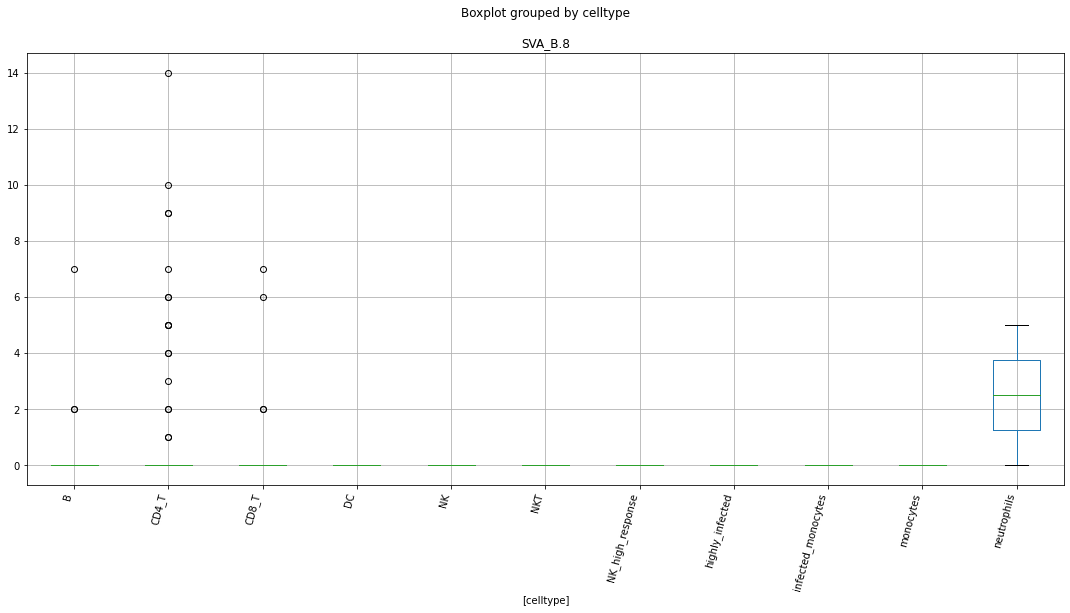

 p : 0.0002666770278341552  ( t : 5.088897846069064 ) :  SVA_A.144


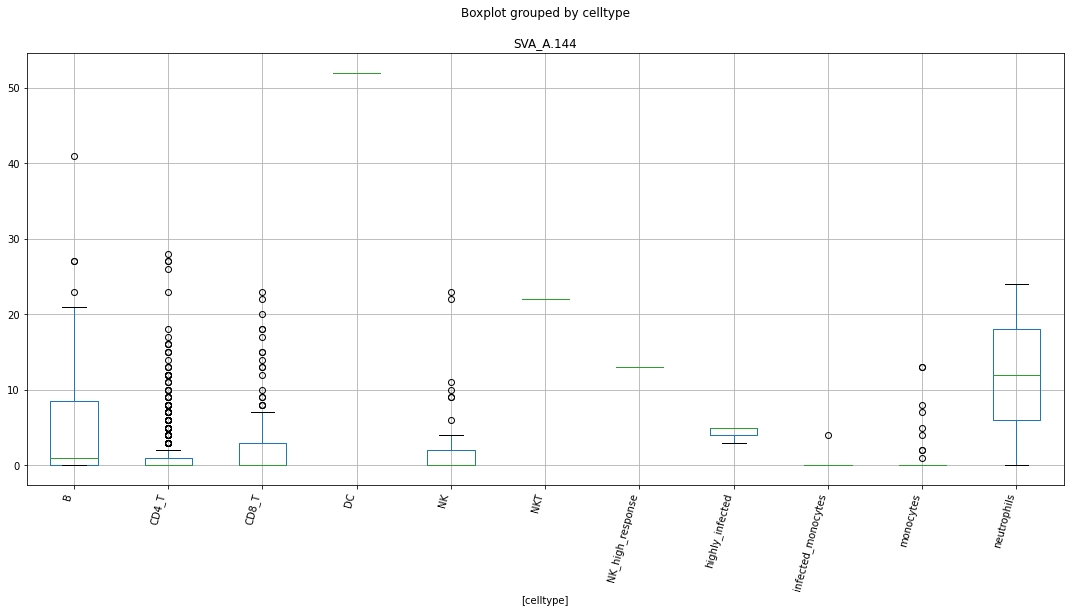

 p : 0.0002682330769018071  ( t : 3.661706673883836 ) :  SVA_D.722


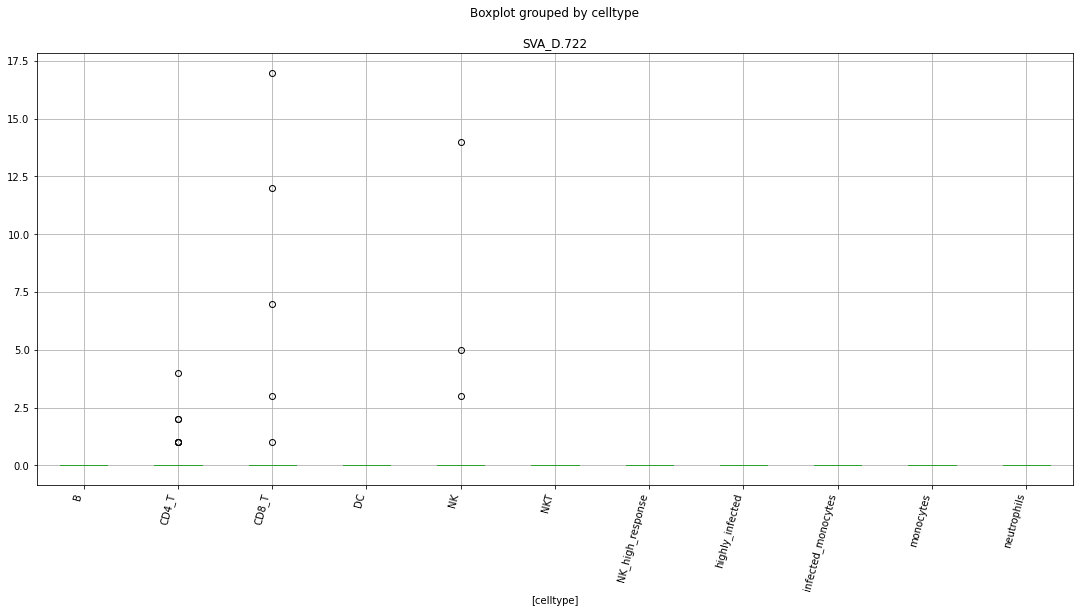

 p : 0.0002778503230586783  ( t : 3.653422395013133 ) :  SVA_B.366


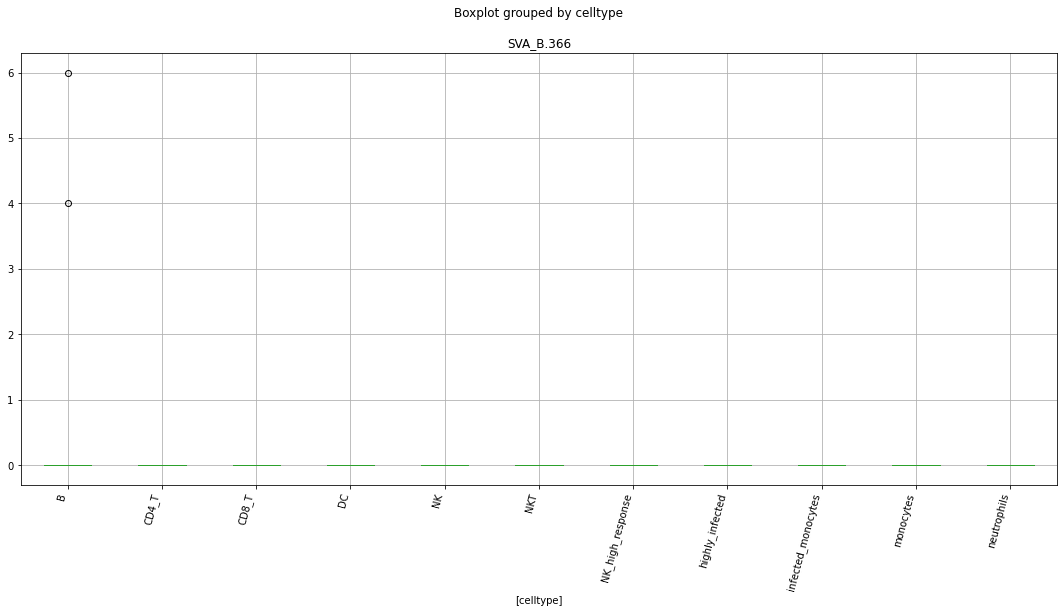

 p : 0.0002877171325356713  ( t : 3.6442612384410373 ) :  SVA_E.163


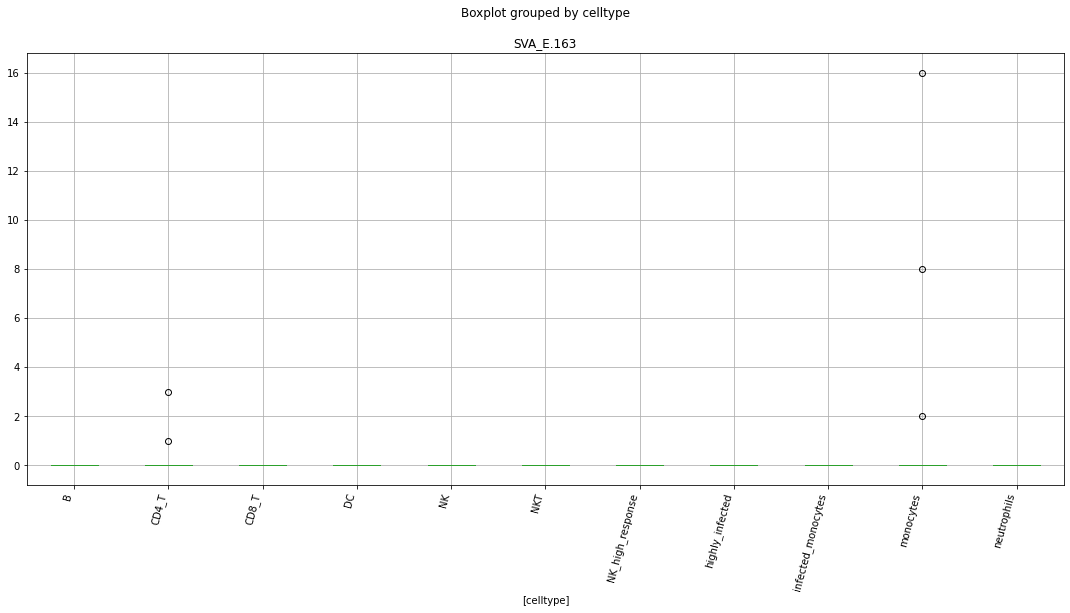

 p : 0.0003060777727717877  ( t : 3.6271501209313683 ) :  SVA_D.31


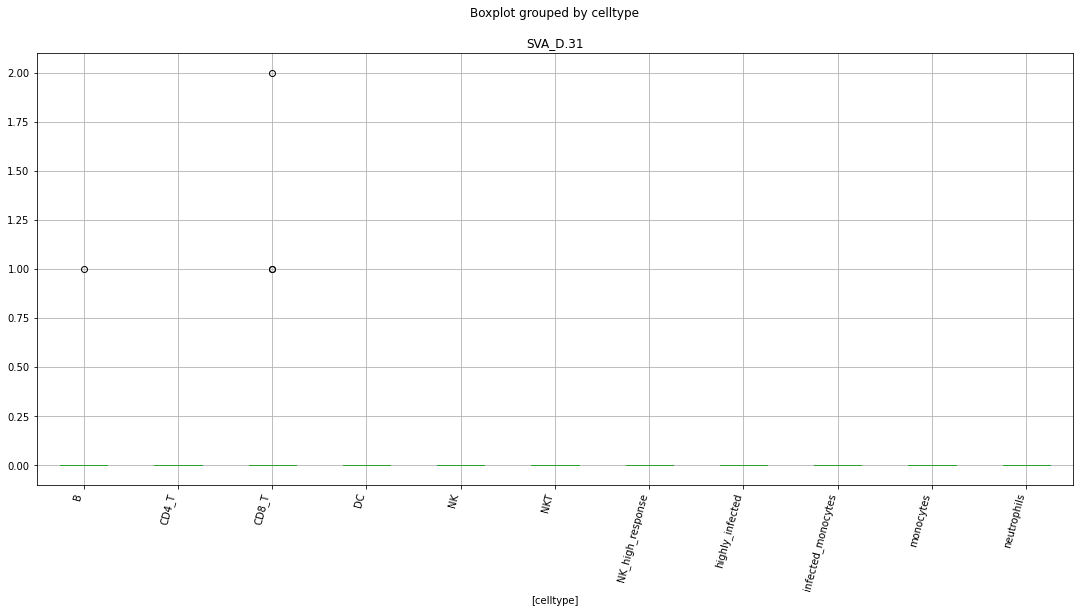

 p : 0.0003170647346875619  ( t : 3.8689552813149666 ) :  SVA_D.588


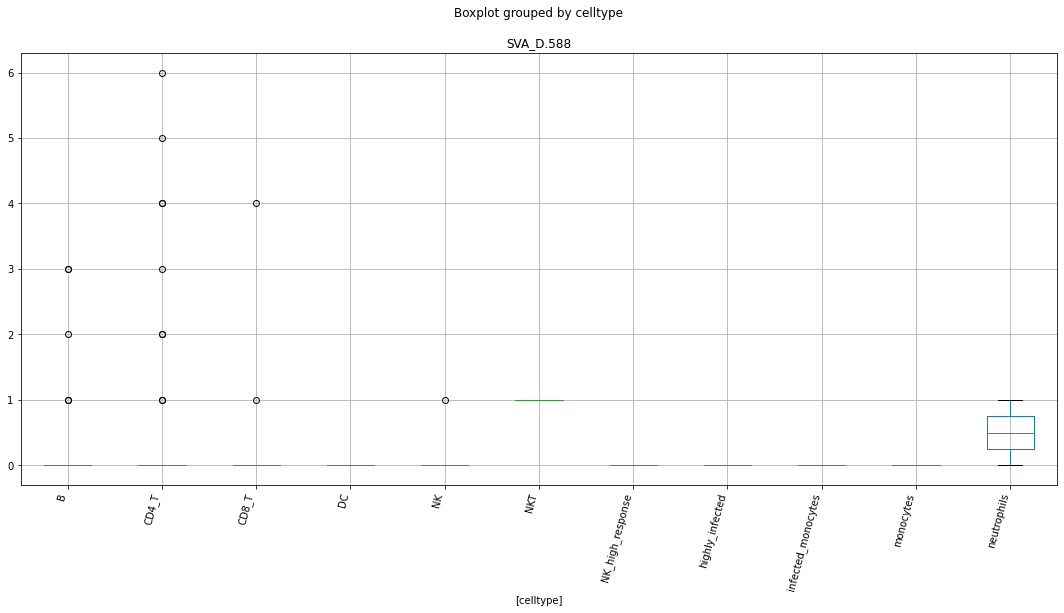

 p : 0.00031706473468756294  ( t : 3.868955281314966 ) :  SVA_F.108


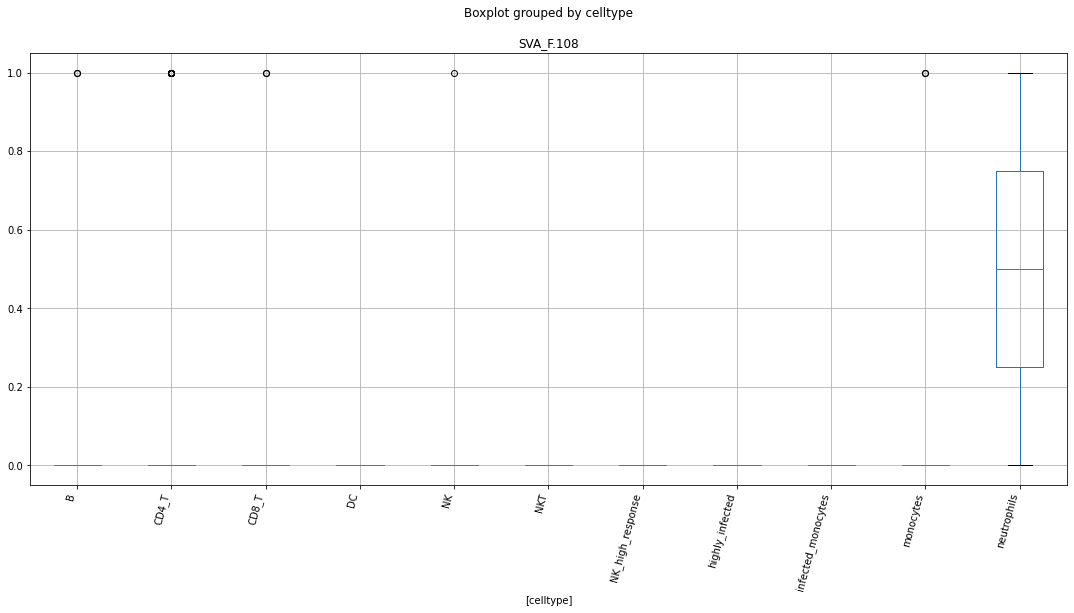

 p : 0.0003175905944586872  ( t : 3.741910990205535 ) :  SVA_E.196


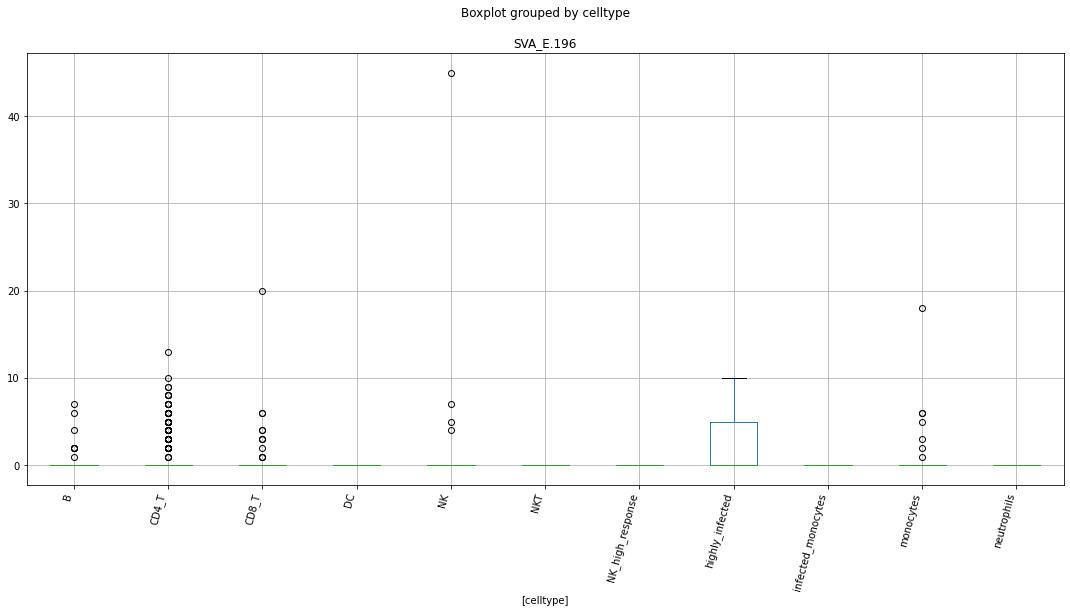

 p : 0.0003176294126288157  ( t : 3.743483837288781 ) :  SVA_F.942


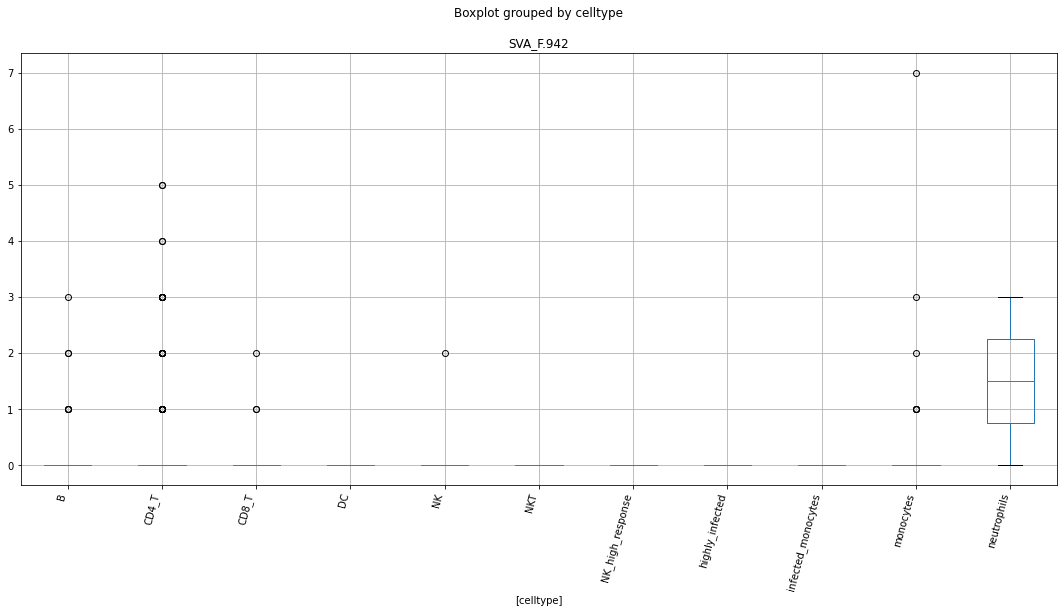

 p : 0.00032030057601477844  ( t : 3.6987702110234455 ) :  SVA_B.8


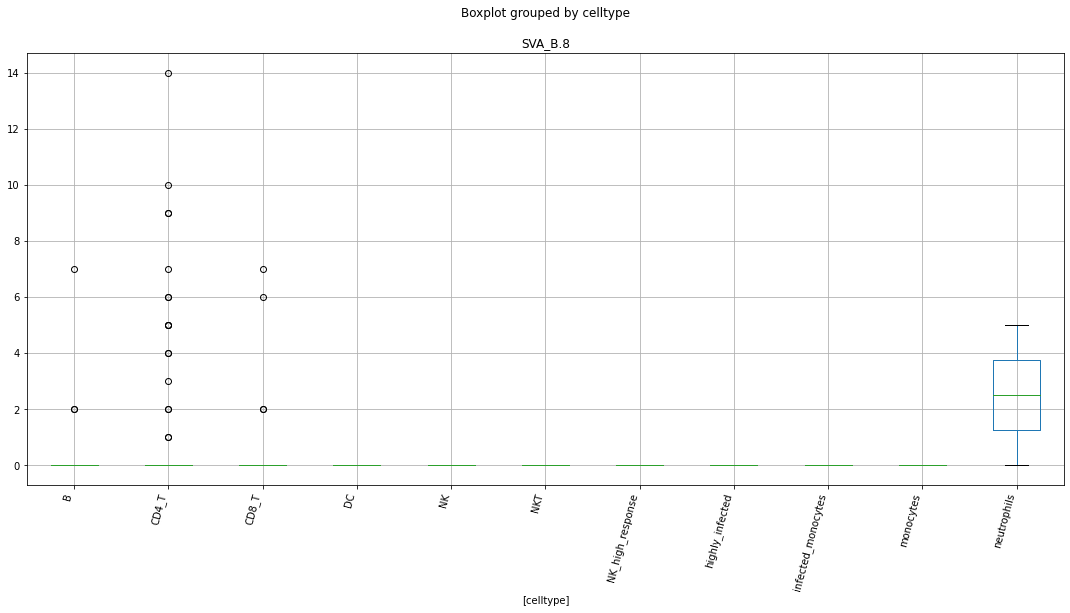

 p : 0.0003484149946905724  ( t : 3.5960567221559145 ) :  SVA_F.982


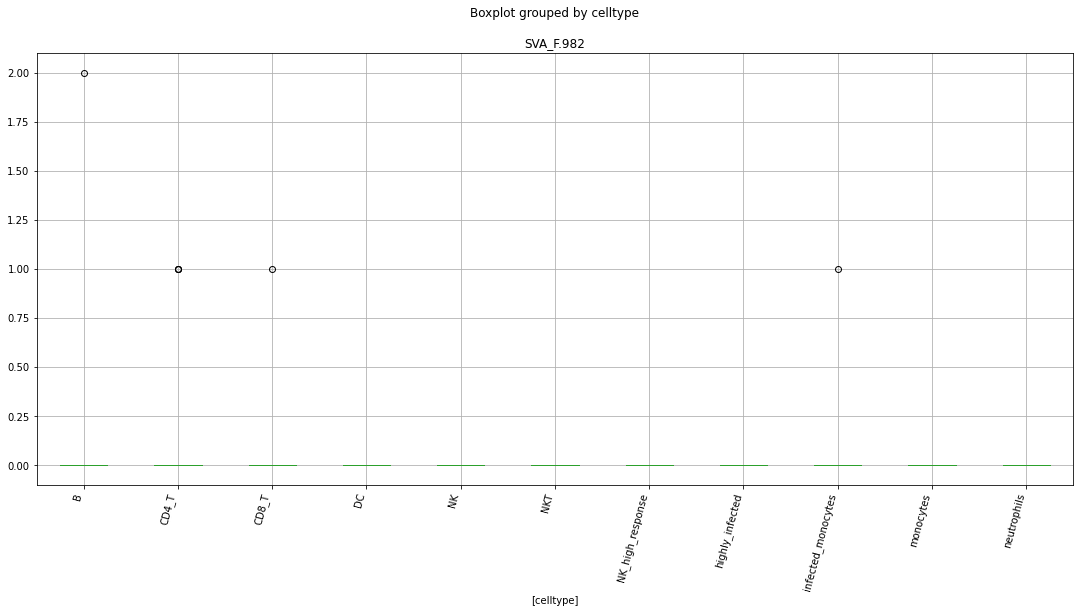

 p : 0.00035235026821134606  ( t : 5.084751798731267 ) :  SVA_E.230


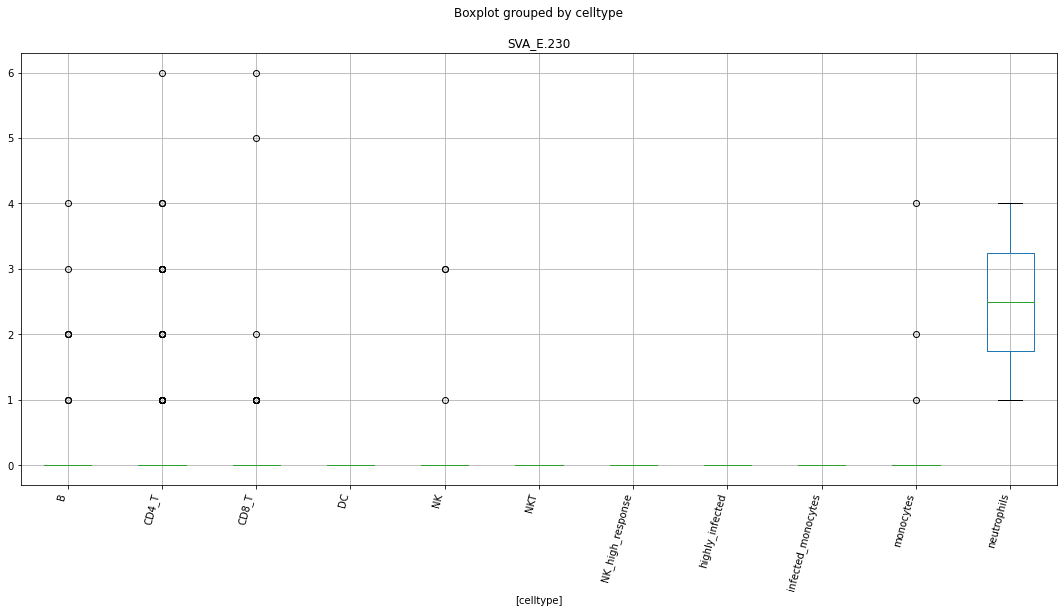

 p : 0.00036170499569499446  ( t : 3.6234746567841314 ) :  SVA_A.144


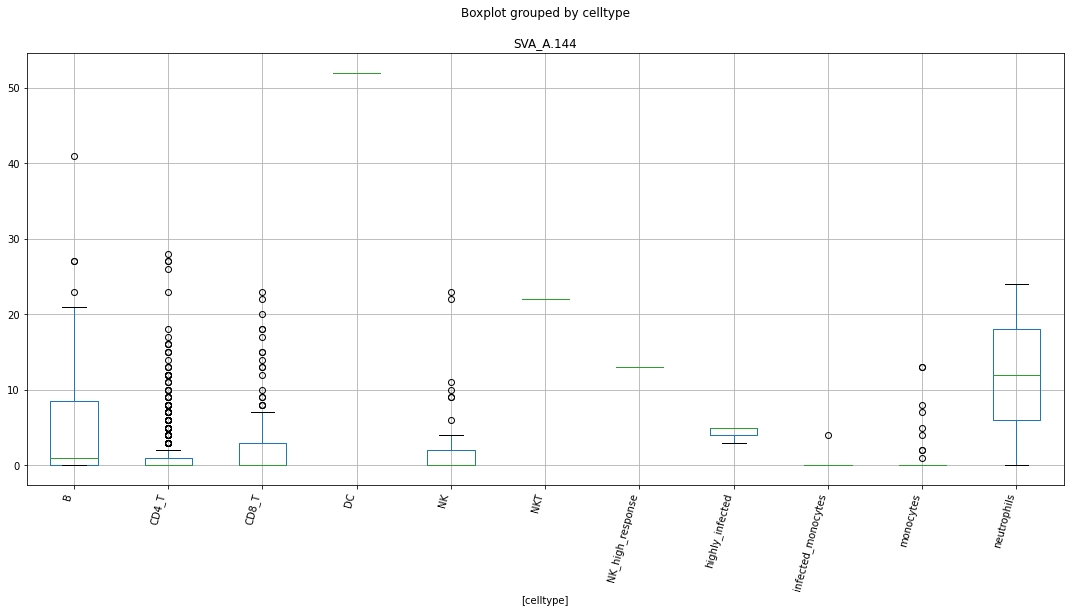

 p : 0.00040520720958001034  ( t : 3.6708859282975586 ) :  SVA_A.114


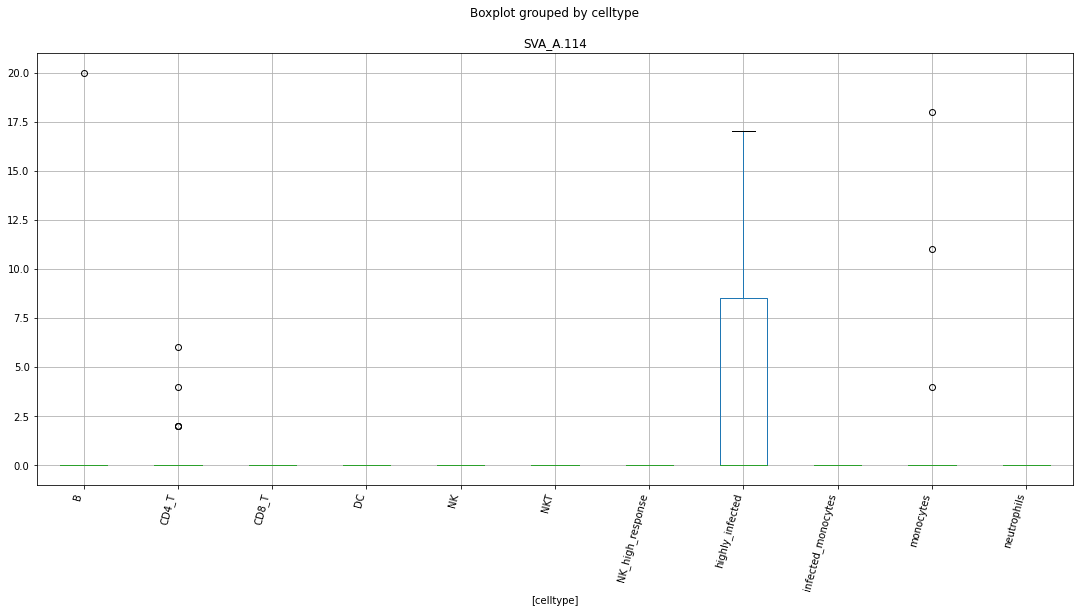

 p : 0.0004095059729053446  ( t : 3.5518010772671937 ) :  SVA_D.566


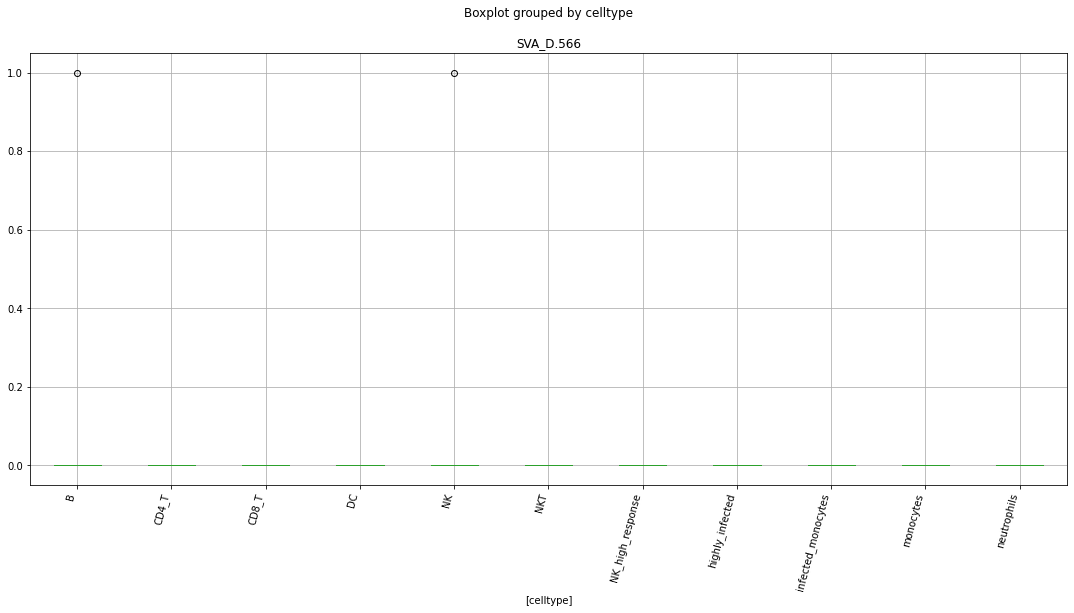

 p : 0.0004095059729053464  ( t : 3.5518010772671933 ) :  SVA_C.281


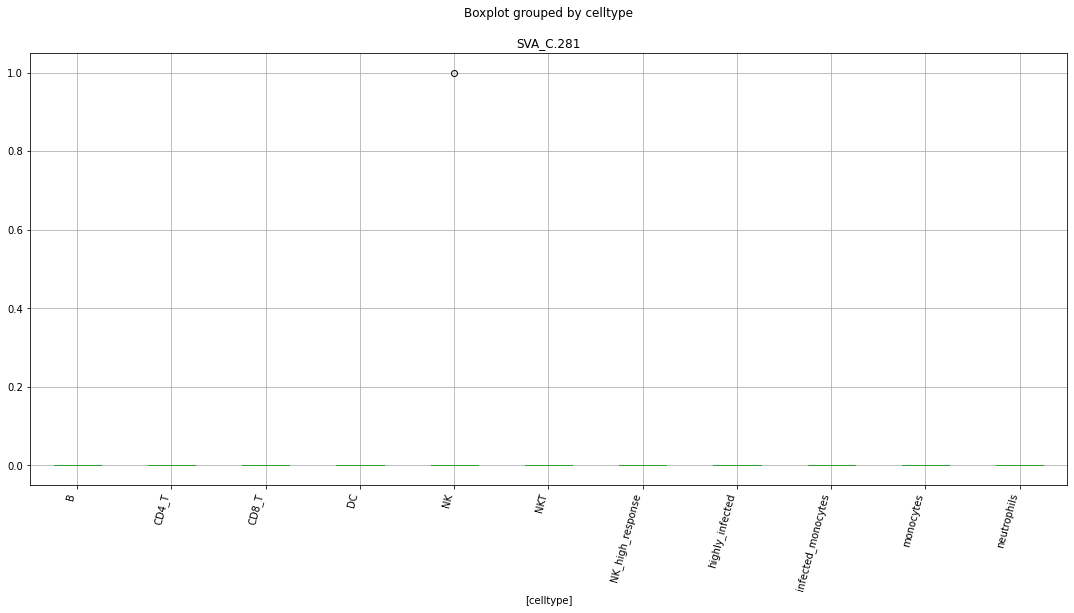

 p : 0.0004095059729053464  ( t : 3.5518010772671933 ) :  SVA_C.42


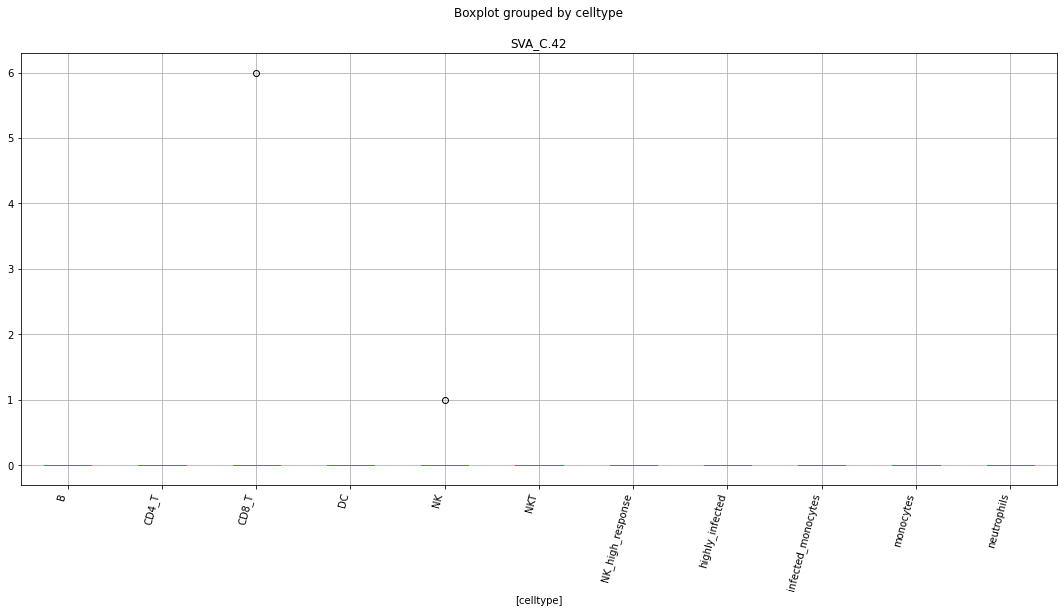

 p : 0.0004832934373035153  ( t : 3.5061117018826593 ) :  SVA_A.114


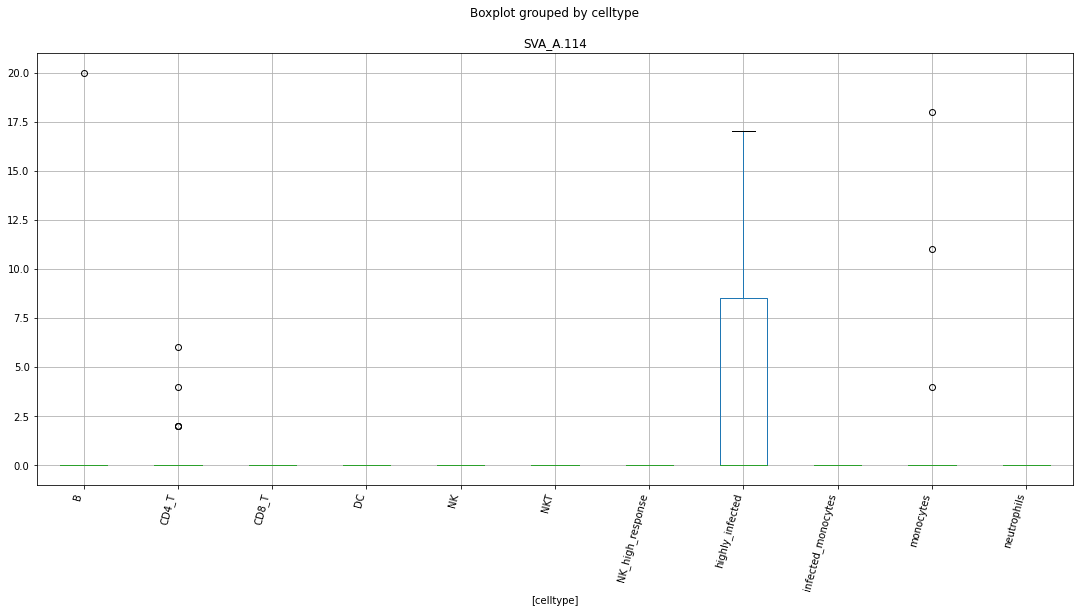

 p : 0.0004880067274600326  ( t : 3.6042693131276122 ) :  SVA_B.150


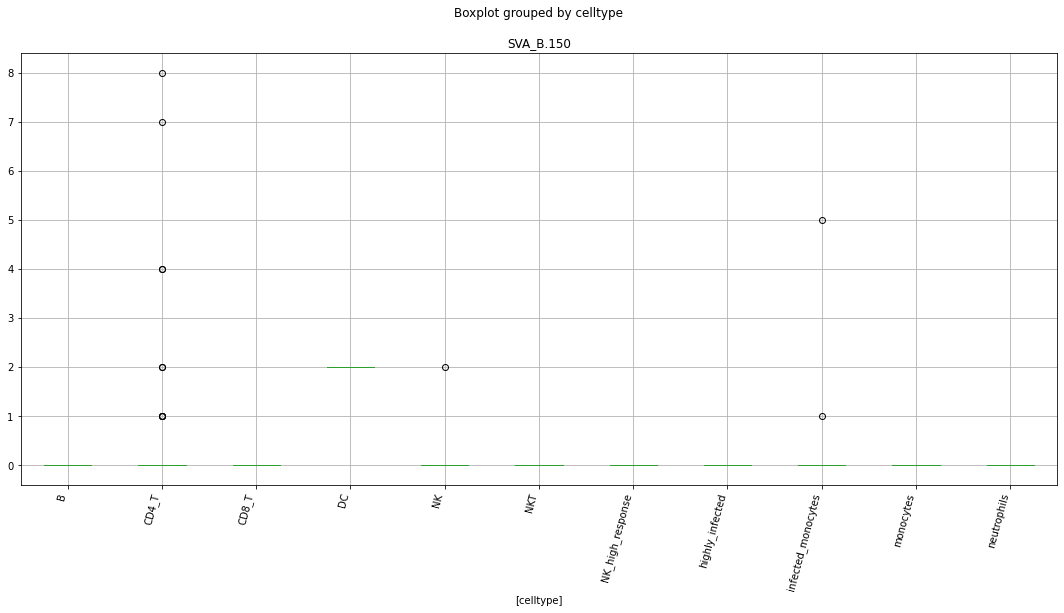

Clustermapping
['SVA_A.113' 'SVA_A.114' 'SVA_A.144' 'SVA_A.164' 'SVA_A.169' 'SVA_A.217'
 'SVA_B.100' 'SVA_B.150' 'SVA_B.162' 'SVA_B.163' 'SVA_B.230' 'SVA_B.242'
 'SVA_B.257' 'SVA_B.264' 'SVA_B.331' 'SVA_B.357' 'SVA_B.366' 'SVA_B.397'
 'SVA_B.57' 'SVA_B.8' 'SVA_C.105' 'SVA_C.108' 'SVA_C.135' 'SVA_C.147'
 'SVA_C.148' 'SVA_C.200' 'SVA_C.221' 'SVA_C.259' 'SVA_C.264' 'SVA_C.277'
 'SVA_C.281' 'SVA_C.42' 'SVA_C.96' 'SVA_D.1' 'SVA_D.109' 'SVA_D.1123'
 'SVA_D.1197' 'SVA_D.1231' 'SVA_D.1278' 'SVA_D.1285' 'SVA_D.1305'
 'SVA_D.1344' 'SVA_D.139' 'SVA_D.1394' 'SVA_D.166' 'SVA_D.188' 'SVA_D.210'
 'SVA_D.269' 'SVA_D.31' 'SVA_D.33' 'SVA_D.335' 'SVA_D.366' 'SVA_D.416'
 'SVA_D.43' 'SVA_D.513' 'SVA_D.55' 'SVA_D.561' 'SVA_D.566' 'SVA_D.588'
 'SVA_D.610' 'SVA_D.627' 'SVA_D.634' 'SVA_D.722' 'SVA_D.759' 'SVA_D.851'
 'SVA_D.918' 'SVA_D.986' 'SVA_E.108' 'SVA_E.109' 'SVA_E.143' 'SVA_E.163'
 'SVA_E.179' 'SVA_E.196' 'SVA_E.230' 'SVA_E.59' 'SVA_E.90' 'SVA_F.1022'
 'SVA_F.108' 'SVA_F.139' 'SVA_F.191' 'SVA_F.241' 'SV

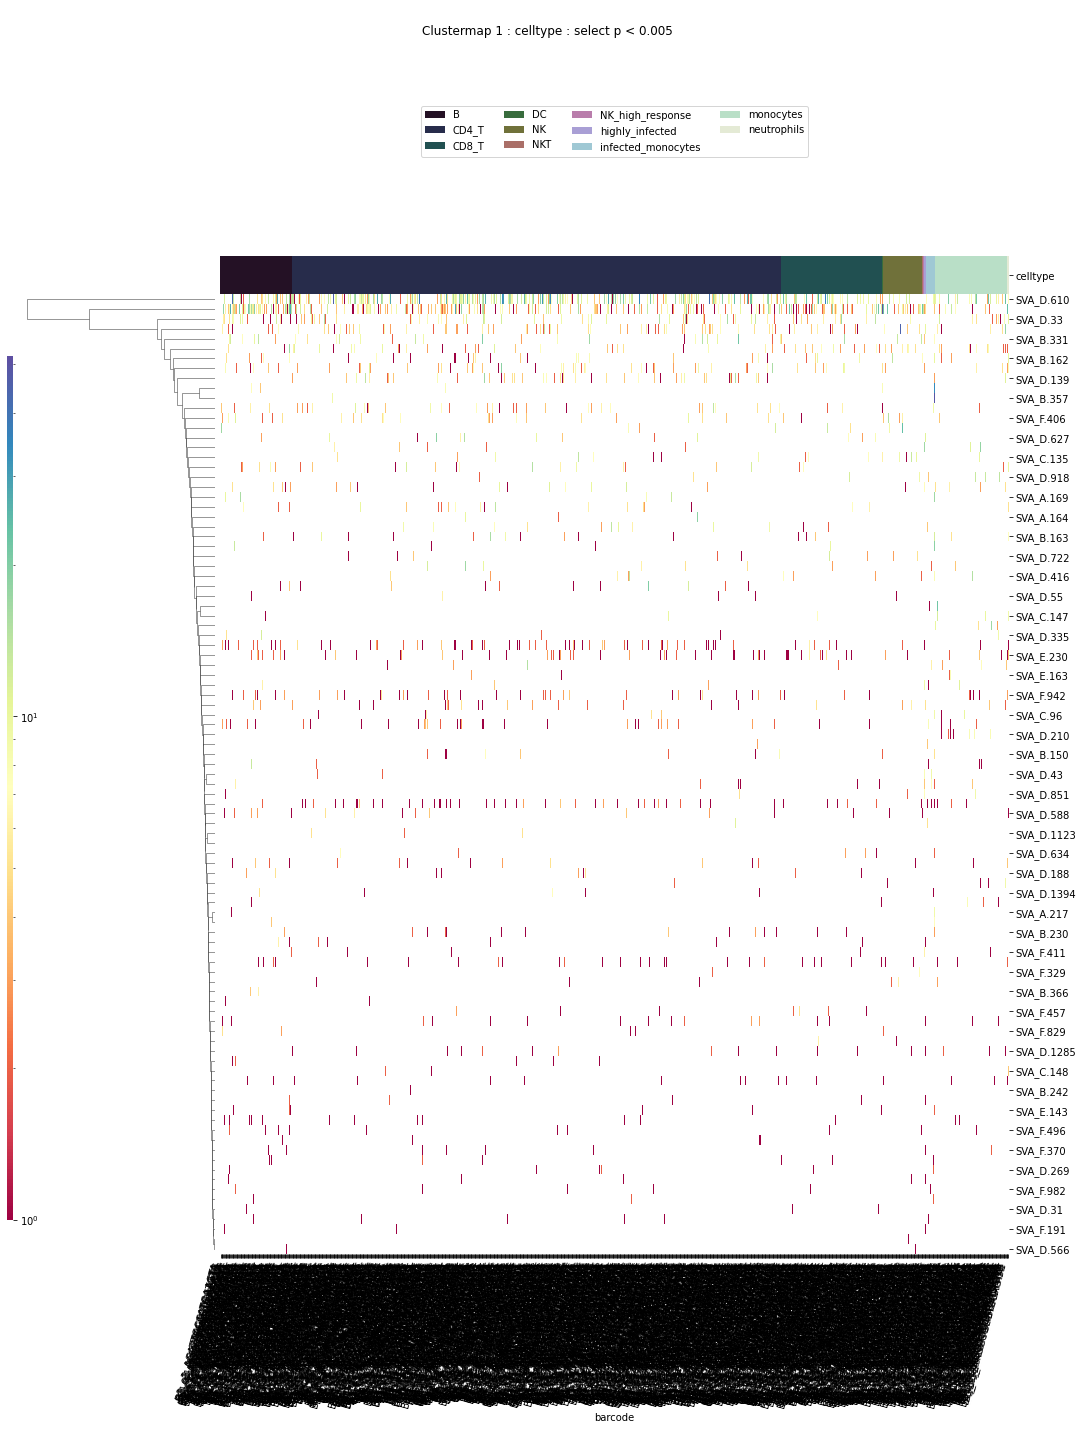

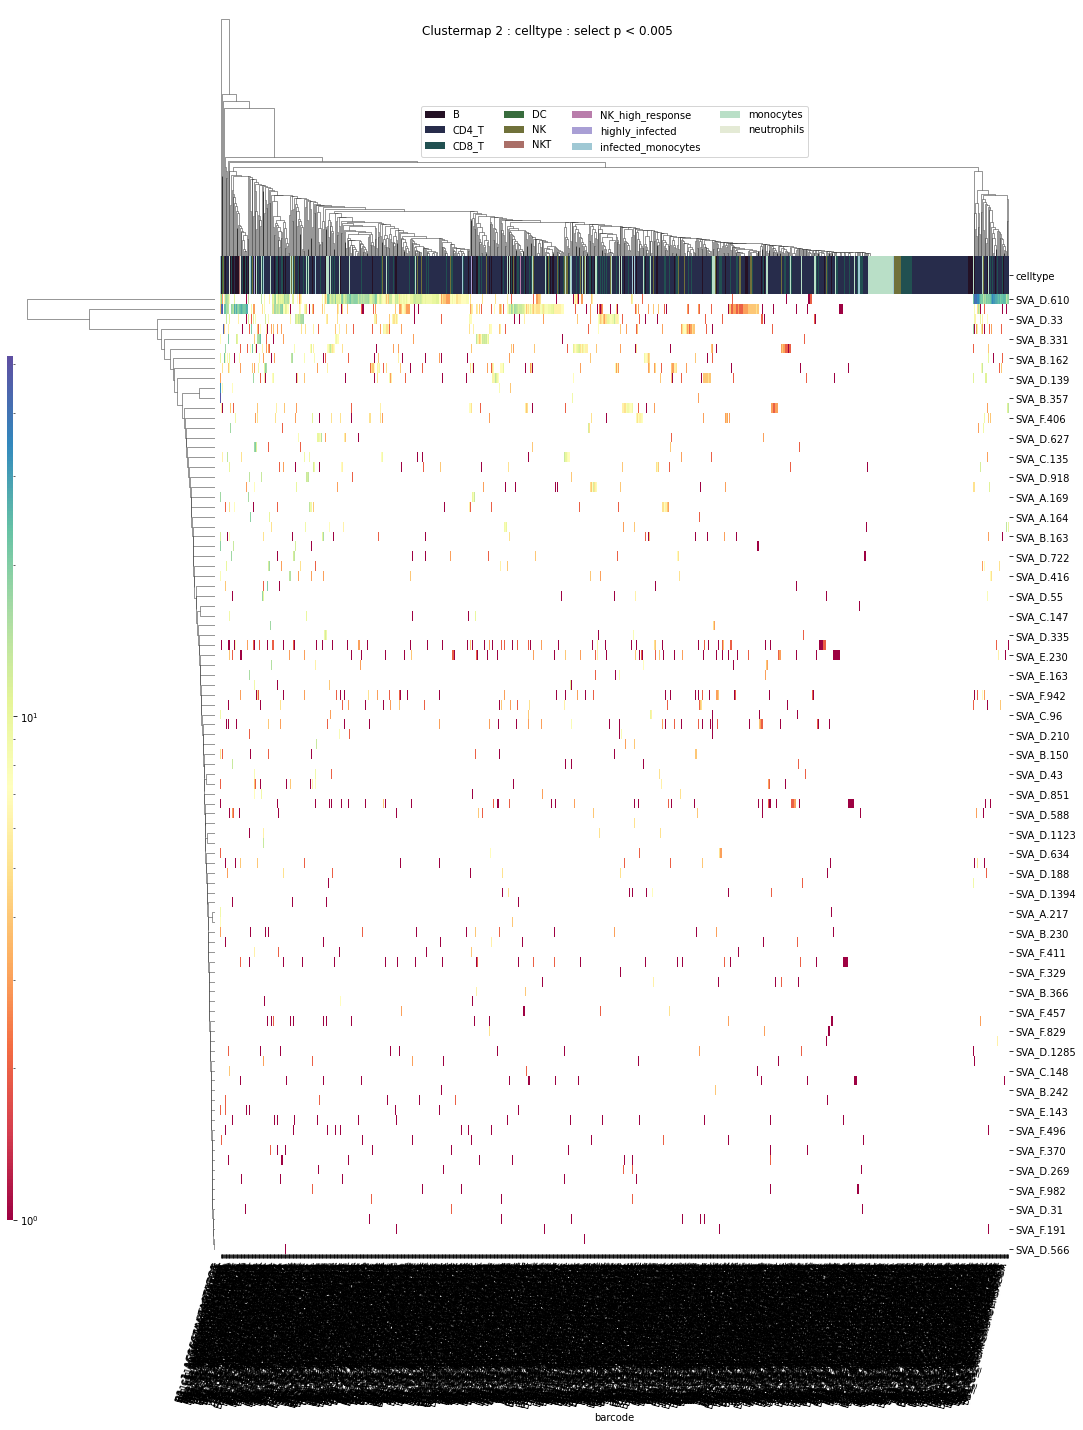

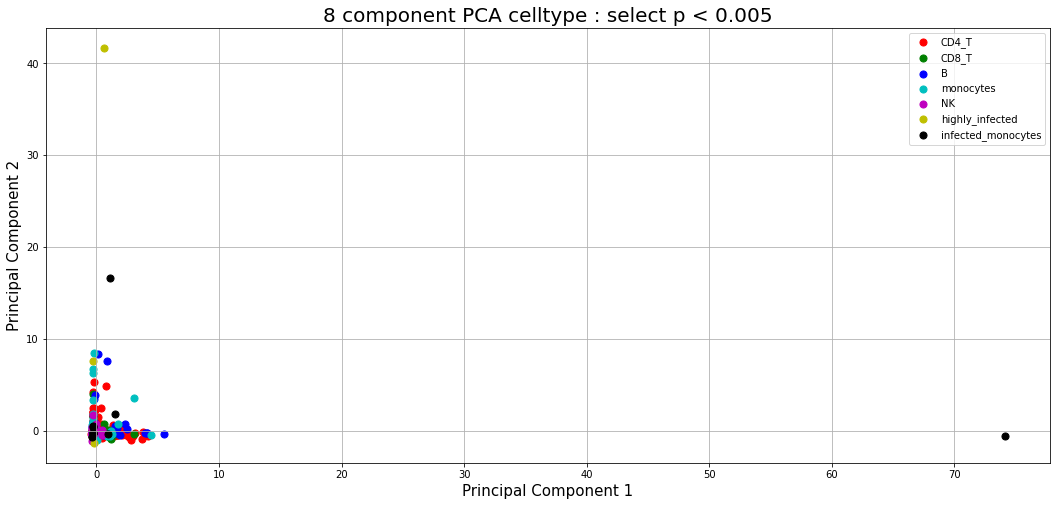

In [34]:
#ttests_boxplots_and_heatmaps(
#    feature_counts.reset_index(), data_columns[0:100],
#    'SOC_infection_status',box_p=0.005,heat_p=0.05)
#for column in ['SOC_infection_status','SOC_genetic_ancestry','celltype']:
#    print(column)
#    ttests_boxplots_and_heatmaps(feature_counts.reset_index(),data_columns,column,box_p=0.005,heat_p=0.05)    
#ttests_boxplots_and_heatmaps(
#    feature_counts.reset_index(),data_columns[0:10],'celltype',box_p=0.0005,heat_p=0.005)    

#ttests_boxplots_and_heatmaps(
#    feature_counts.reset_index()[0:5000],["ISG15","NOC2L","HES4"],'celltype',box_p=0.0005,heat_p=0.005)    

ttests_boxplots_and_heatmaps(
    feature_counts.reset_index(),data_columns,'celltype',box_p=0.0005,heat_p=0.005)    
